In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, ShuffleSplit, validation_curve
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from scipy import stats

In [2]:
df = pd.read_csv("data.csv")
df

Вектор Мощи  Скорость перехода через портал  Приток Силы Потока  \
0            1.138                         1.54332             289.964   
1            2.088                         3.08664            6960.180   
2            3.144                         4.62996            8379.229   
3            4.161                         6.17328           14724.395   
4            5.140                         7.71660           21636.432   
...            ...                             ...                 ...   
11929        5.140                         7.71660           21624.934   
11930        6.175                         9.25992           29763.213   
11931        7.148                        10.80324           39003.867   
11932        8.206                        12.34656           50992.579   
11933        9.300                        13.88988           72775.130   

       Ритм магического ядра  Поток Энергий  Сила Левого Потока  \
0                 141.318158       6677.380               7.584   
1                 144.111767       6828.469              28.204   
2                 145.220853       7111.811              60.358   
3                 162.050156       7792.630             113.774   
4                 201.513586       8494.777             175.306   
...                      ...            ...                 ...   
11929             201.516623       8470.013             175.239   
11930             241.561772       8800.352             245.954   
11931             280.444950       9120.889             332.389   
11932             323.315332       9300.274             438.024   
11933             372.844216       9742.950             644.880   

       Сила Правого Потока  Пламя Стихий  Температура вдоха Истока  \
0                    7.584       464.006                       736   
1                   28.204       635.401                       736   
2                   60.358       606.002                       736   
3                  113.774       661.471                       736   
4                  175.306       731.494                       736   
...                    ...           ...                       ...   
11929              175.239       681.658                       736   
11930              245.954       747.405                       736   
11931              332.389       796.457                       736   
11932              438.024       892.945                       736   
11933              644.880      1038.411                       736   

      Температура выдоха Истока  Приток давления Выдоха Истока  \
0         Исток не вернул выдох                          1.096   
1                       581.658                          1.331   
2         Исток не вернул выдох                          1.389   
3         Исток не вернул выдох                          1.658   
4                       645.642                          2.078   
...                         ...                            ...   
11929                    628.95                          2.087   
11930     Исток не вернул выдох                          2.512   
11931                   680.393                          2.982   
11932     Исток не вернул выдох                          3.594   
11933     Исток не вернул выдох                          4.531   

       Давление вдоха Истока  Давление выдоха Истока            Древний Ветер  \
0                   1.394603                   5.947  Древний Ветер развеялся   
1                   1.394603                   7.282                    1.019   
2                   1.394603                   7.574  Древний Ветер развеялся   
3                   1.394603                   9.007  Древний Ветер развеялся   
4                   1.394603                  11.197                    1.026   
...                      ...                     ...                      ...   
11929               1.394603                  10.990                    1.027   
11930               1.394603   

In [3]:
df.info()
#пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Вектор Мощи                     11934 non-null  float64
 1   Скорость перехода через портал  11934 non-null  float64
 2   Приток Силы Потока              11934 non-null  float64
 3   Ритм магического ядра           11934 non-null  float64
 4   Поток Энергий                   11934 non-null  float64
 5   Сила Левого Потока              11934 non-null  float64
 6   Сила Правого Потока             11934 non-null  float64
 7   Пламя Стихий                    11934 non-null  float64
 8   Температура вдоха Истока        11934 non-null  int64  
 9   Температура выдоха Истока       11934 non-null  object 
 10  Приток давления Выдоха Истока   11934 non-null  float64
 11  Давление вдоха Истока           11934 non-null  float64
 12  Давление выдоха Истока          

Отобразили информацию о колонках. Увидели типы данных и пропуски

In [4]:
df.describe()

Вектор Мощи  Скорость перехода через портал  Приток Силы Потока  \
count  11934.000000                    11934.000000        11934.000000   
mean       5.166667                        7.716600        27247.498685   
std        2.626388                        3.985002        22148.613155   
min        1.138000                        1.543320          253.547000   
25%        3.144000                        4.629960         8375.883750   
50%        5.140000                        7.716600        21630.659000   
75%        7.148000                       10.803240        39001.426750   
max        9.300000                       13.889880        72784.872000   

       Ритм магического ядра  Поток Энергий  Сила Левого Потока  \
count           11934.000000   11934.000000        11934.000000   
mean              223.711688    8200.947312          227.335768   
std                81.061874    1091.315507          200.495889   
min               136.939406    6589.002000            5.304000   
25%               145.220958    7058.324000           60.317000   
50%               201.514947    8482.081500          175.268000   
75%               280.447777    9132.606000          332.364750   
max               372.879926    9797.103000          645.249000   

       Сила Правого Потока  Пламя Стихий  Температура вдоха Истока  \
count         11934.000000  11934.000000                   11934.0   
mean            227.335768    735.495446                     736.0   
std             200.495889    173.680552                       0.0   
min               5.304000    442.364000                     736.0   
25%              60.317000    589.872750                     736.0   
50%             175.268000    706.038000                     736.0   
75%             332.364750    834.066250                     736.0   
max             645.249000   1115.797000                     736.0   

       Приток давления Выдоха Истока  Давление вдоха Истока  \
count                   11934.000000           1.193400e+04   
mean                        2.352963           1.394603e+00   
std                         1.084770           2.806761e-13   
min                         1.093000           1.394603e+00   
25%                         1.389000           1.394603e+00   
50%                         2.083000           1.394603e+00   
75%                         2.981000           1.394603e+00   
max                         4.560000           1.394603e+00   

       Давление выдоха Истока  Печать Чародея  Эмульсия Истока  \
count            11934.000000    11934.000000     11934.000000   
mean                12.297123       33.641261         0.662440   
std                  5.337448       25.841363         0.507132   
min                  5.828000        0.000000         0.068000   
25%                  7.447250       13.677500         0.246000   
50%                 11.092000       25.276500         0.496000   
75%                 15.658000       44.552500         0.882000   
max                 23.140000       92.556000         1.832000   

       Дыхание Истока  Гармония Бессмертия  
count     11934.00000           11934.0000  
mean          0.97500               0.9875  
std           0.01472               0.0075  
min           0.95000               0.9750  
25%           0.96200               0.9810  
50%           0.97500               0.9875  
75%           0.98800               0.9940  
max           1.00000               1.0000

Отабрази информацию о колонках

In [5]:
df["Температура выдоха Истока"].value_counts()

Температура выдоха Истока
Исток не вернул выдох    9547
635.572                     2
606.098                     2
565.712                     2
600.093                     2
                         ... 
691.172                     1
564.919                     1
637.581                     1
779.856                     1
680.393                     1
Name: count, Length: 2369, dtype: int64

In [6]:
df["Древний Ветер"].value_counts()


Древний Ветер
Древний Ветер развеялся    9547
1.019                       371
1.02                        348
1.026                       209
1.03                        192
1.023                       170
1.036                       145
1.042                       128
1.041                       124
1.035                       122
1.022                       109
1.031                        96
1.051                        81
1.05                         72
1.027                        72
1.049                        65
1.021                        44
1.052                        35
1.043                         3
1.04                          1
Name: count, dtype: int64

Данные колонки неиформативные, следовательно удалим их

In [7]:

df.drop(columns=["Температура выдоха Истока", "Древний Ветер"], inplace=True)

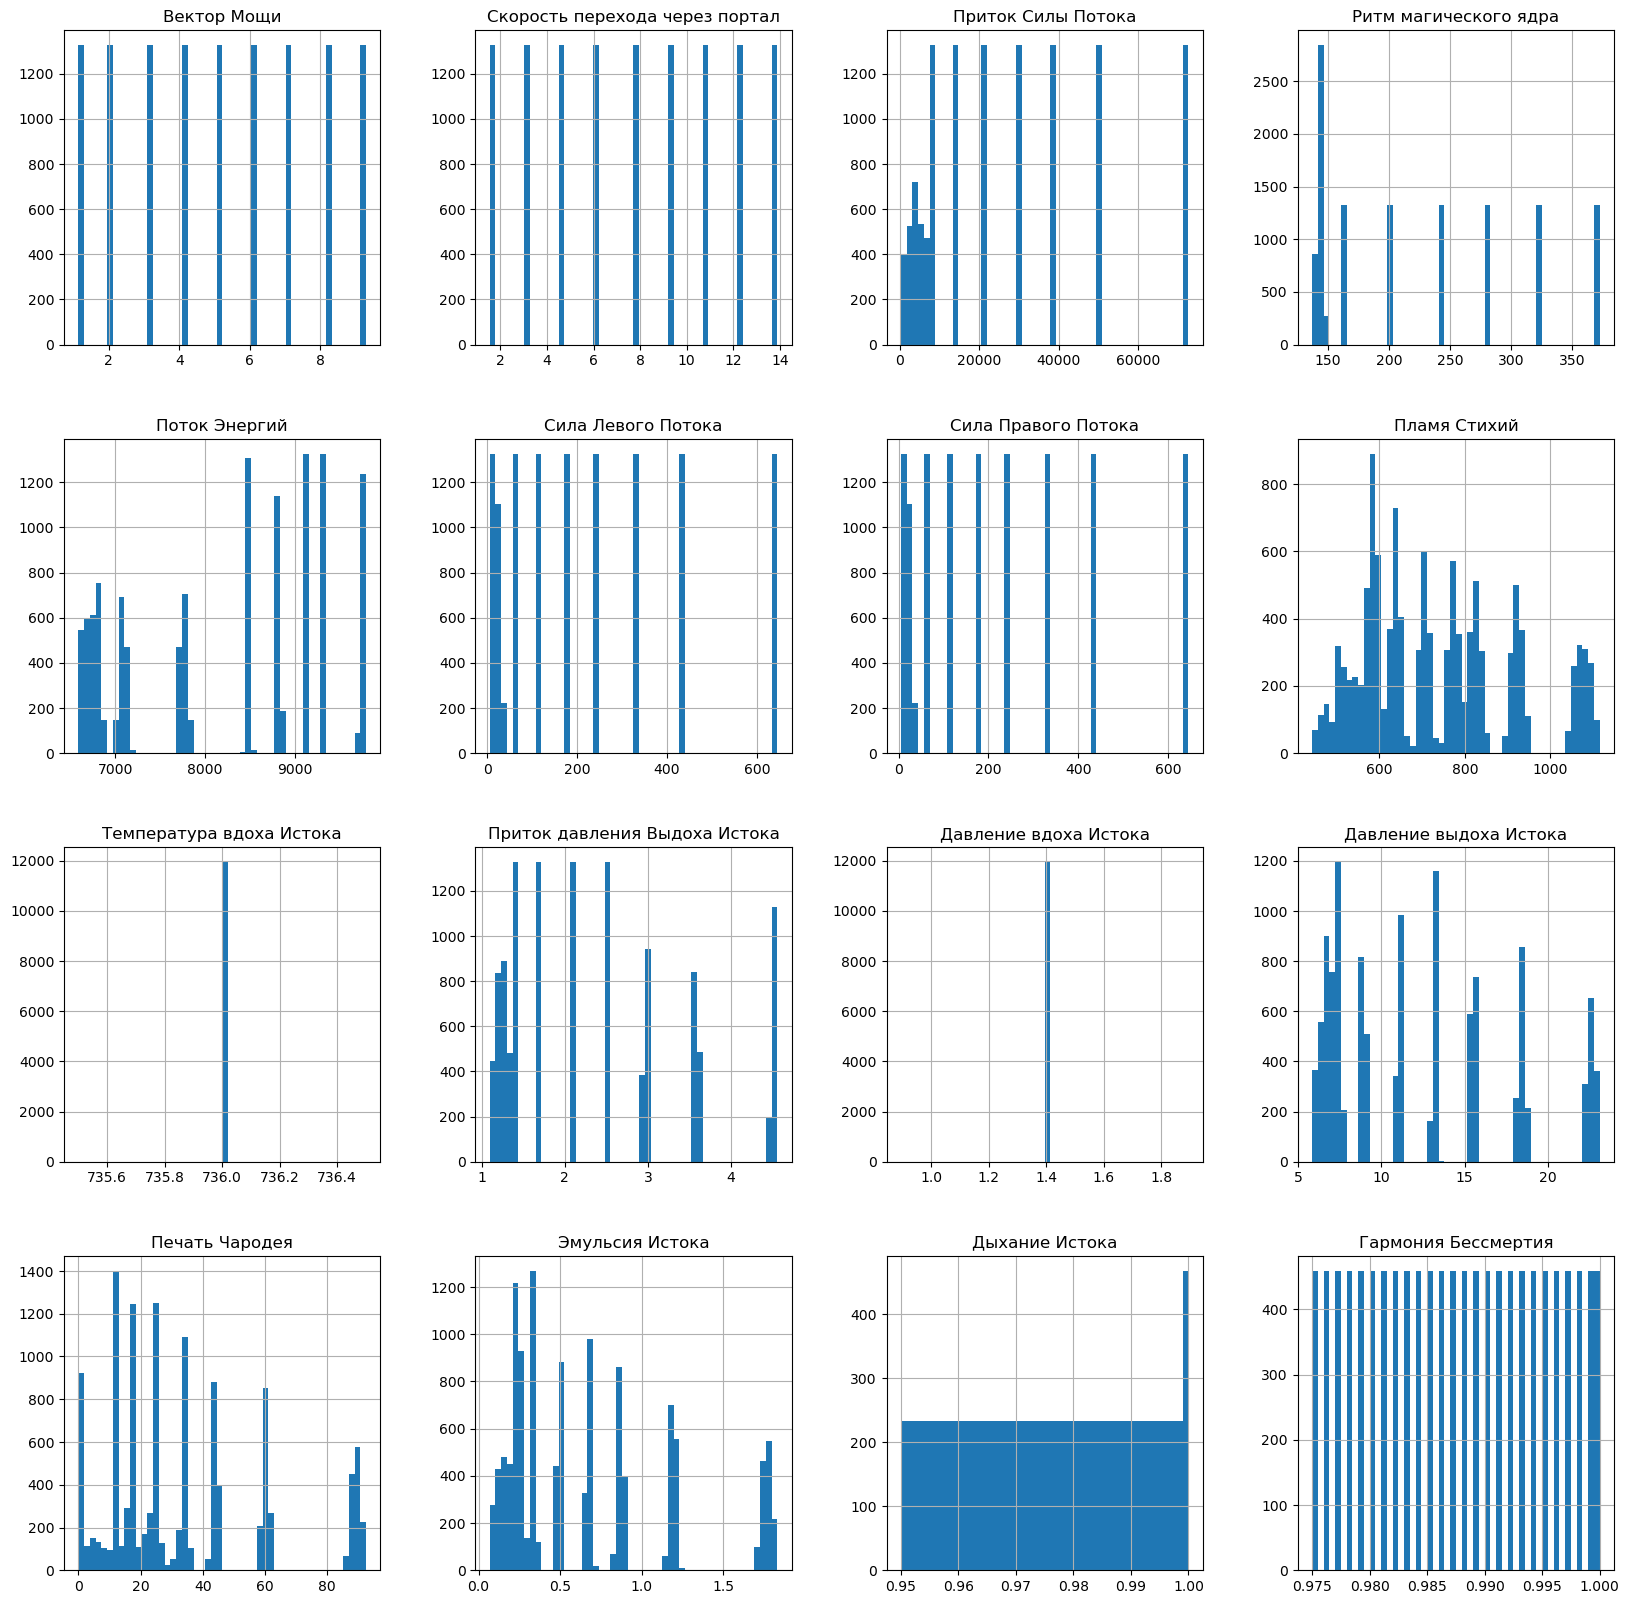

In [8]:

df.hist(bins=50, figsize=(20, 20))
plt.show()

C:\Users\kiryu\AppData\Local\Temp\ipykernel_12748\3553259447.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df.select_dtypes(include=["int64", "float64"]), x = i, kind = 'kde')


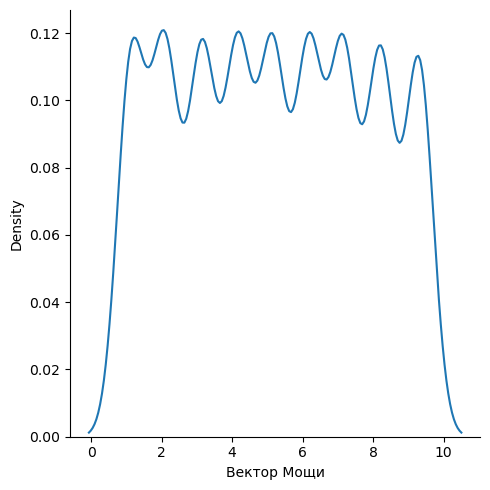

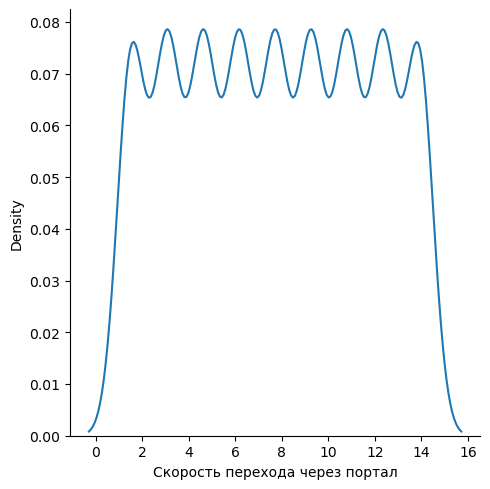

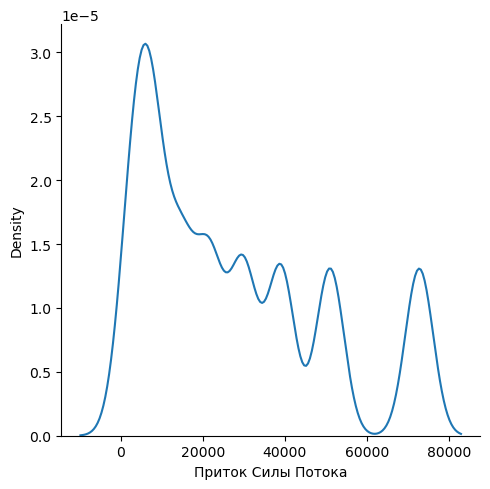

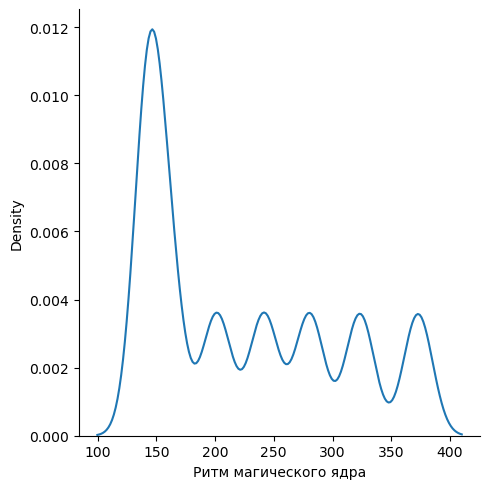

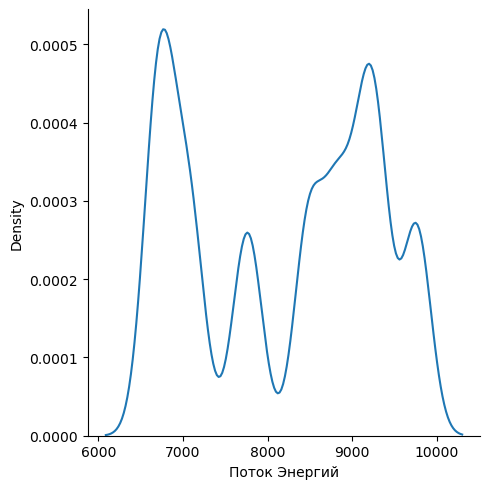

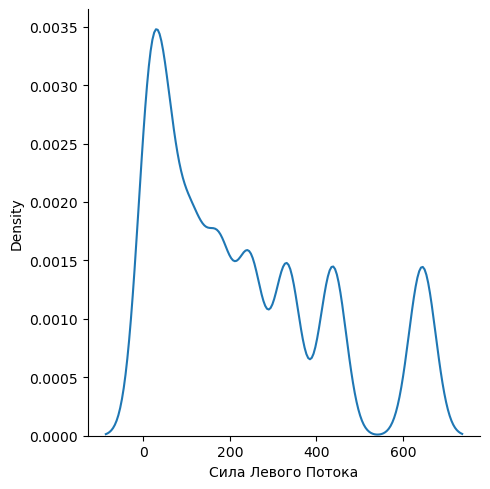

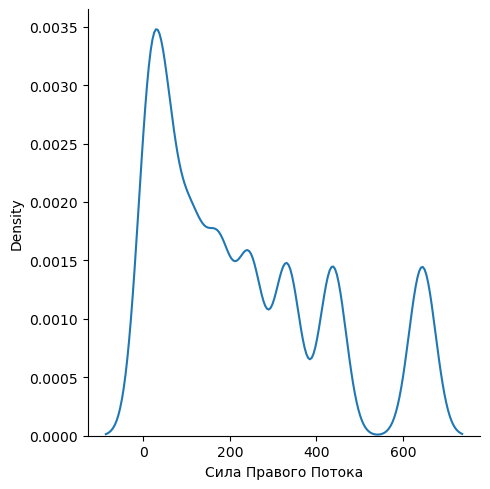

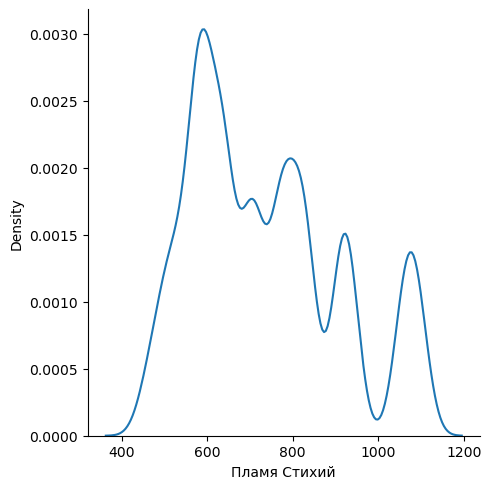

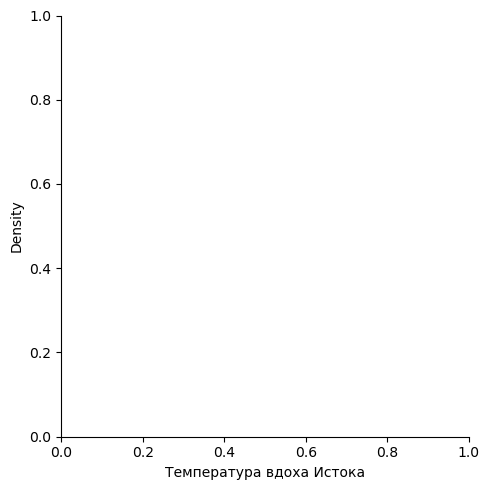

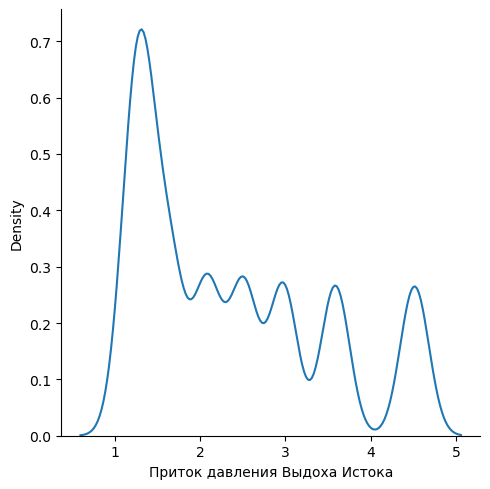

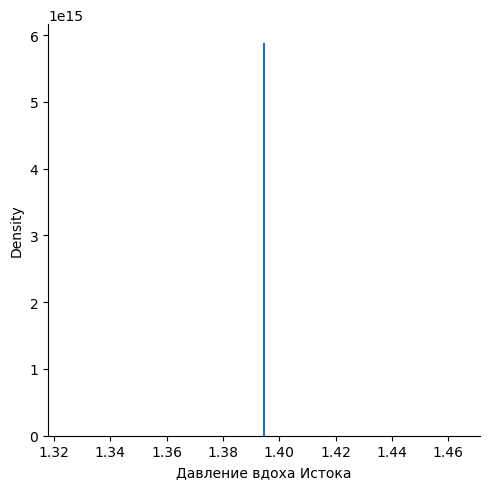

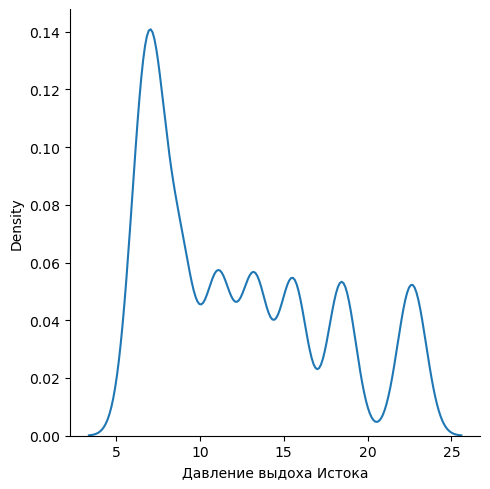

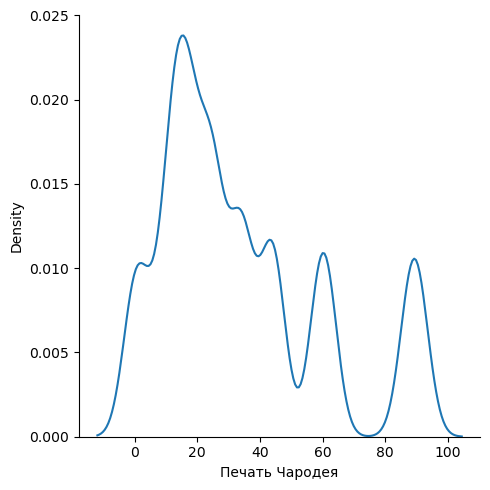

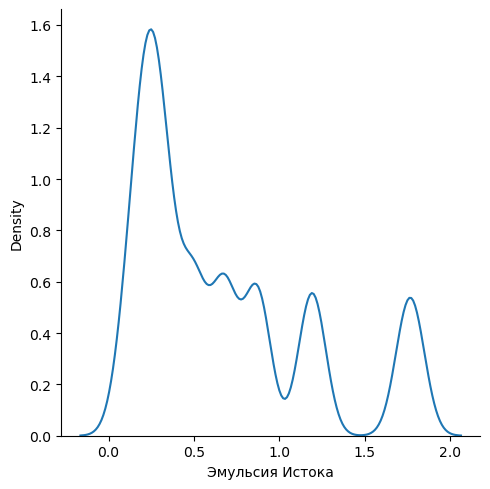

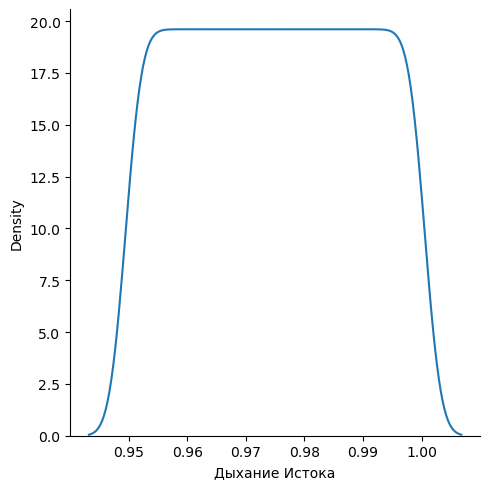

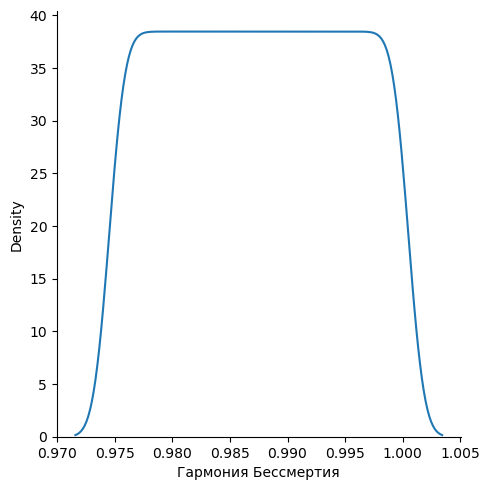

In [9]:
for i in df.select_dtypes(include=["int64", "float64"]).columns:
    sns.displot(df.select_dtypes(include=["int64", "float64"]), x = i, kind = 'kde')

Рассмотрели распределние данных, такие колонки как "Вектор Мощи", "Скорость перехода через портал", "Дыхание Истока",
"Гармония Бессмертия" имеют равномерное распределение, колонки: "Приток Силы Потока", "Ритм магического ядра","Сила Левого Потока", "Сила Правого потока", "Пламя стихий", "Приток давления Выдоха Истока", "Давление выдоха Истока", "Печать Чародея", "Эмульсия Истока" похожи на биномиальное распределение


Вектор Мощи
1.138    1326
2.088    1326
3.144    1326
4.161    1326
5.140    1326
6.175    1326
7.148    1326
8.206    1326
9.300    1326
Name: count, dtype: int64


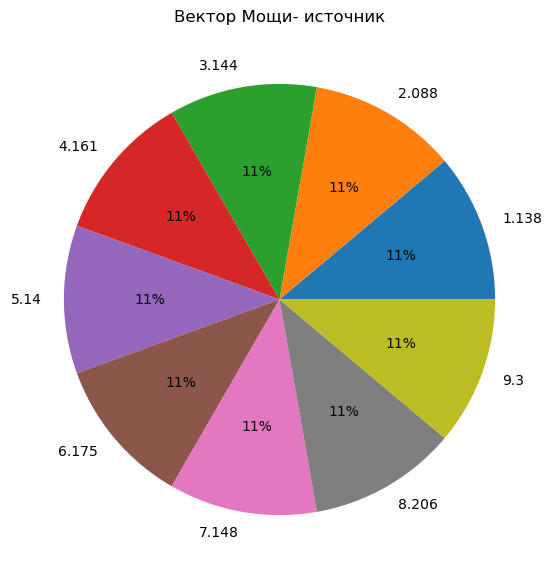

Скорость перехода через портал
1.54332     1326
3.08664     1326
4.62996     1326
6.17328     1326
7.71660     1326
9.25992     1326
10.80324    1326
12.34656    1326
13.88988    1326
Name: count, dtype: int64


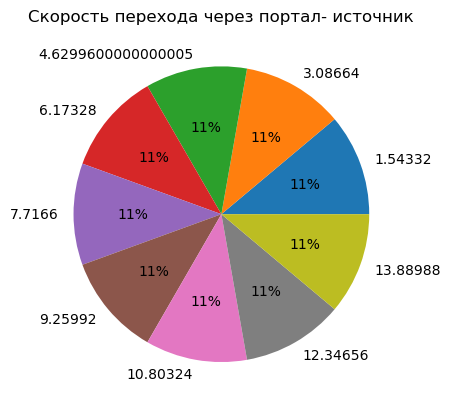

Гармония Бессмертия
0.975    459
0.976    459
0.999    459
0.998    459
0.997    459
0.996    459
0.995    459
0.994    459
0.993    459
0.992    459
0.991    459
0.990    459
0.989    459
0.988    459
0.987    459
0.986    459
0.985    459
0.984    459
0.983    459
0.982    459
0.981    459
0.980    459
0.979    459
0.978    459
0.977    459
1.000    459
Name: count, dtype: int64


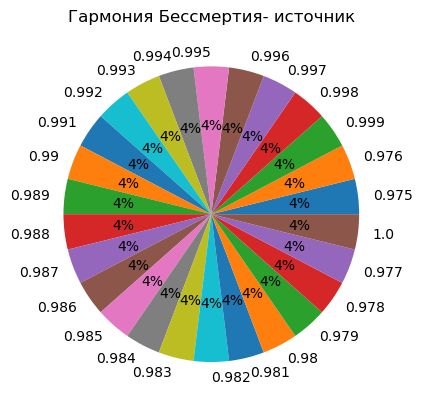

In [10]:
plt.figure(figsize=(10, 7))
list1 = ["Вектор Мощи", "Скорость перехода через портал", "Гармония Бессмертия"]
for i in list1:
    list2 = list(df[i].unique())
    print(df[i].value_counts())
    values = df[i].value_counts()
    plt.pie(df[i].value_counts(),autopct='%1.0f%%', labels=values.index)
    plt.title(f"{i}- источник")
    plt.show()

<Axes: >

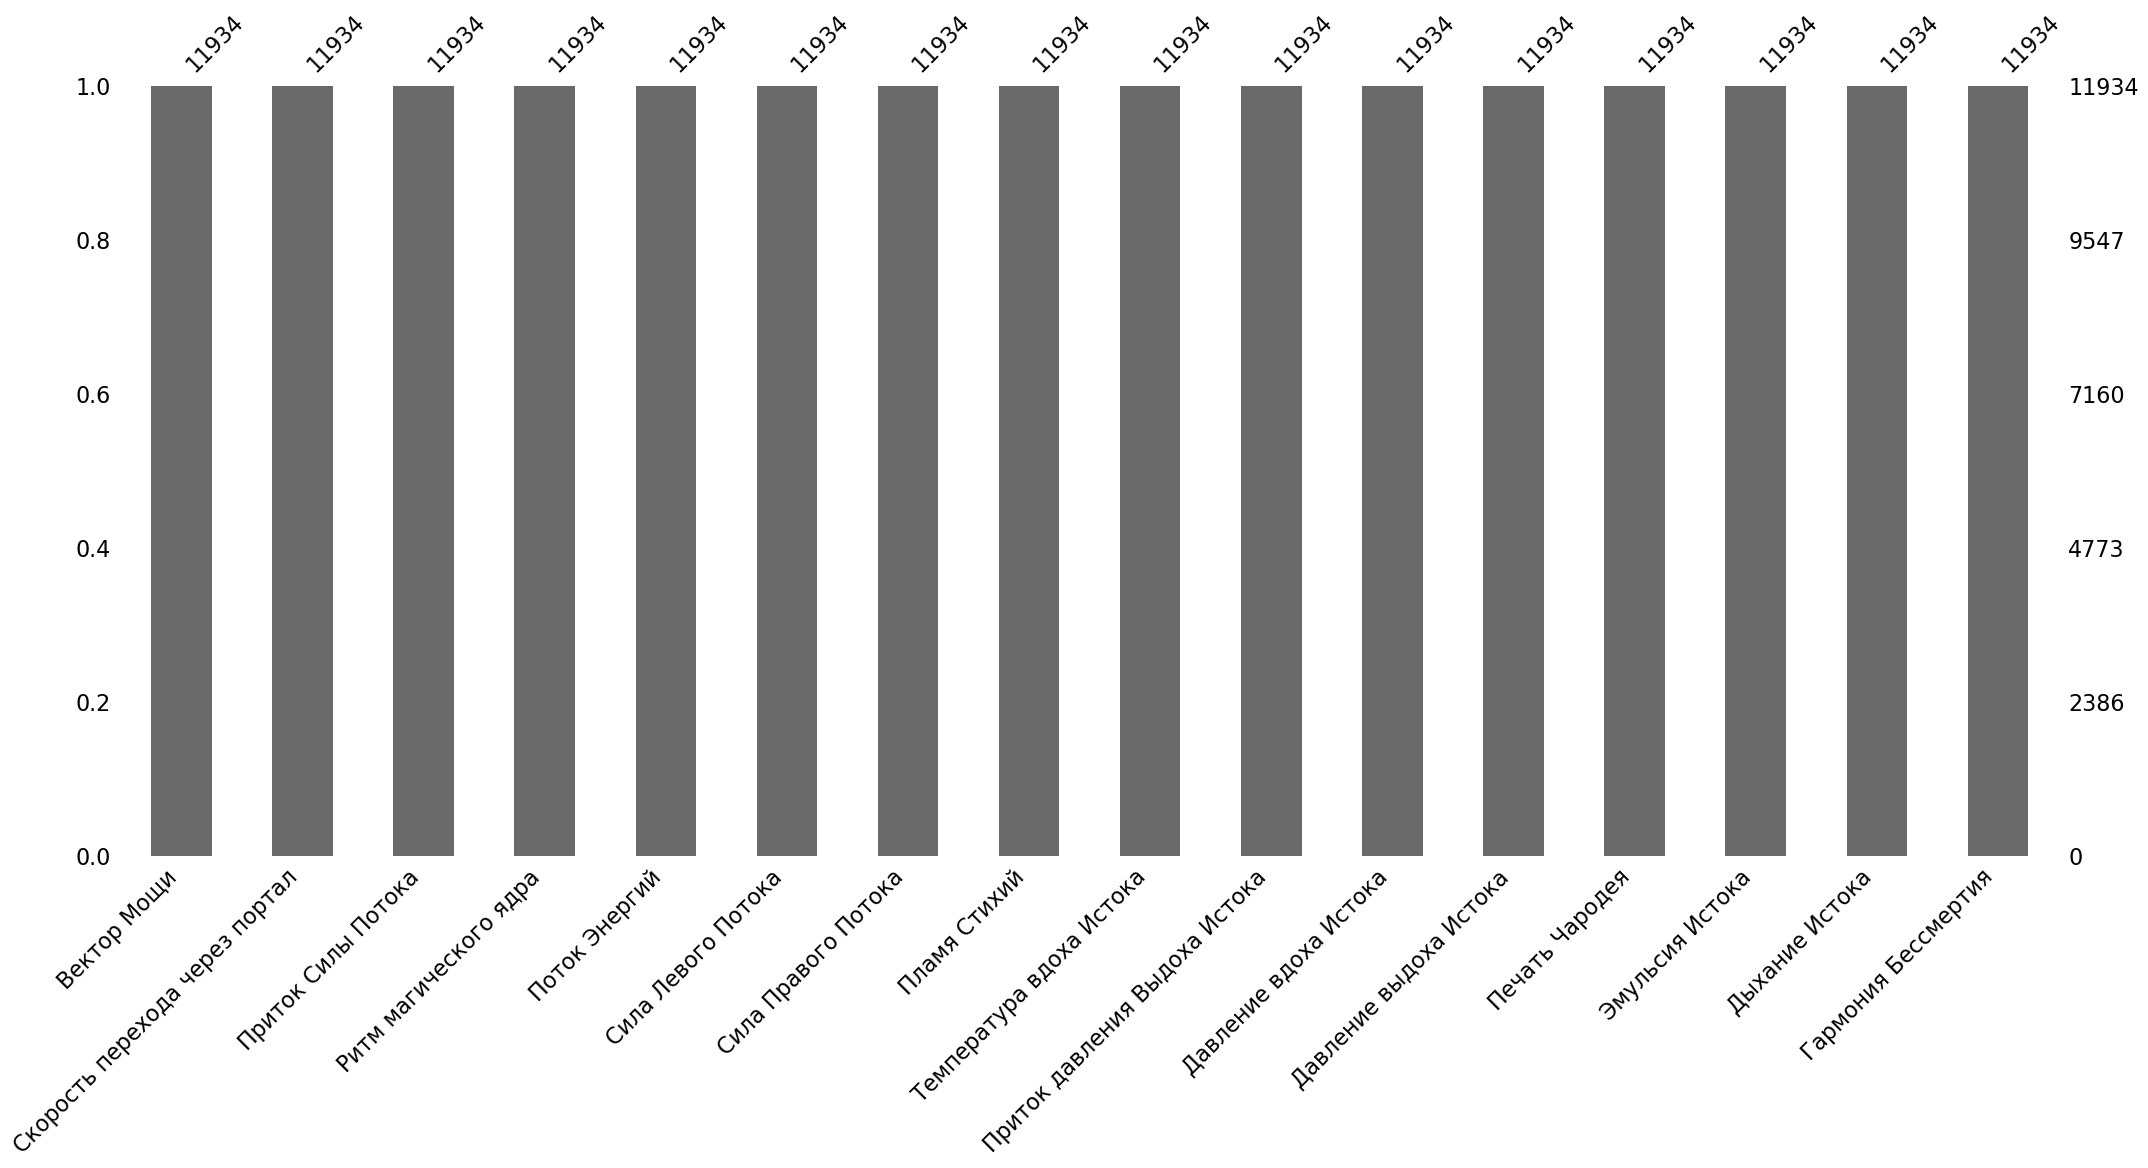

In [11]:
#визуализируем пропуски
msno.bar(df)

Визуализировал отсутствие пропусков

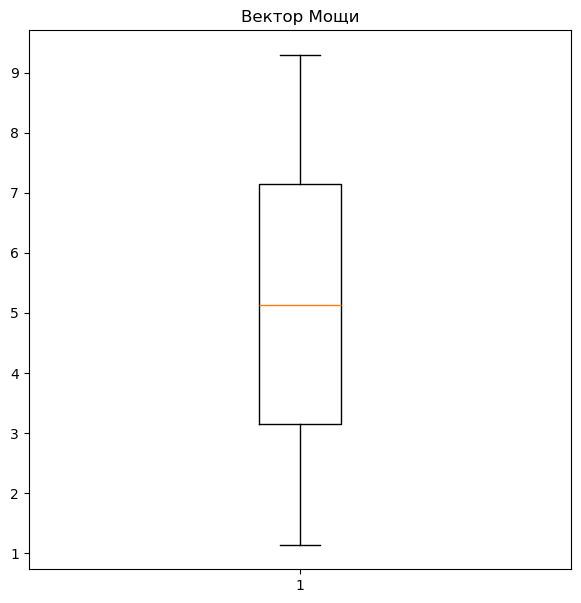

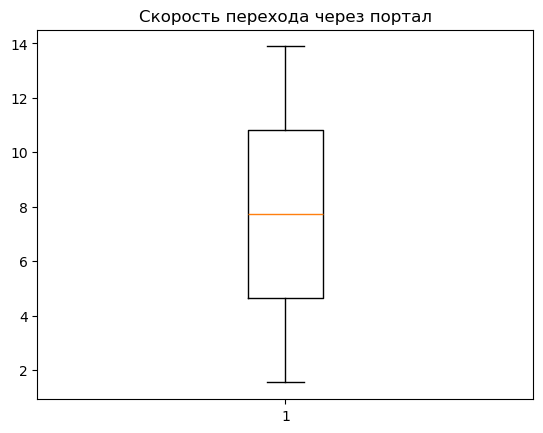

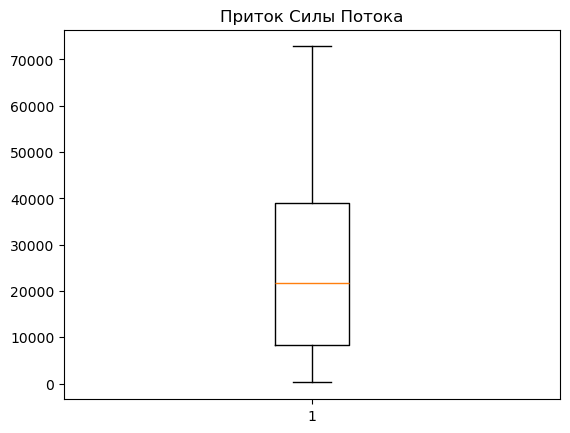

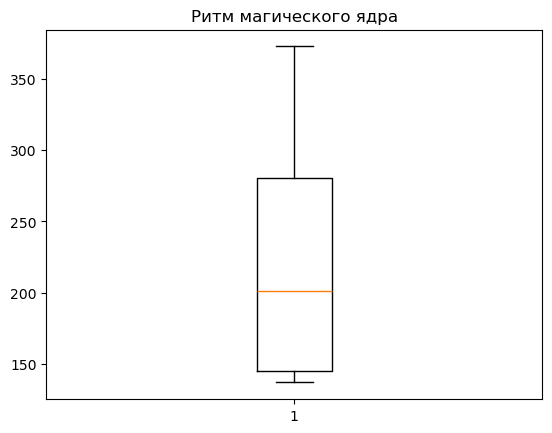

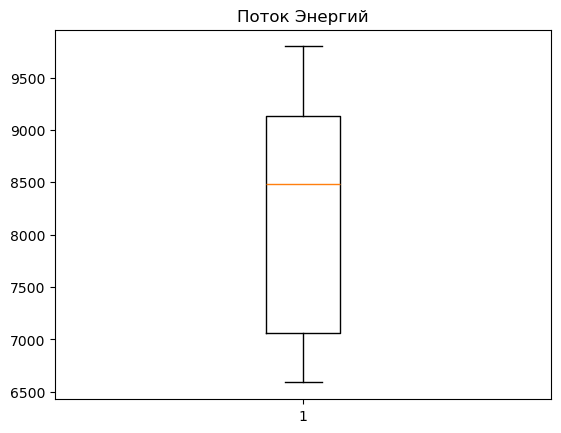

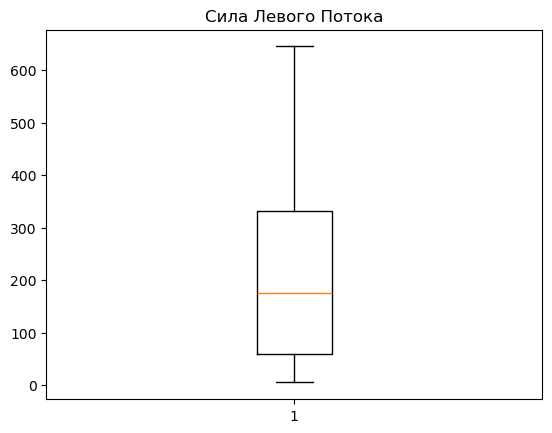

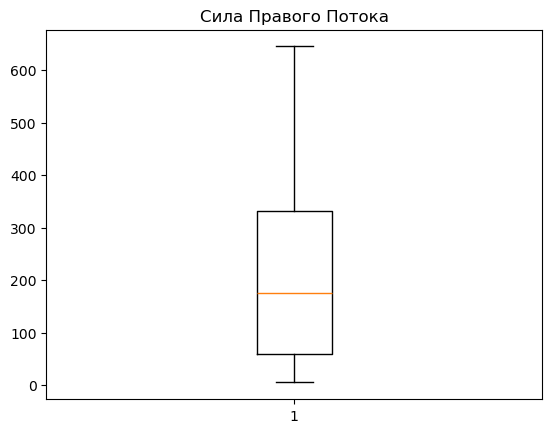

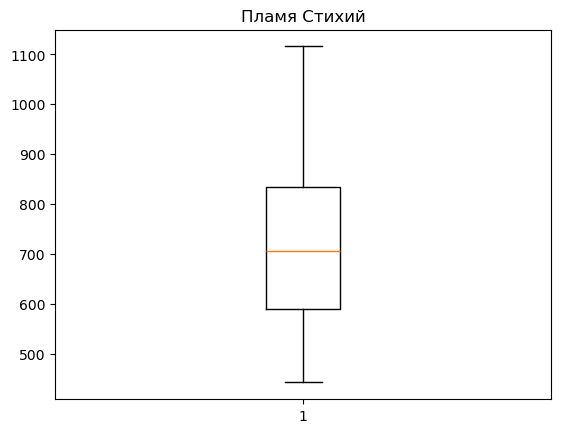

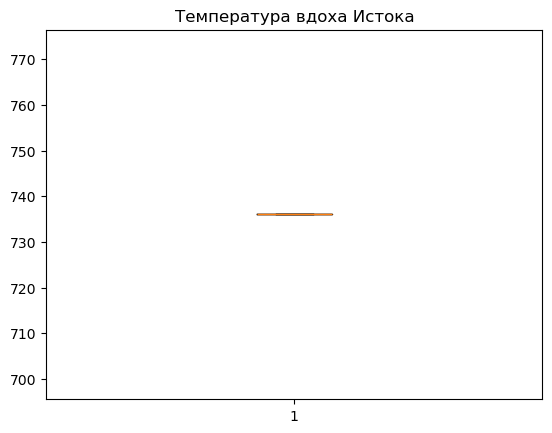

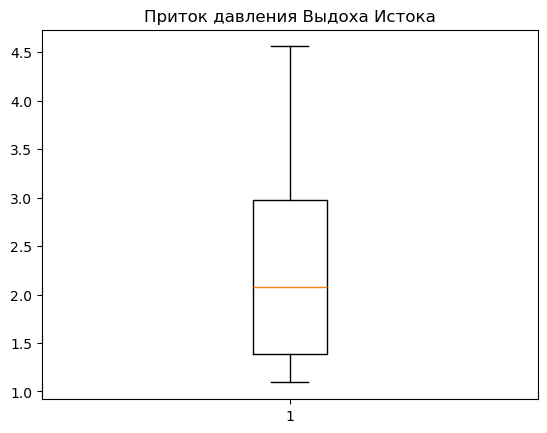

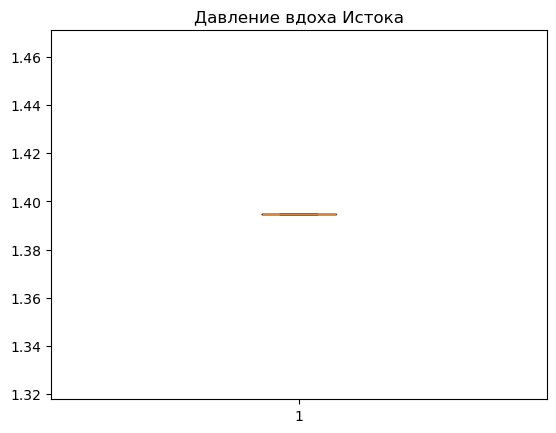

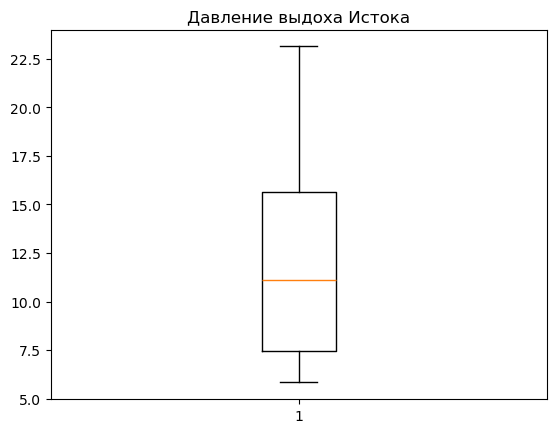

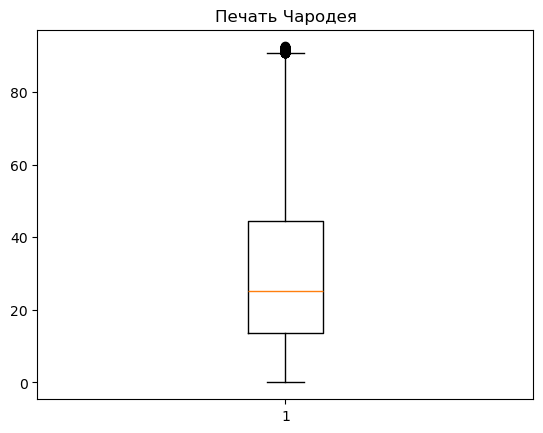

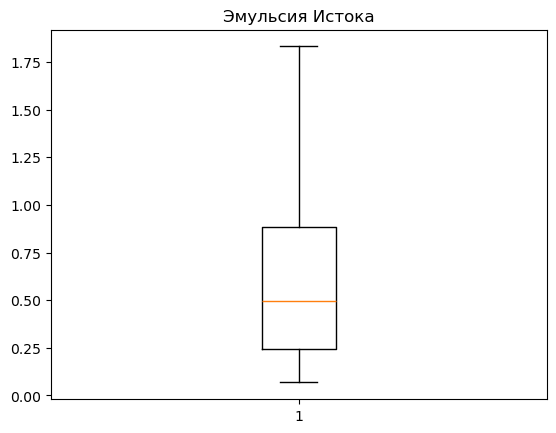

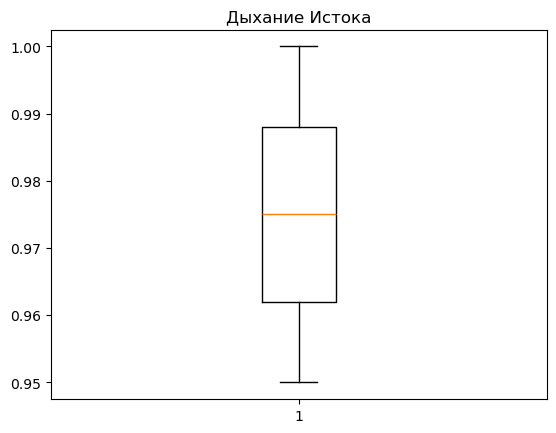

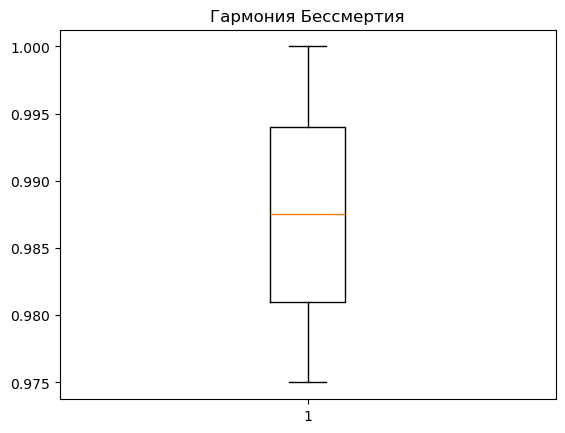

In [12]:
#Визуализируем выбросы
plt.figure(figsize=(7, 7))
for i in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

С помощью boxplot визуализируем выбросы. Выбросы нашли только в колонке: "Печать Чародея"

In [13]:

series_pech = df["Печать Чародея"]
q25 = series_pech.quantile(0.25)
q75 = series_pech.quantile(0.75)
iqr = q75 - q25

long_q = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
vibros = (df['Печать Чародея'] < long_q[0]) | (df['Печать Чародея'] > long_q[1])

display(df[vibros])
print("Верхняя граница:",long_q[1])
print("Нижняя граница:", long_q[0])


Вектор Мощи  Скорость перехода через портал  Приток Силы Потока  \
8             9.3                        13.88988           72763.329   
17            9.3                        13.88988           72763.515   
26            9.3                        13.88988           72764.565   
35            9.3                        13.88988           72765.436   
44            9.3                        13.88988           72766.645   
...           ...                             ...                 ...   
4454          9.3                        13.88988           72759.855   
4463          9.3                        13.88988           72761.521   
4688          9.3                        13.88988           72759.281   
4697          9.3                        13.88988           72760.783   
4922          9.3                        13.88988           72760.022   

      Ритм магического ядра  Поток Энергий  Сила Левого Потока  \
8                372.843693       9778.528             644.905   
17               372.844321       9779.311             644.963   
26               372.844530       9780.103             645.076   
35               372.844740       9780.887             645.040   
44               372.844740       9781.672             644.879   
...                     ...            ...                 ...   
4454             372.842017       9755.931             645.021   
4463             372.841284       9756.799             644.961   
4688             372.842541       9754.742             644.761   
4697             372.842541       9755.613             644.736   
4922             372.841493       9753.569             644.751   

      Сила Правого Потока  Пламя Стихий  Температура вдоха Истока  \
8                 644.905      1115.797                       736   
17                644.963      1114.887                       736   
26                645.076      1113.985                       736   
35                645.040      1113.084                       736   
44                644.879      1112.188                       736   
...                   ...           ...                       ...   
4454              645.021      1093.797                       736   
4463              644.961      1092.895                       736   
4688              644.761      1092.665                       736   
4697              644.736      1091.762                       736   
4922              644.751      1091.541                       736   

      Приток давления Выдоха Истока  Давление вдоха Истока  \
8                             4.498               1.394603   
17                            4.496               1.394603   
26                            4.495               1.394603   
35                            4.494               1.394603   
44                            4.493               1.394603   
...                             ...                    ...   
4454                          4.521               1.394603   
4463                          4.520               1.394603   
4688                          4.522               1.394603   
4697                          4.521               1.394603   
4922                          4.524               1.394603   

      Давление выдоха Истока  Печать Чародея  Эмульсия Истока  Дыхание Истока  \
8                     22.811          92.556            1.832           0.950   
17                    22.784          92.448            1.830           0.950   
26                    22.756          92.342            1.828           0.950   
35                    22.729          92.235            1.826           0.950   
44                    22.701          92.129            1.824           0.950   
...                      ...             ...              ...             ...   
4454                  22.935          91.068            1.803           0.969   
4463                  22.908          90.961            1.801           0.969   
4688                  22.942     

Верхняя граница: 90.86499999999998
Нижняя граница: -32.634999999999984


In [14]:
df.loc[df["Печать Чародея"] > long_q[1], "Печать Чародея"] = np.median(df["Печать Чародея"])
#Избавились от выюросов

In [15]:
df.loc[df["Печать Чародея"] > long_q[1], "Печать Чародея"]

Series([], Name: Печать Чародея, dtype: float64)

Избавились от выбросов

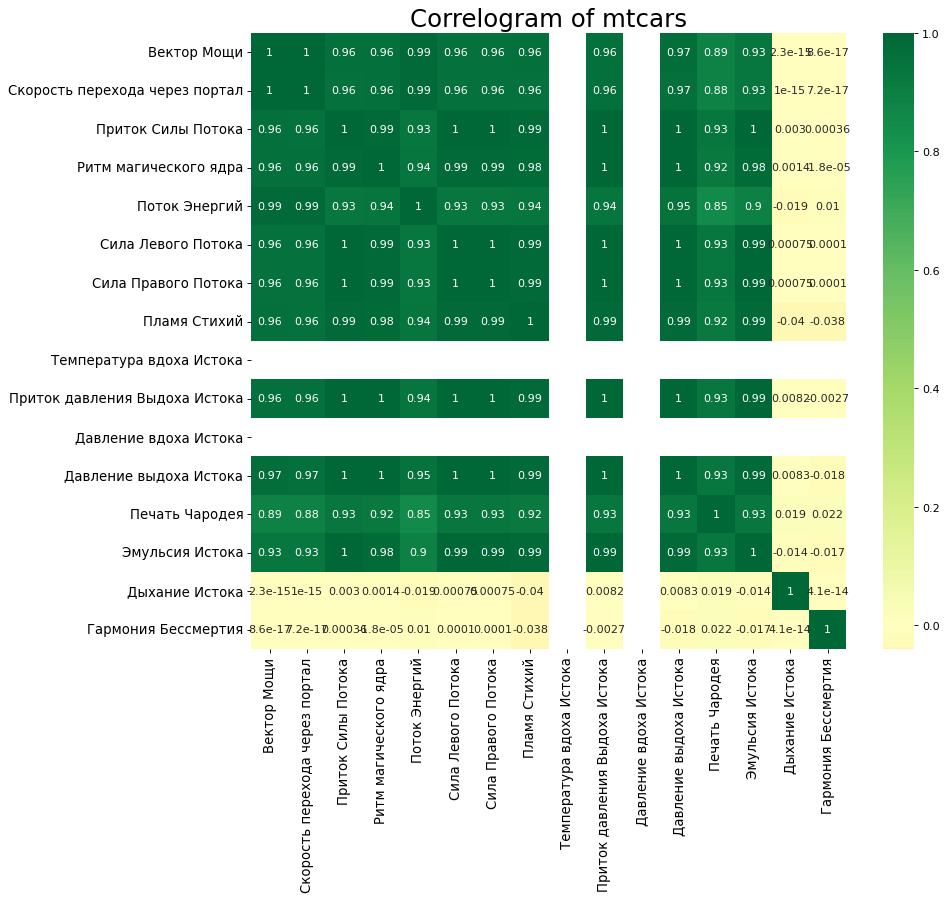

In [16]:


plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Построили heatmap с коэффициентом корреляции Пирсона и визуализировали мультиколлинеарность между признаками

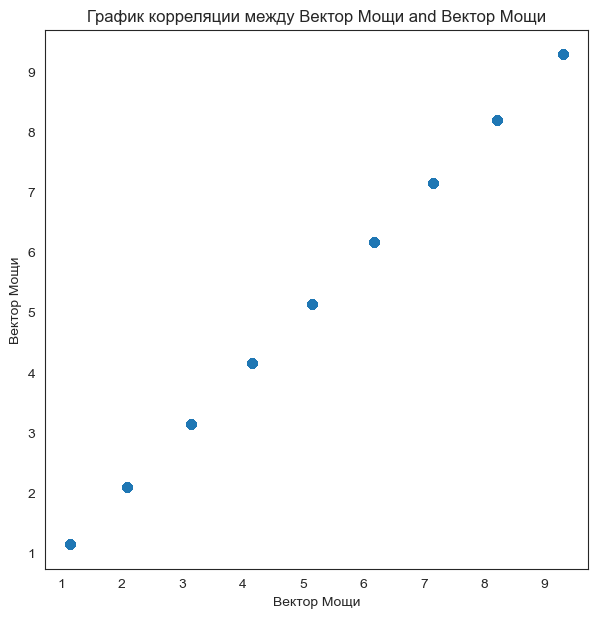

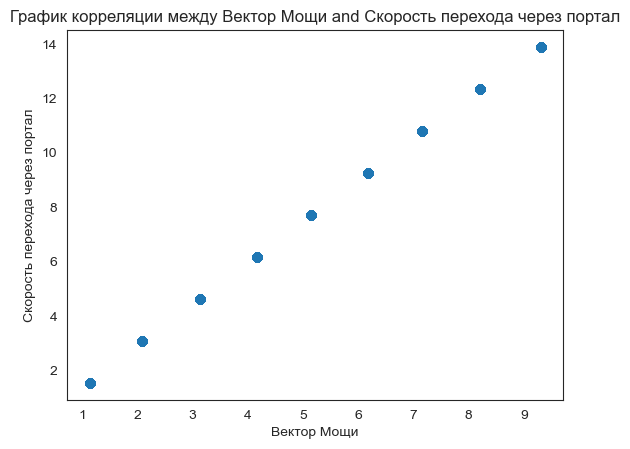

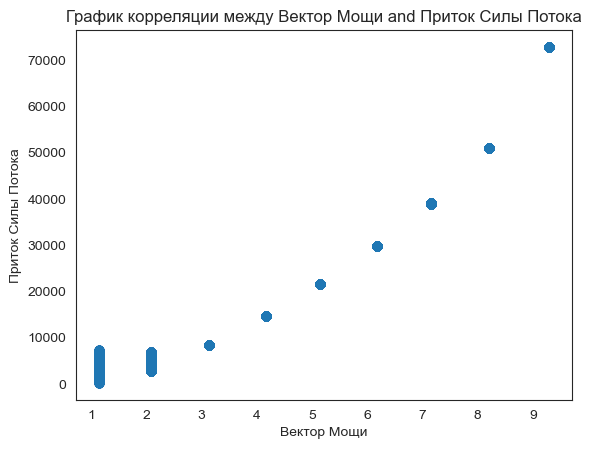

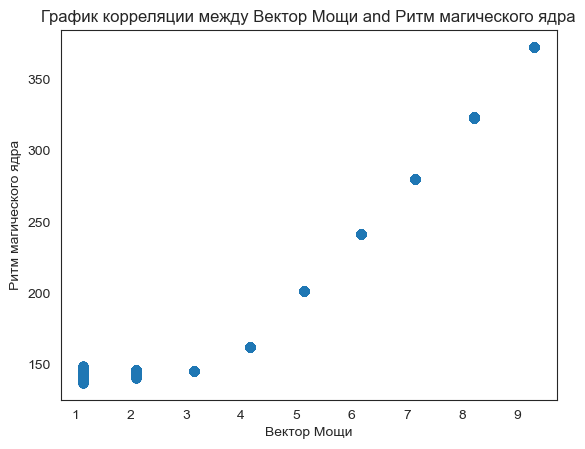

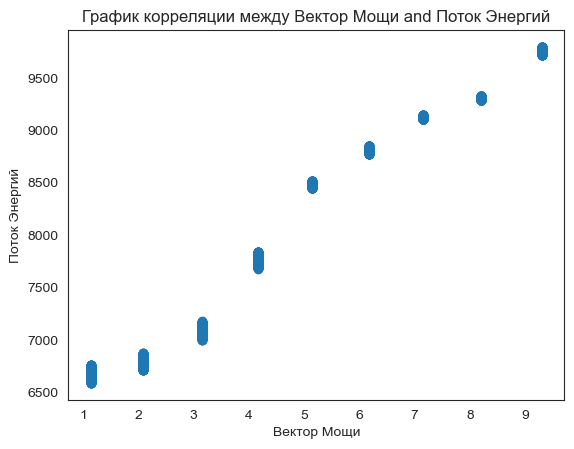

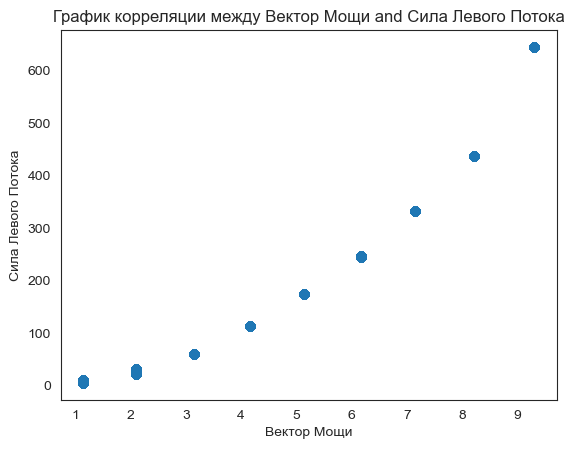

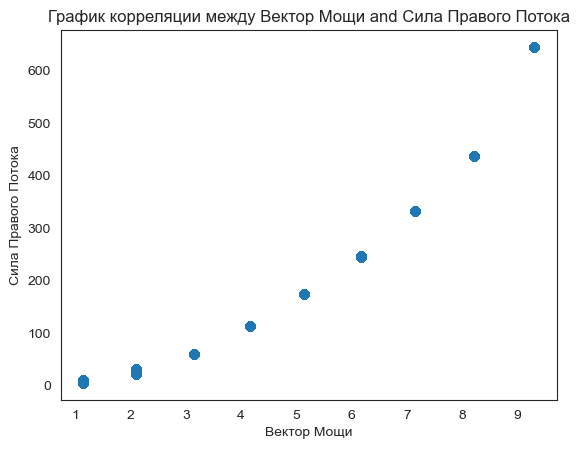

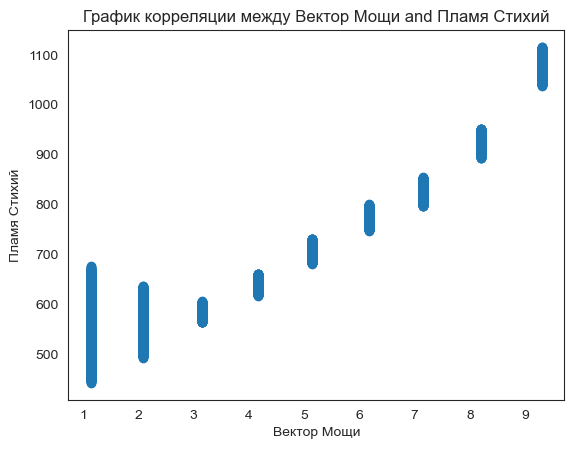

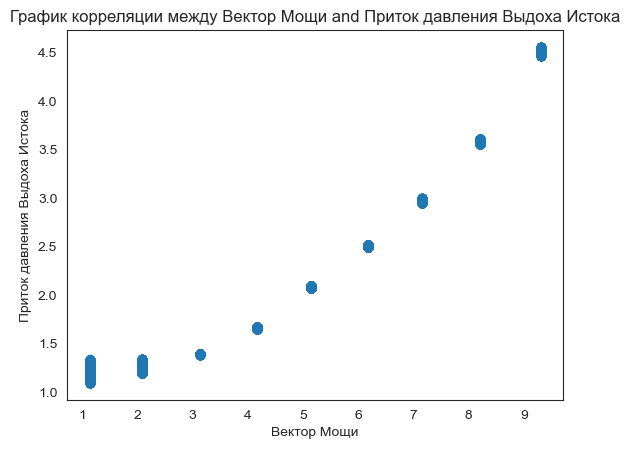

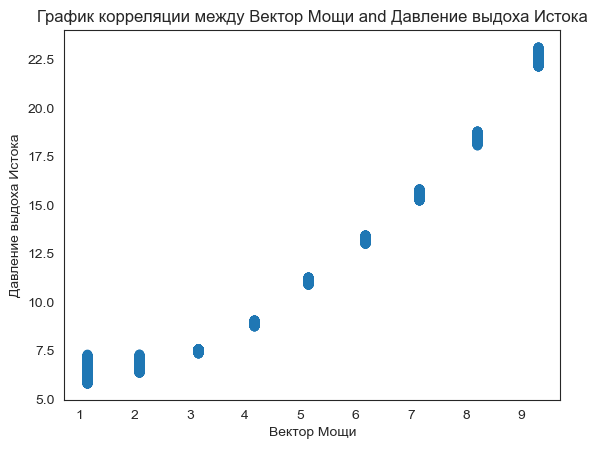

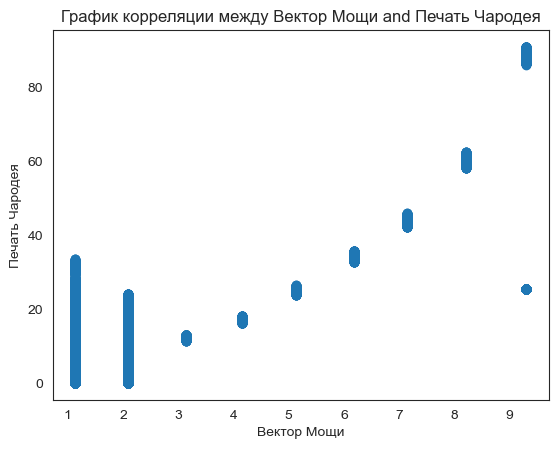

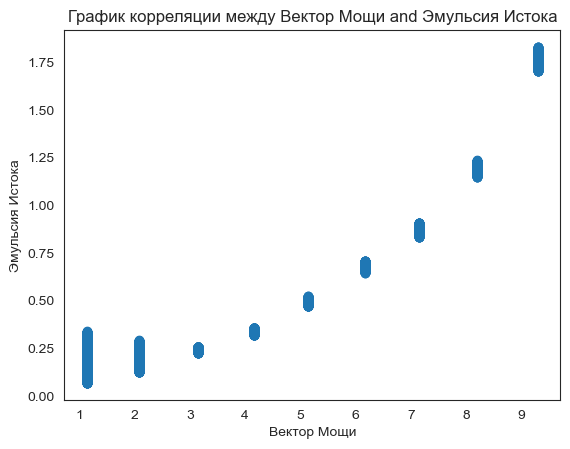

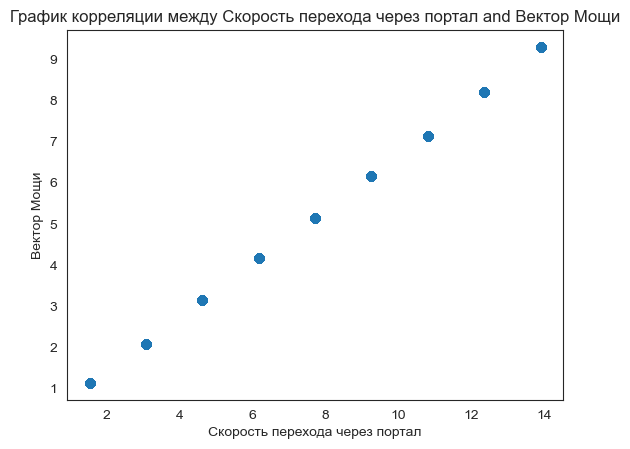

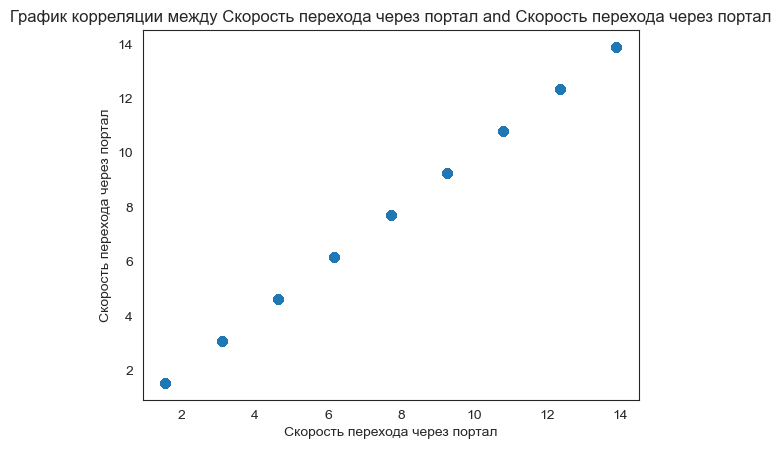

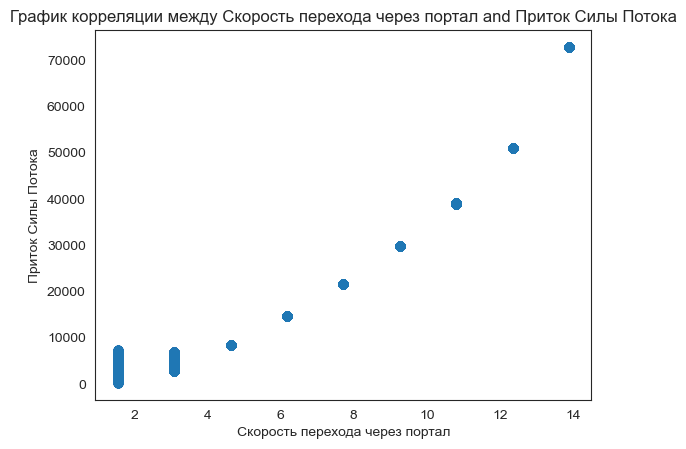

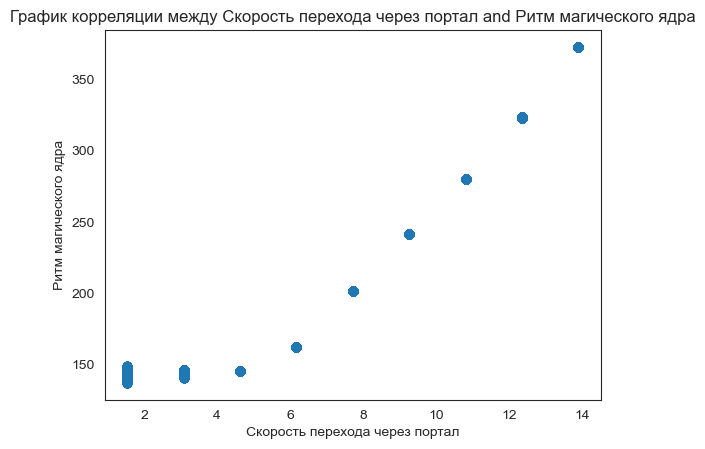

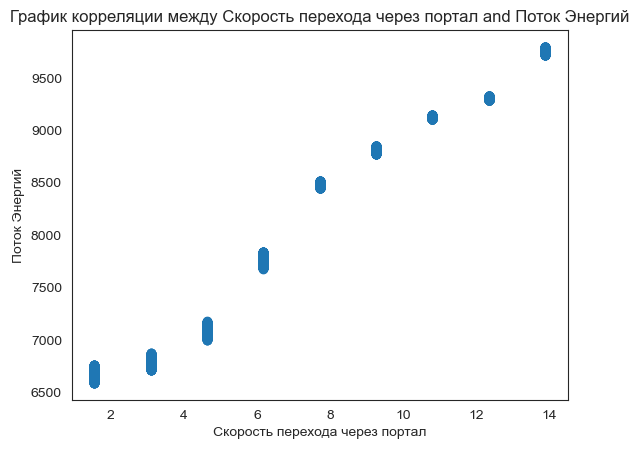

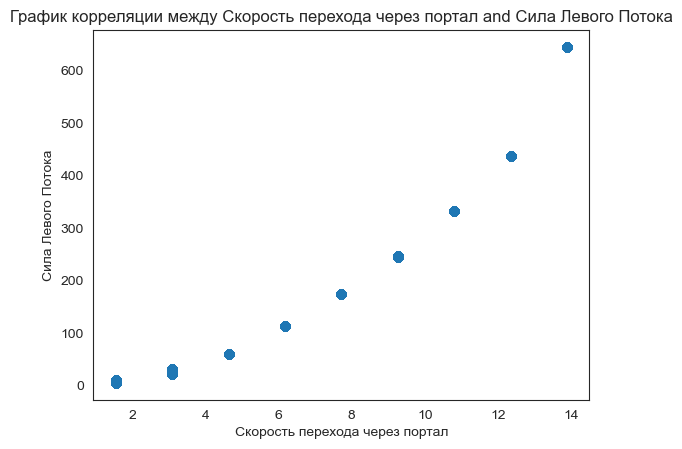

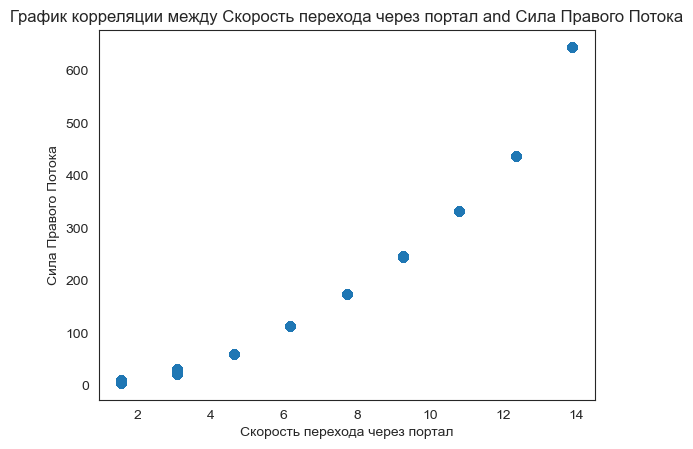

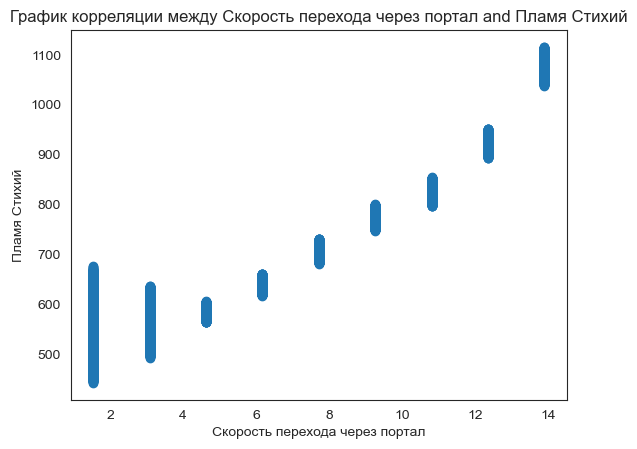

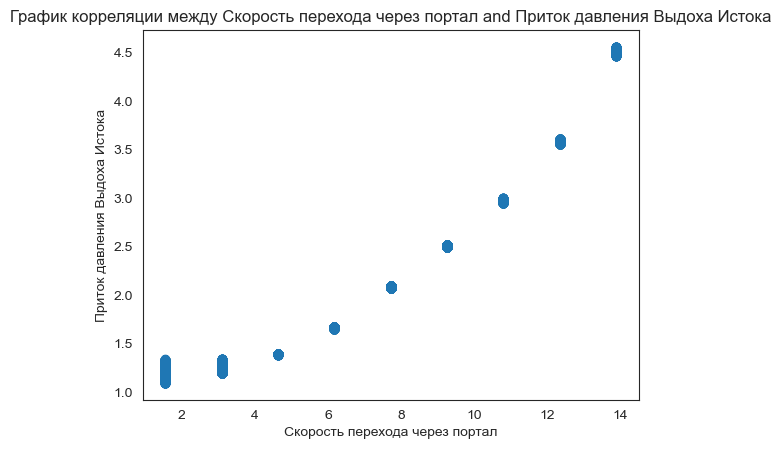

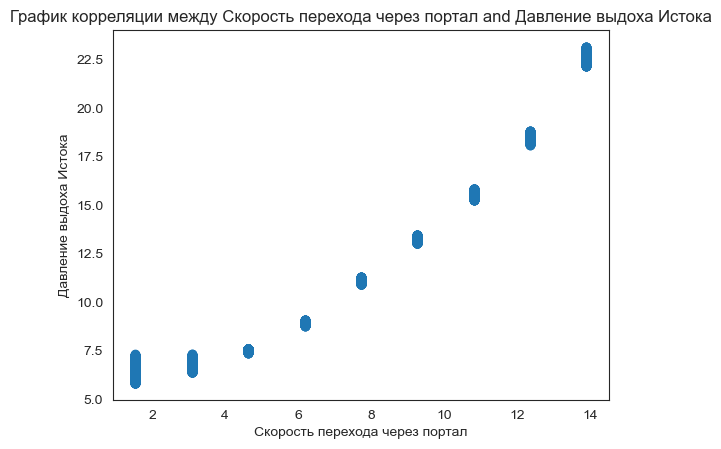

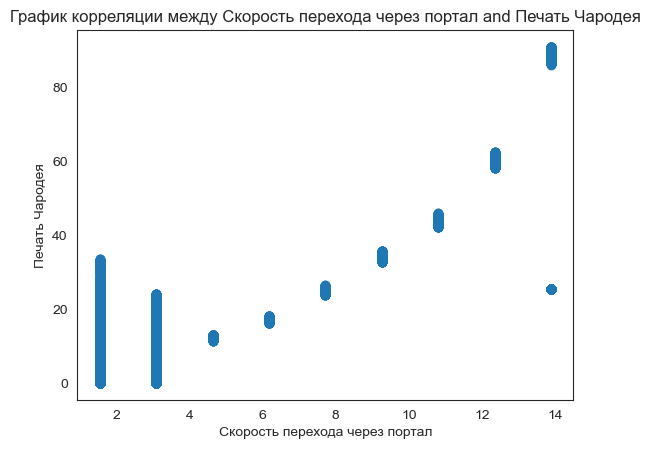

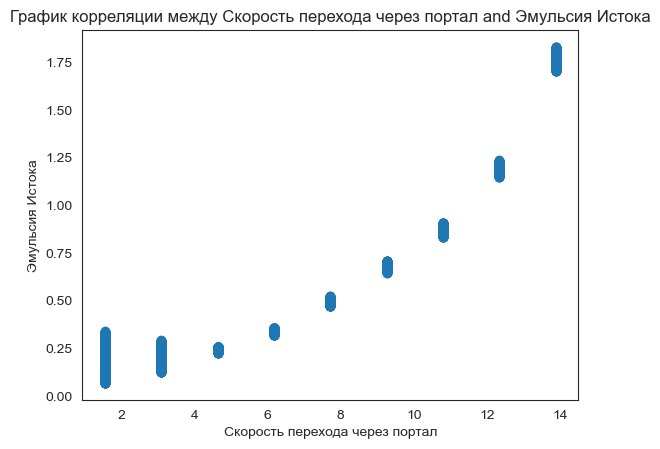

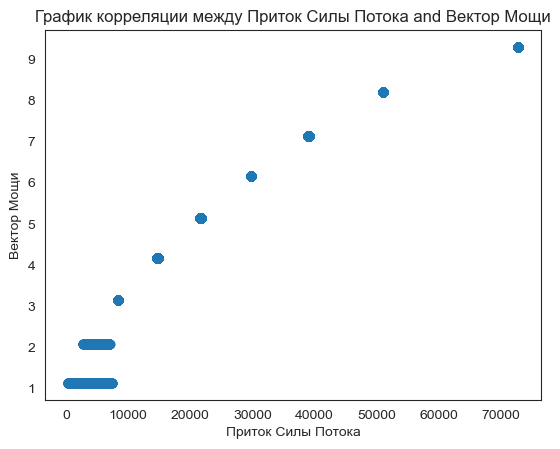

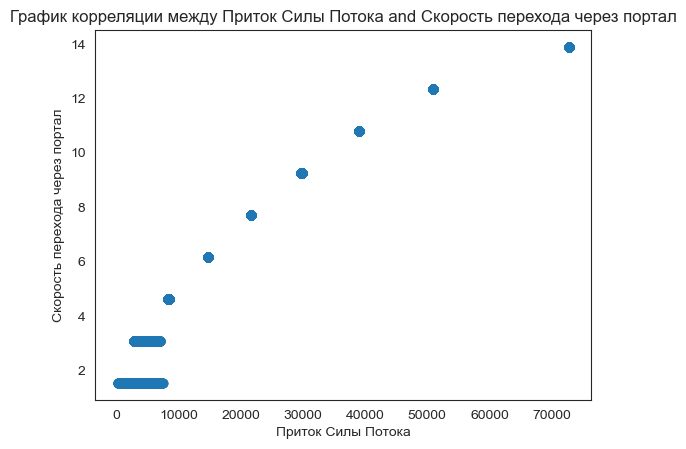

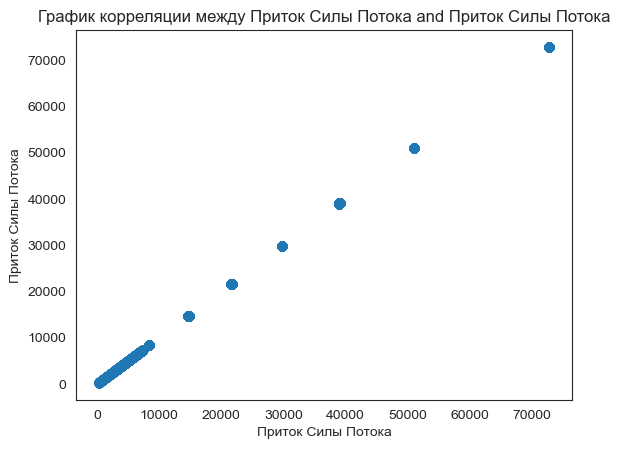

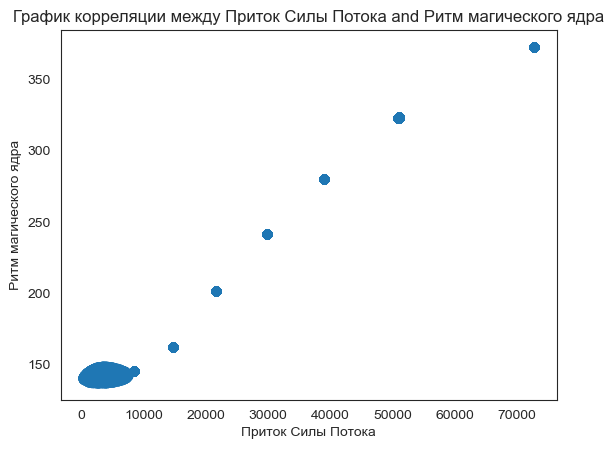

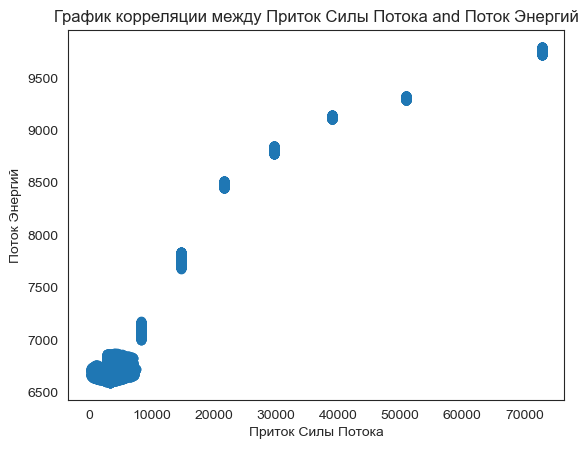

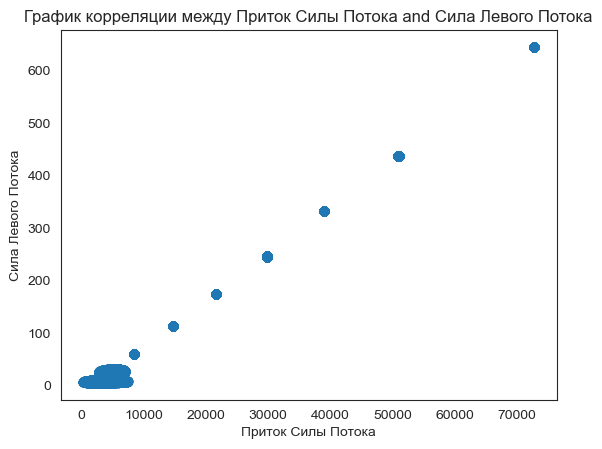

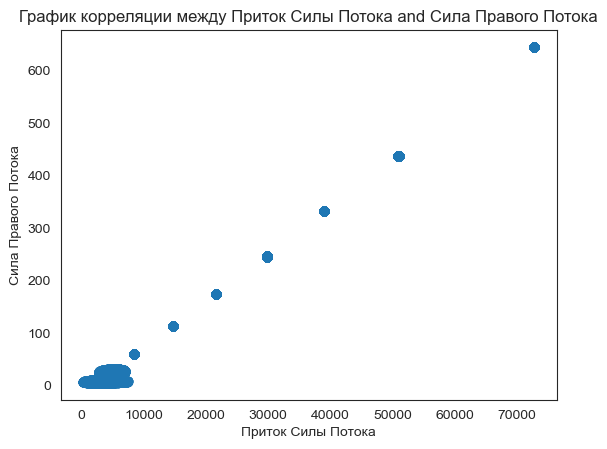

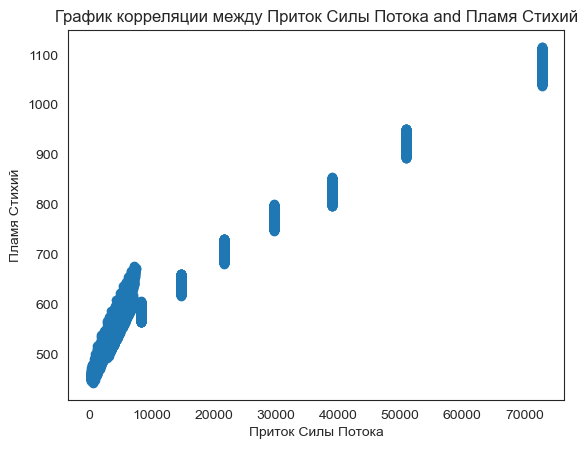

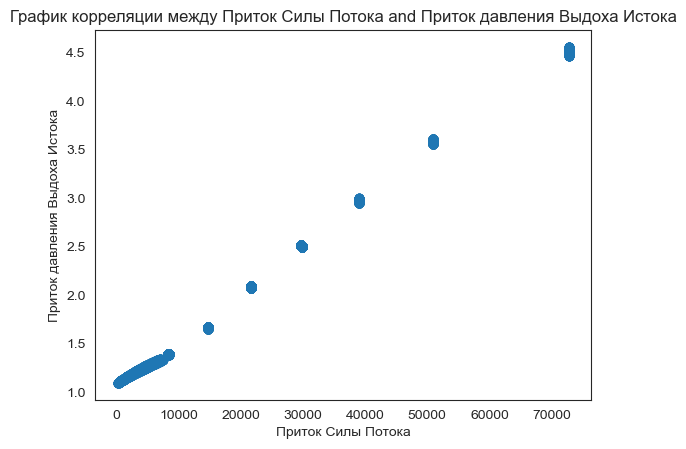

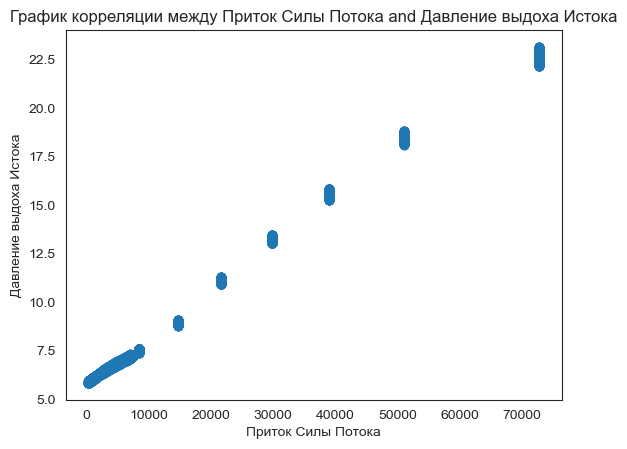

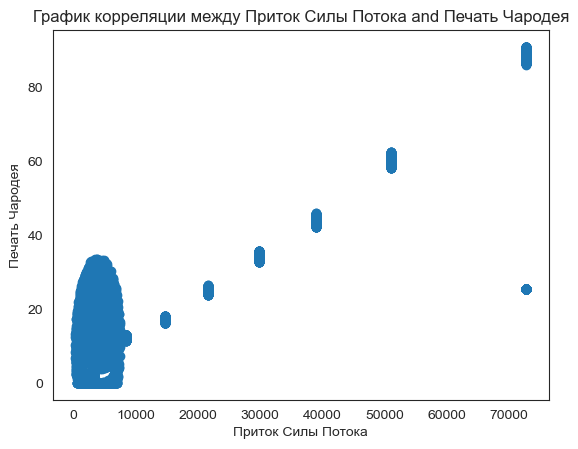

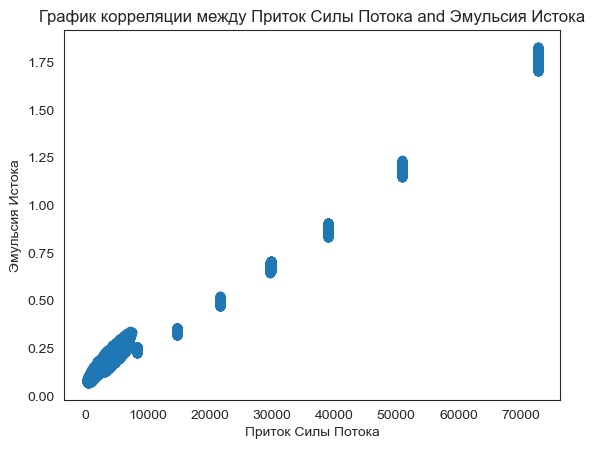

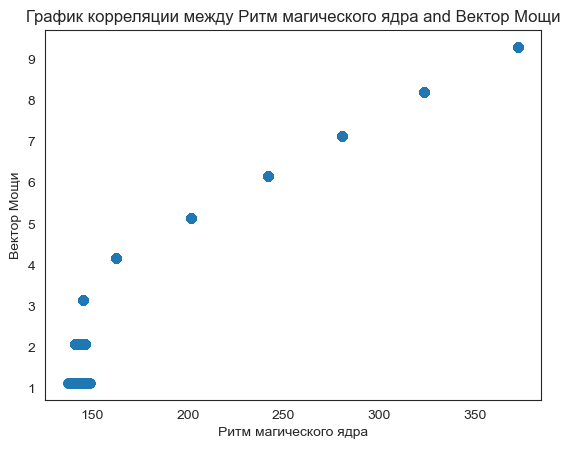

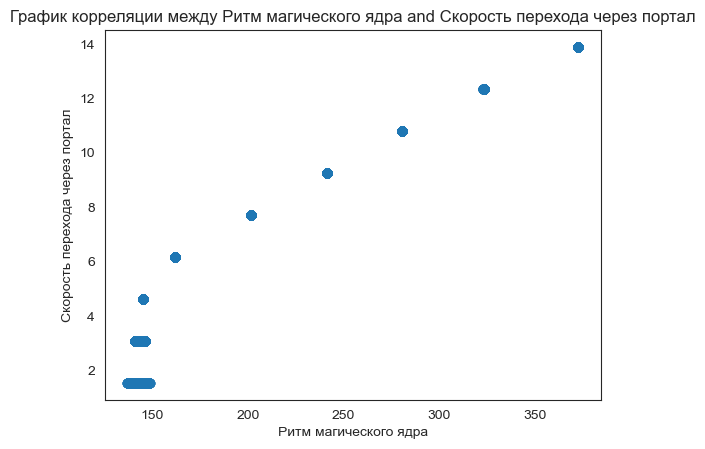

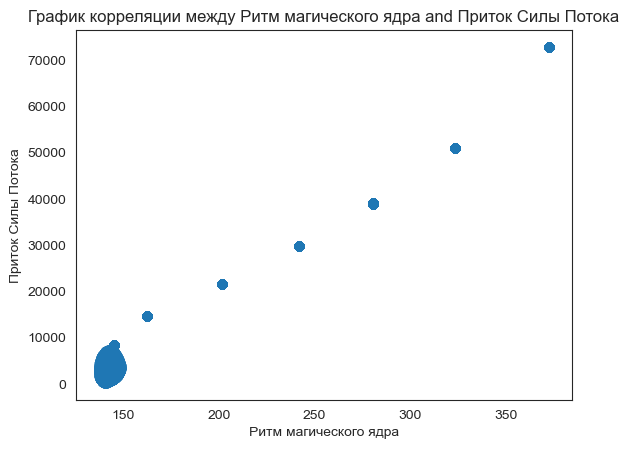

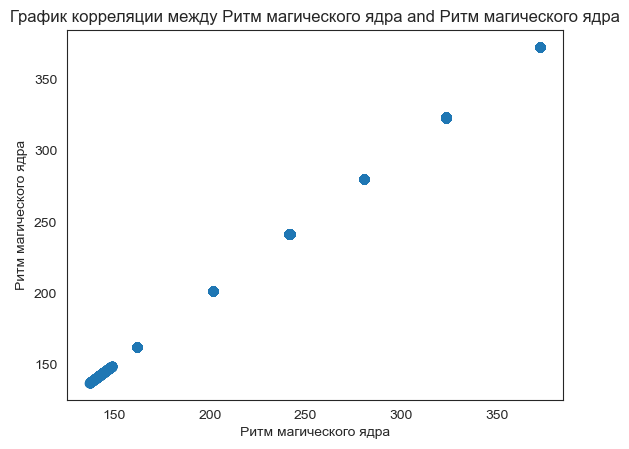

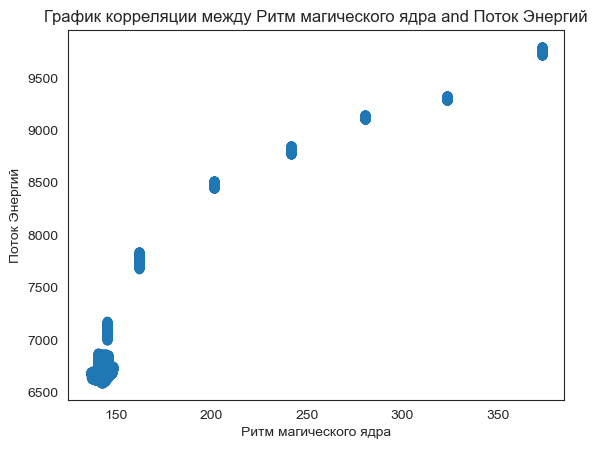

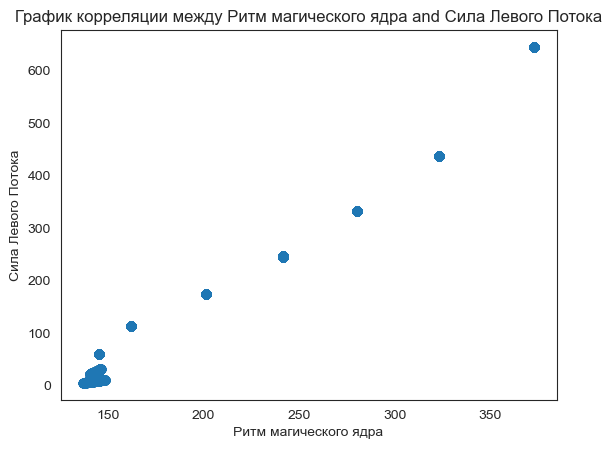

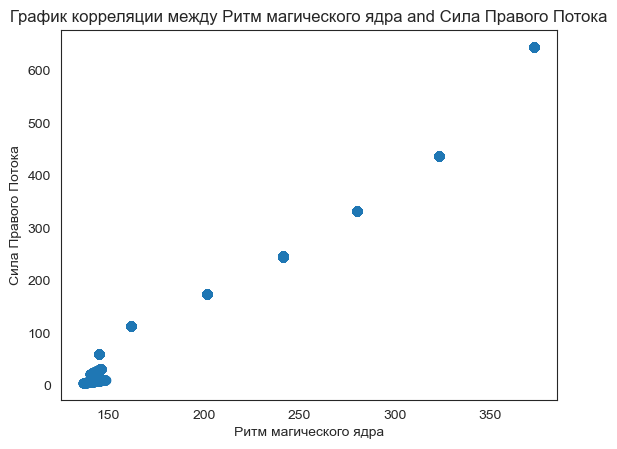

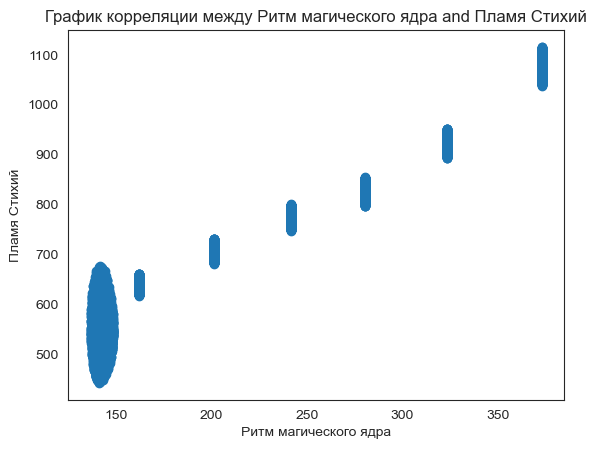

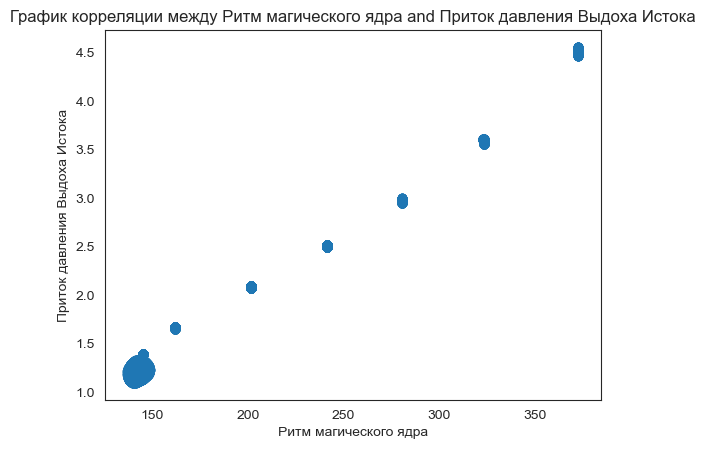

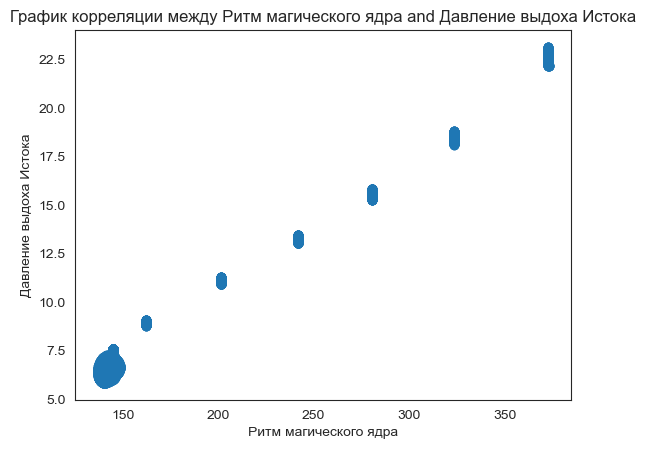

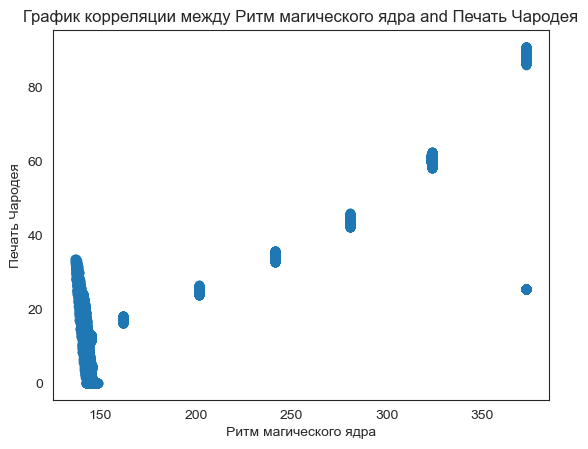

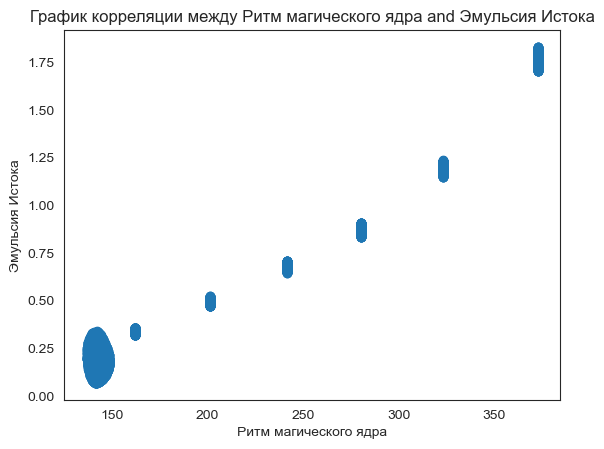

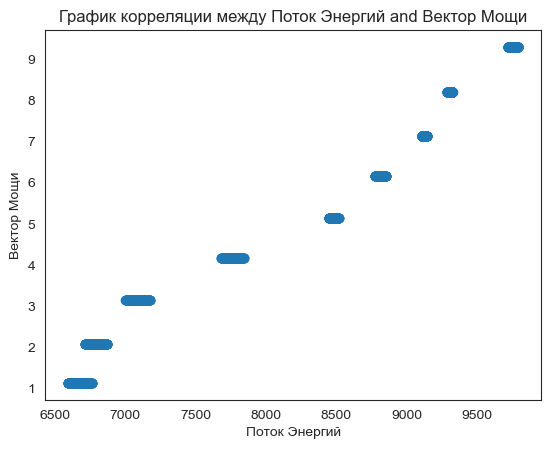

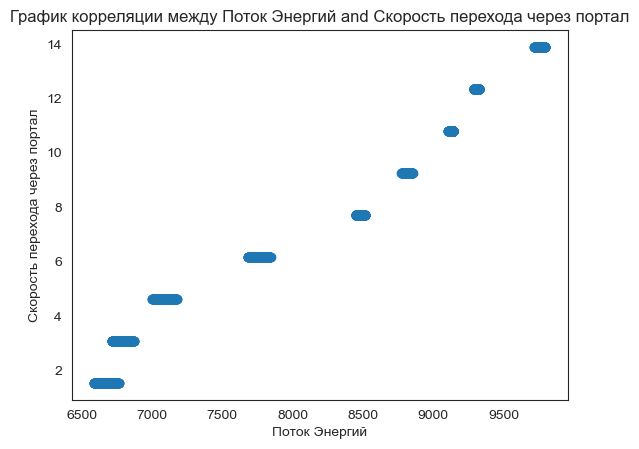

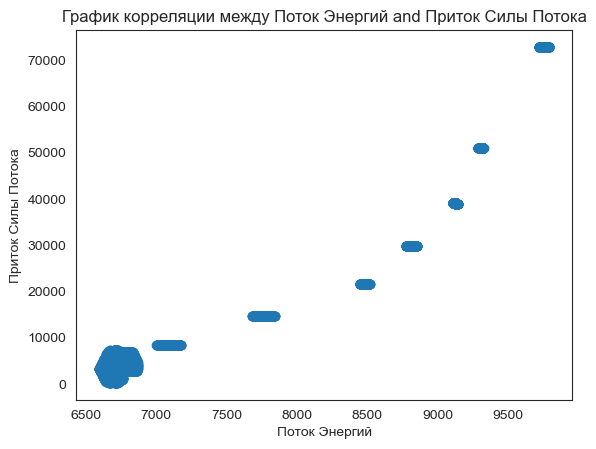

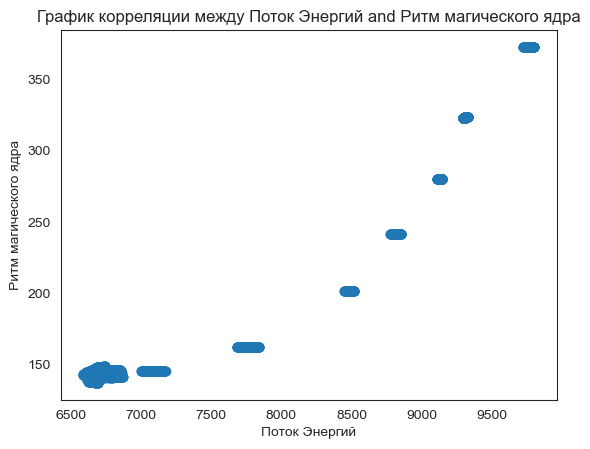

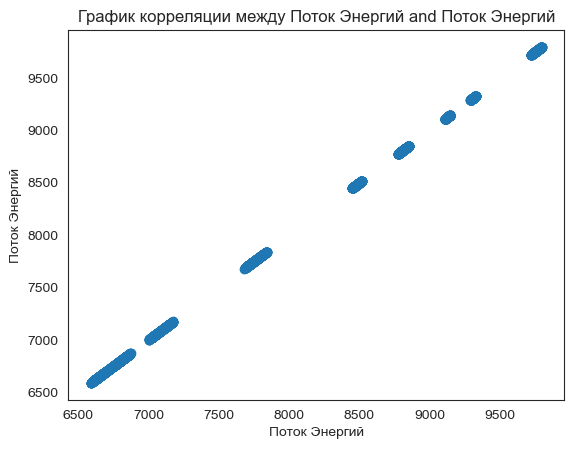

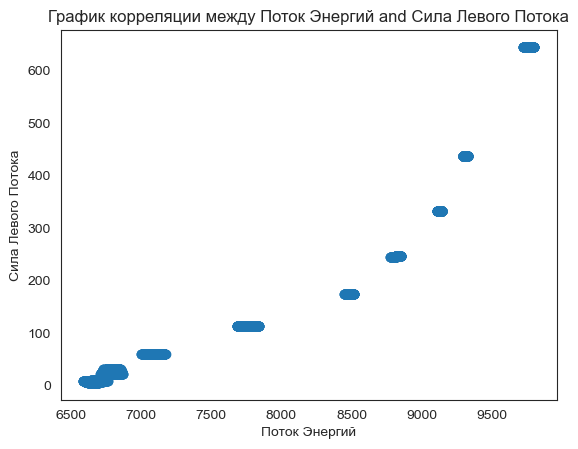

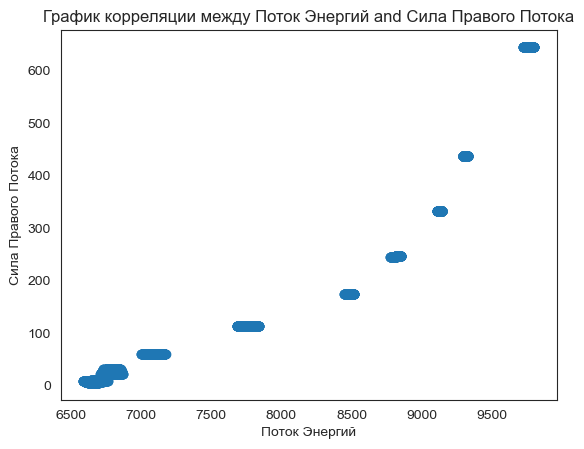

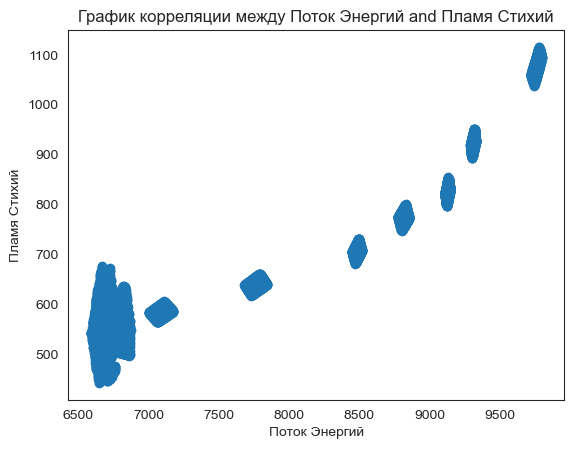

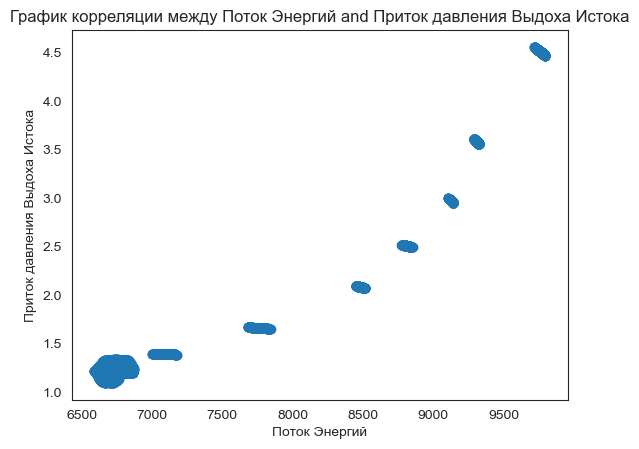

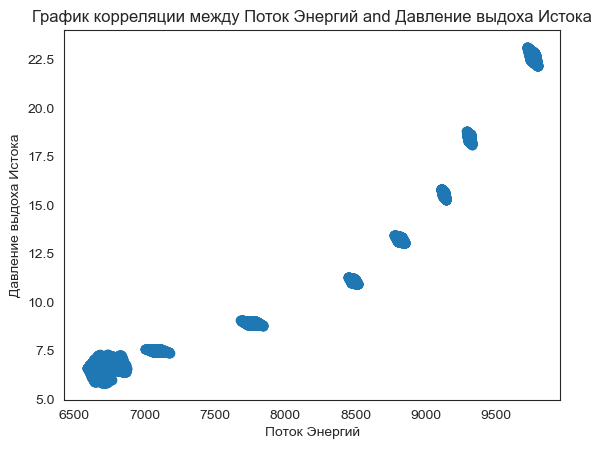

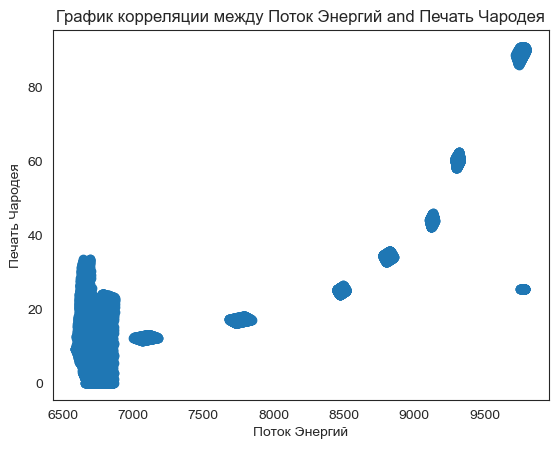

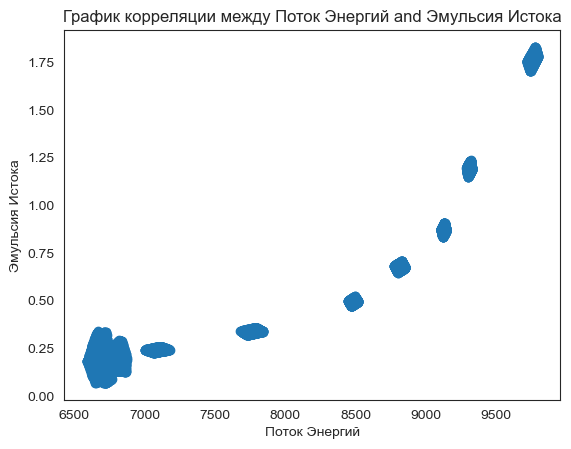

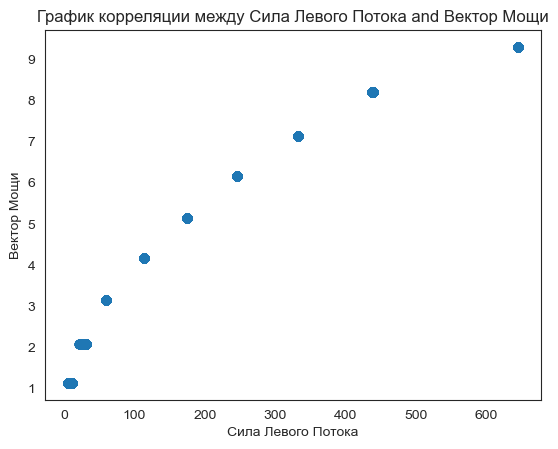

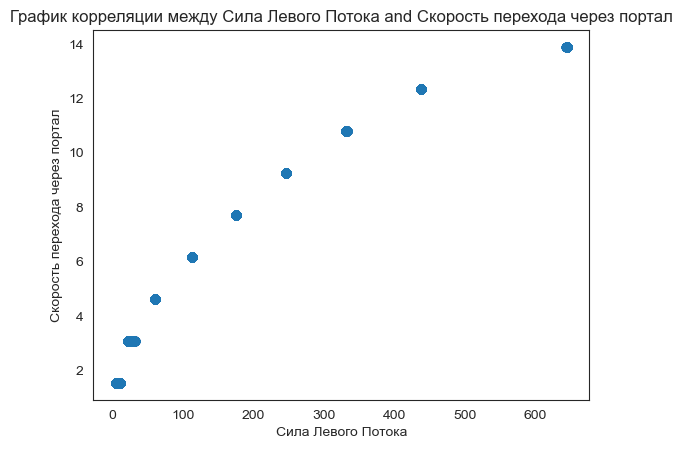

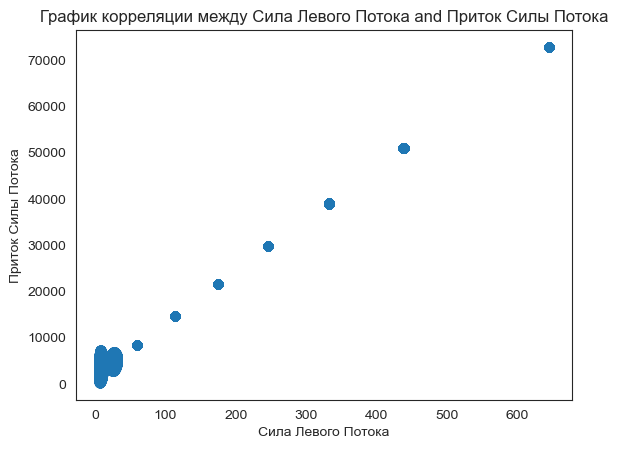

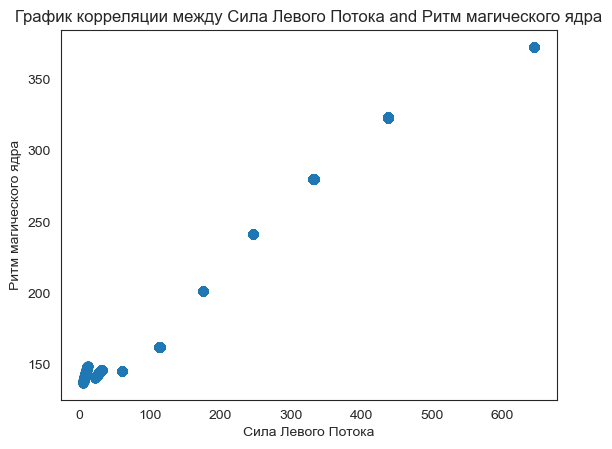

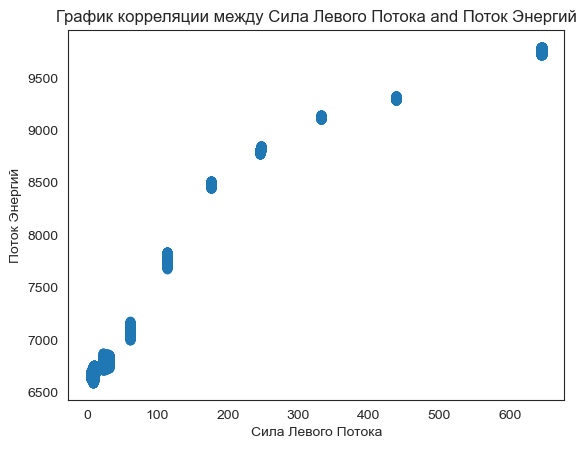

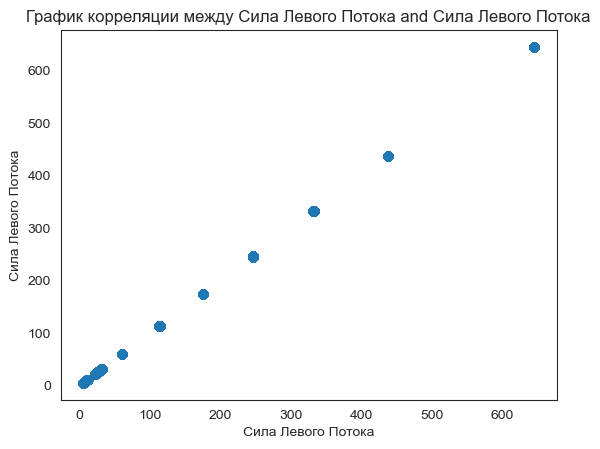

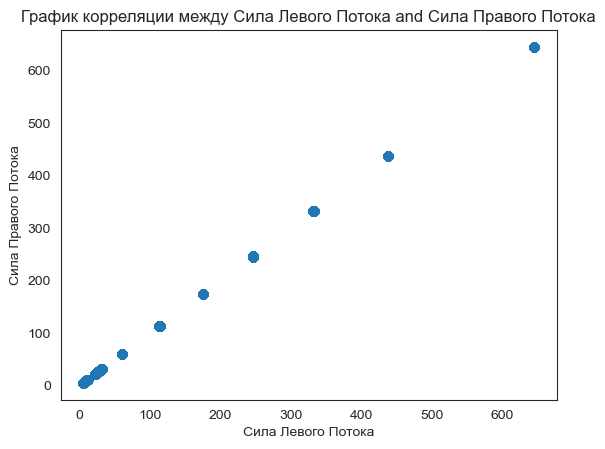

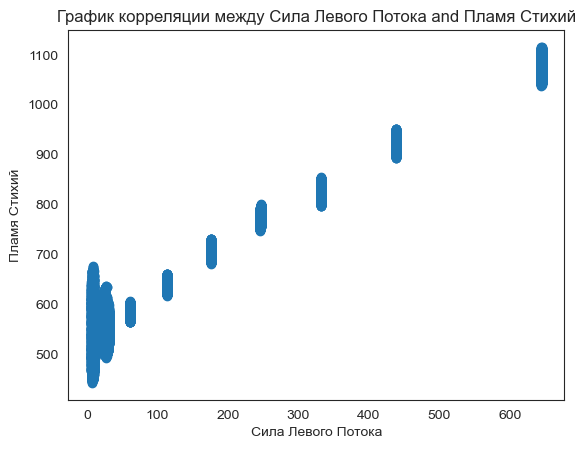

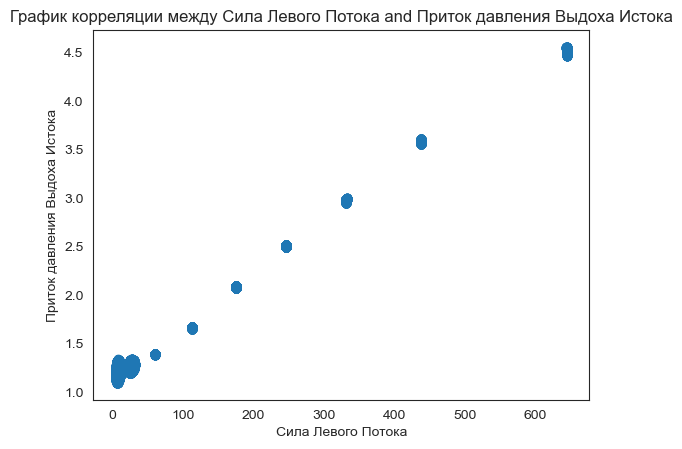

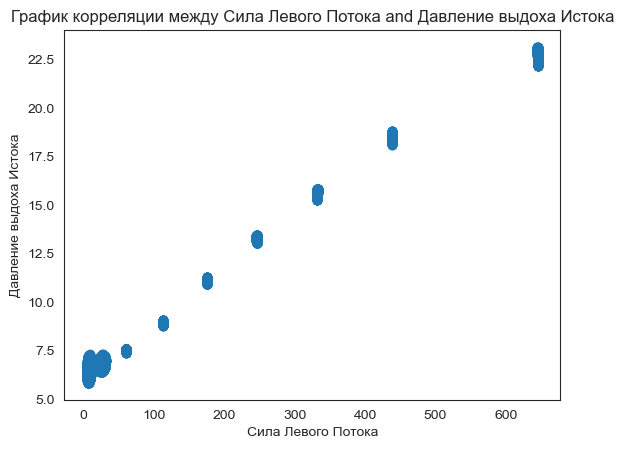

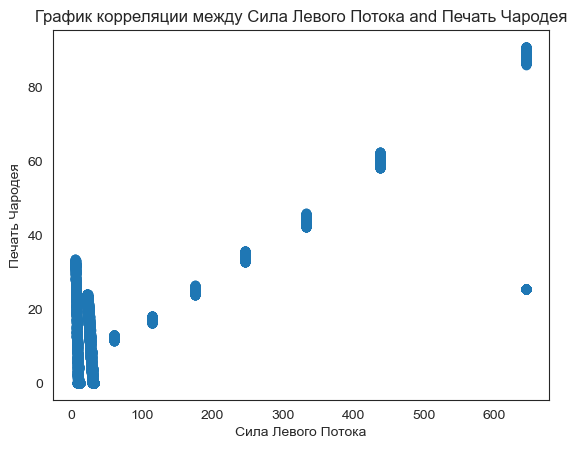

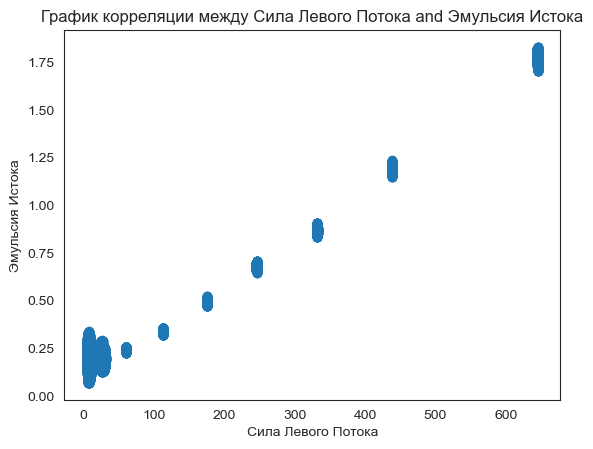

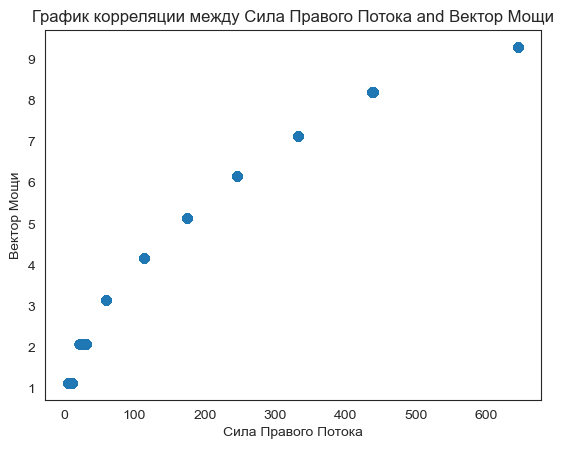

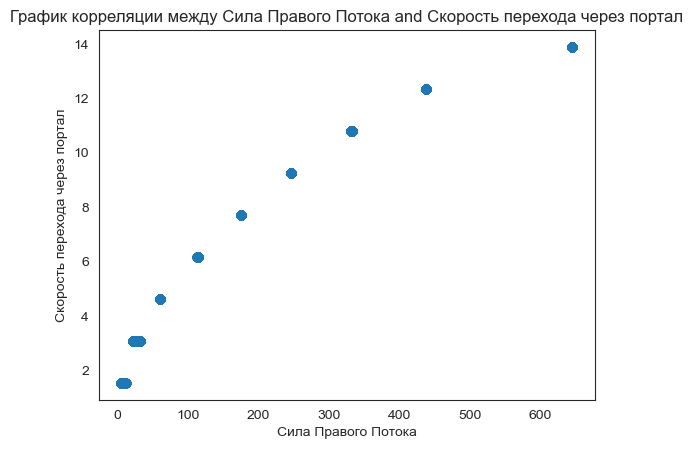

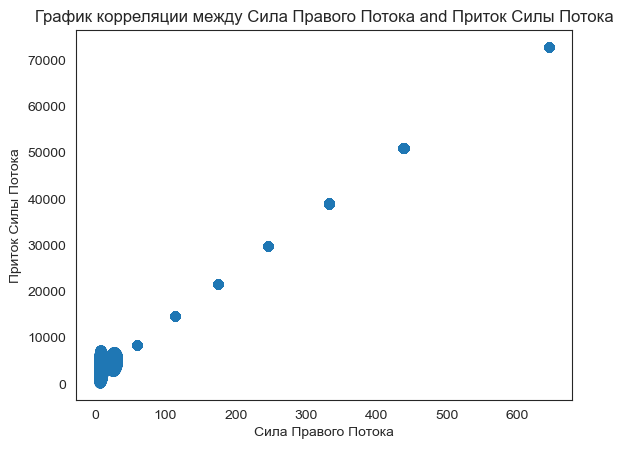

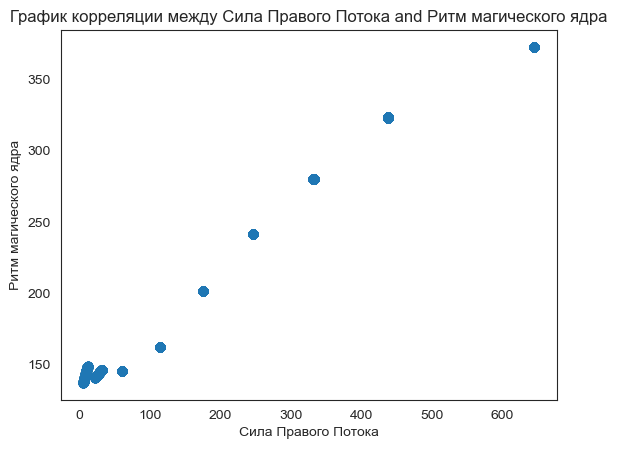

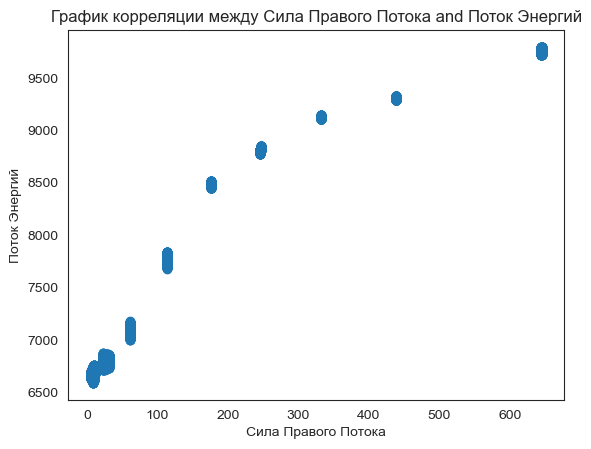

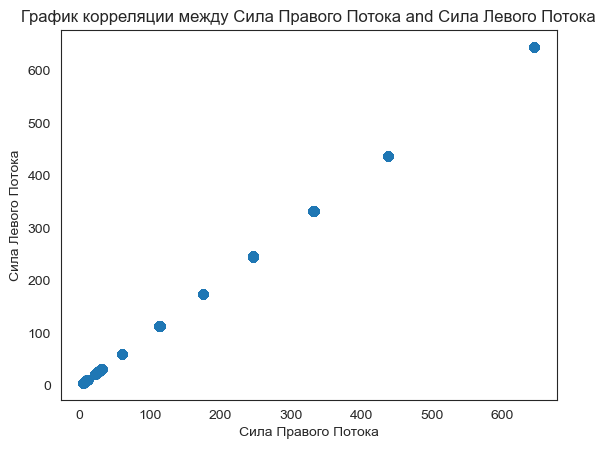

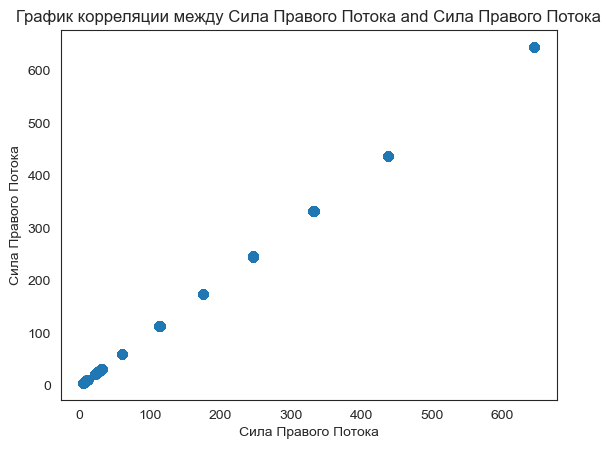

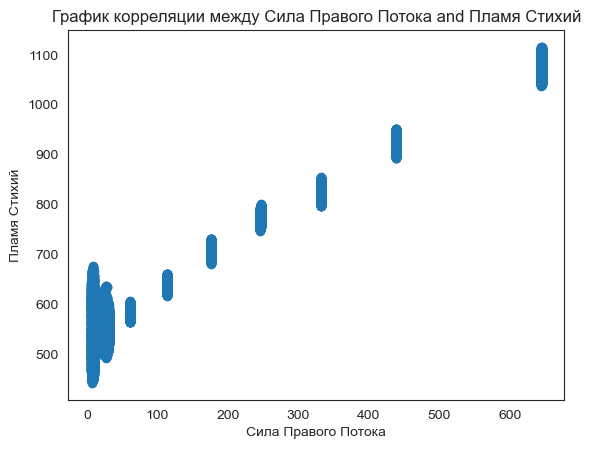

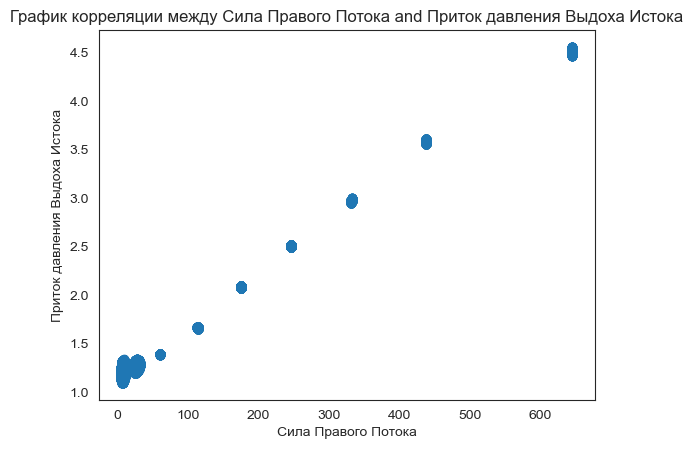

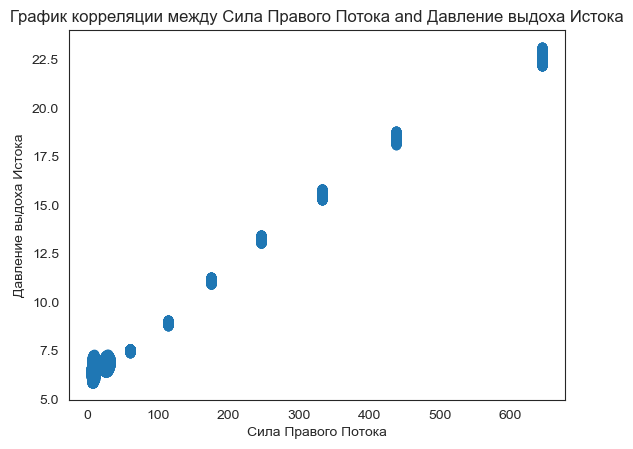

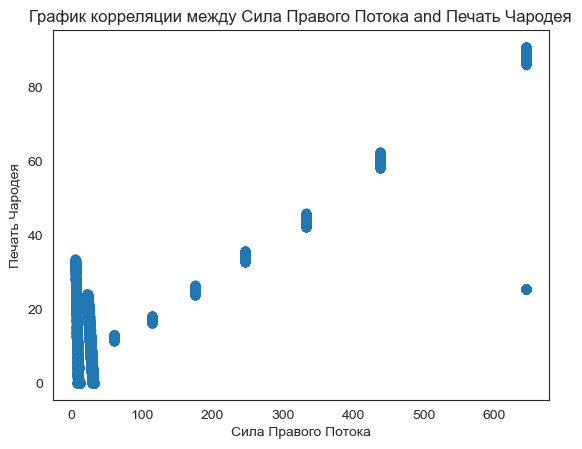

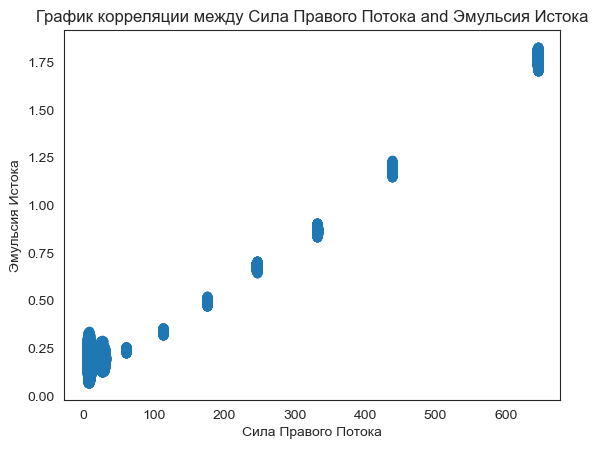

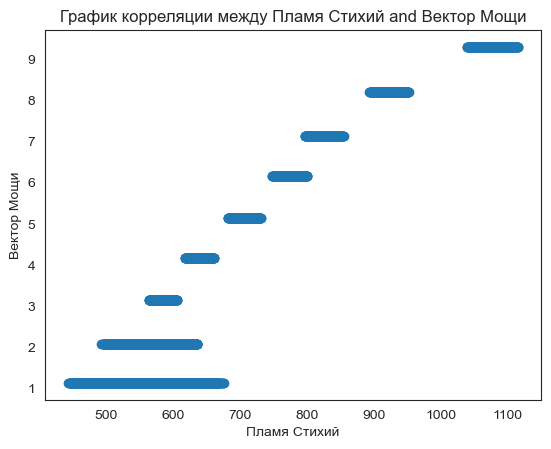

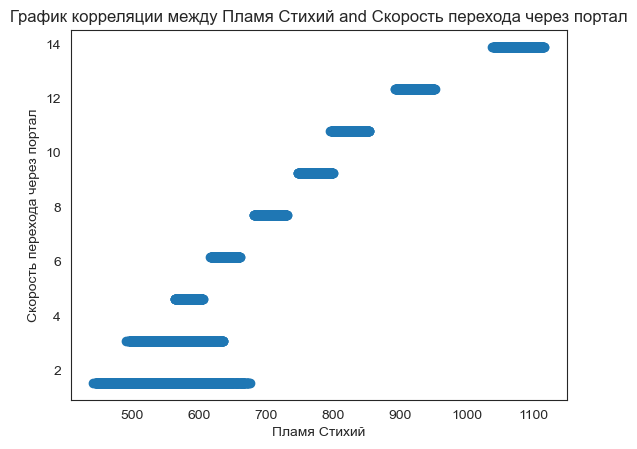

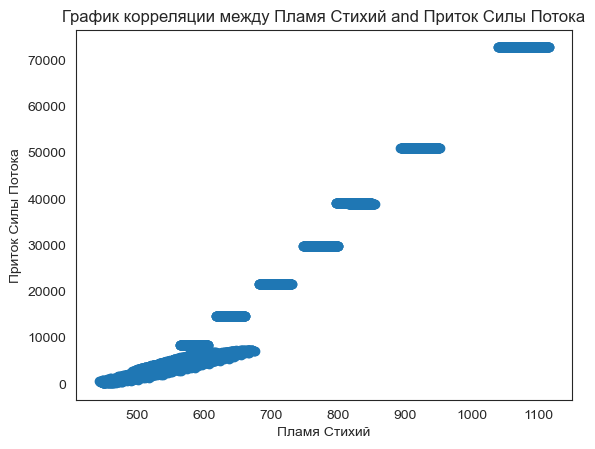

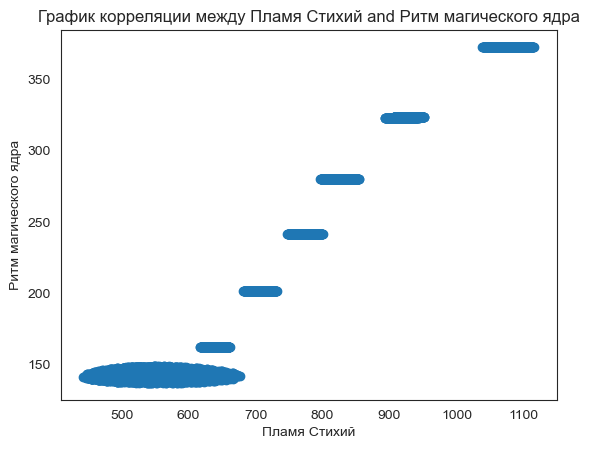

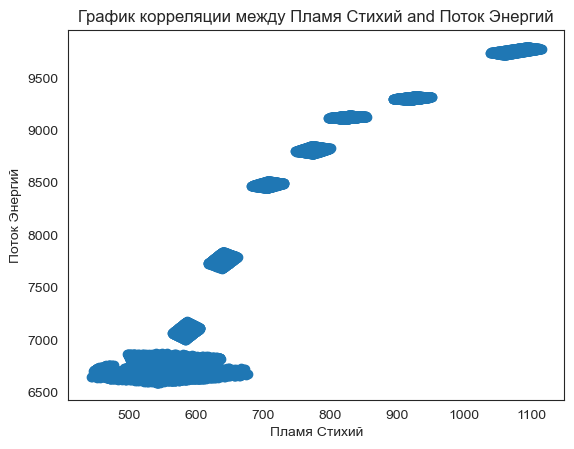

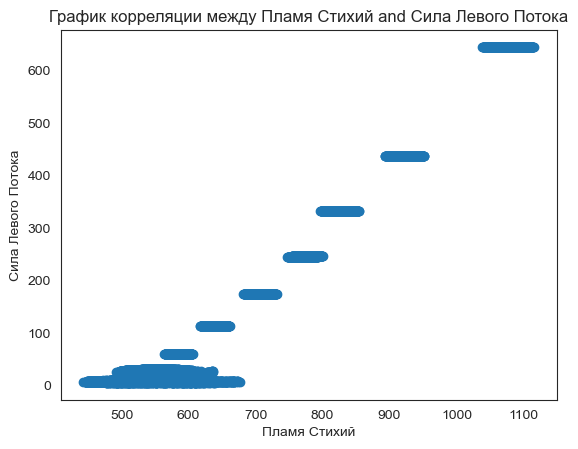

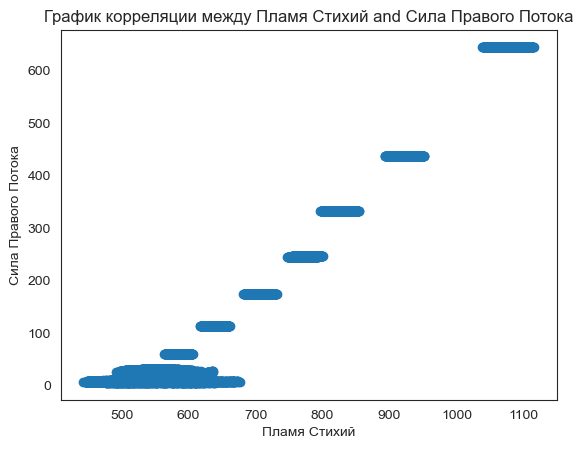

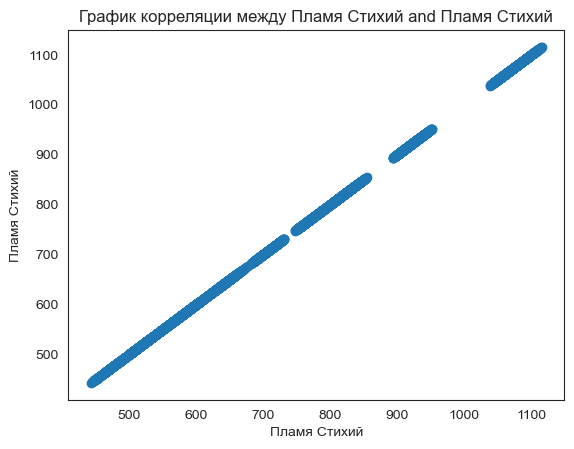

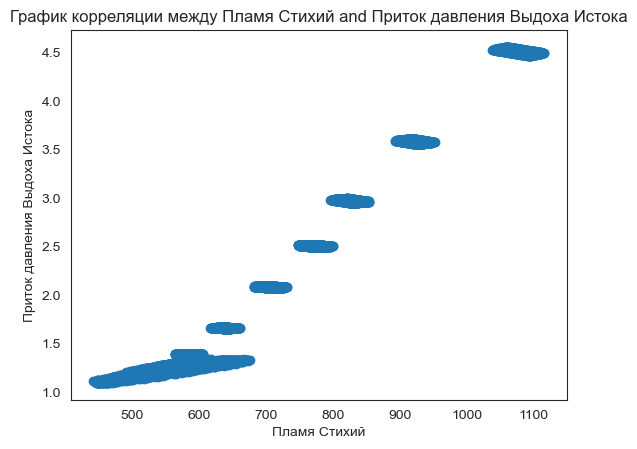

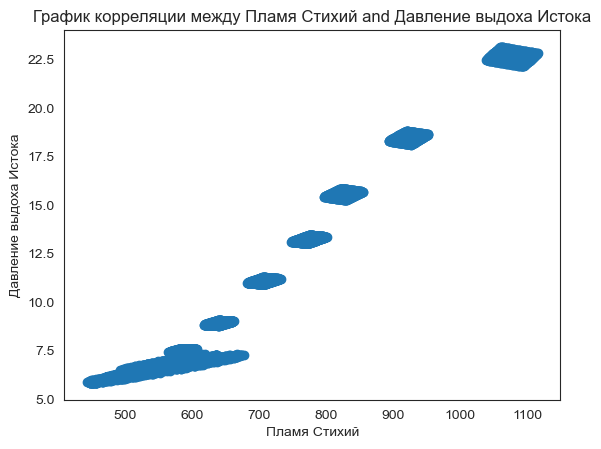

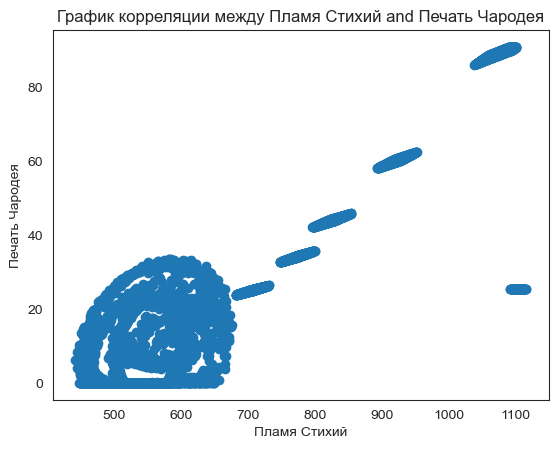

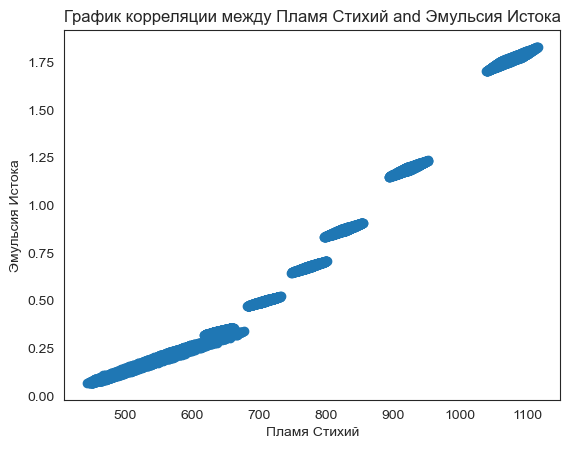

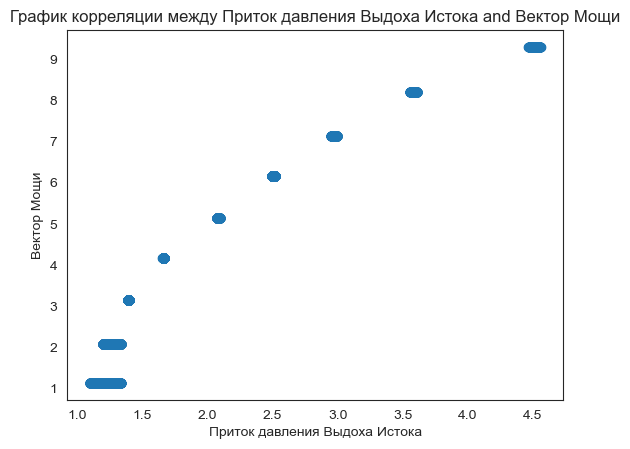

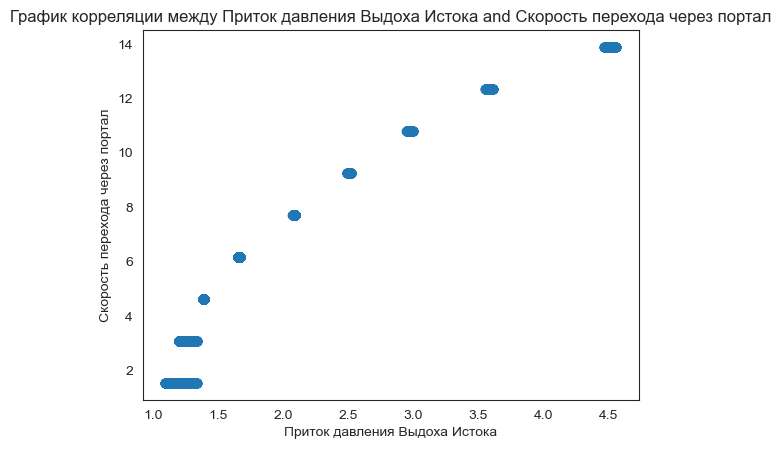

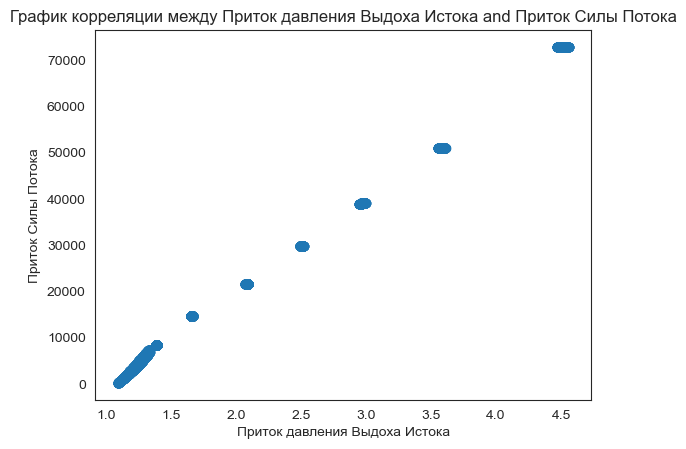

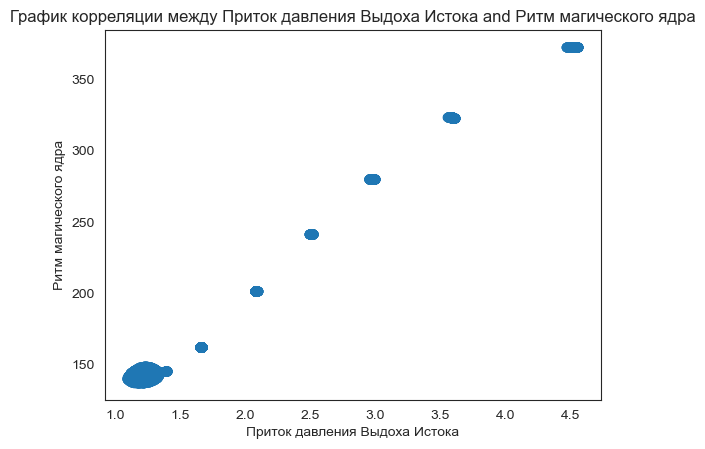

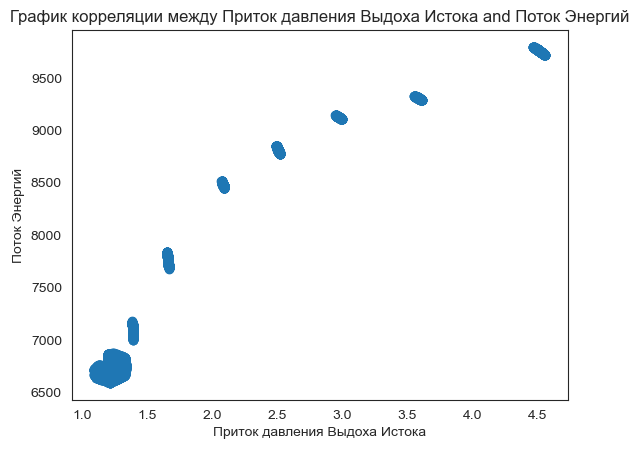

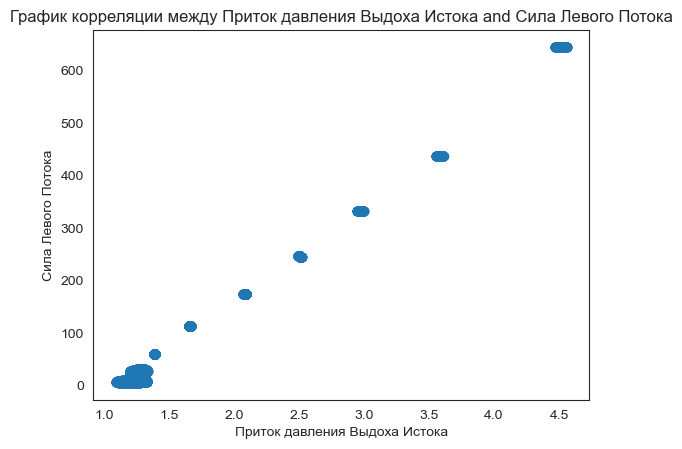

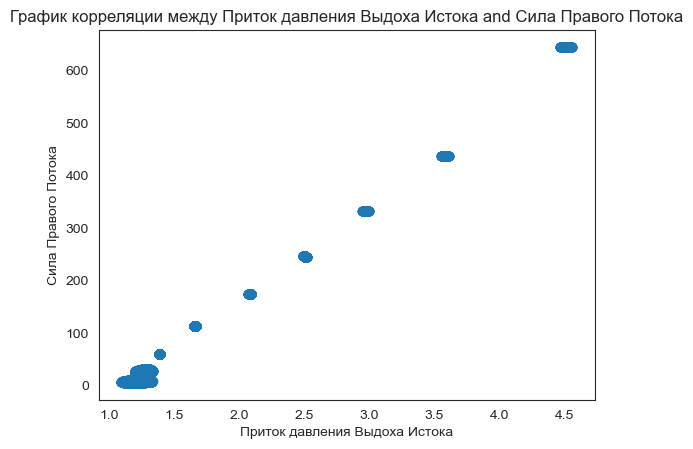

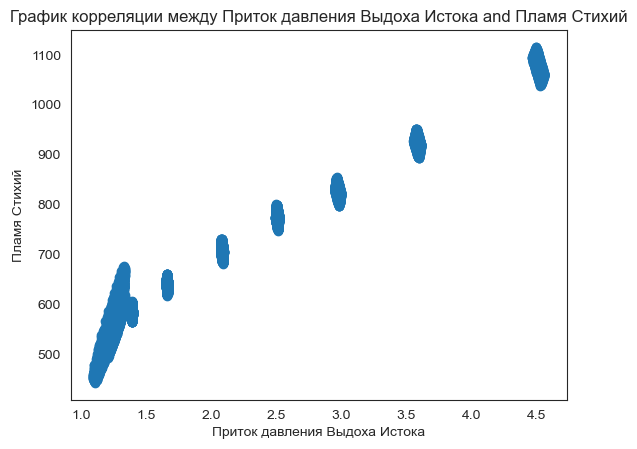

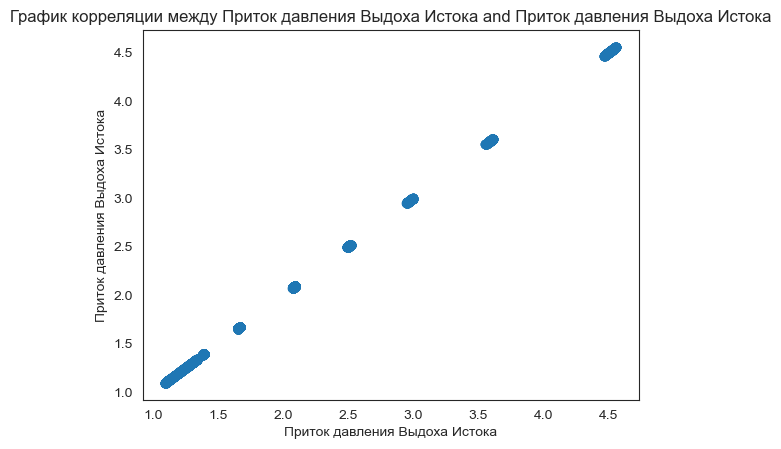

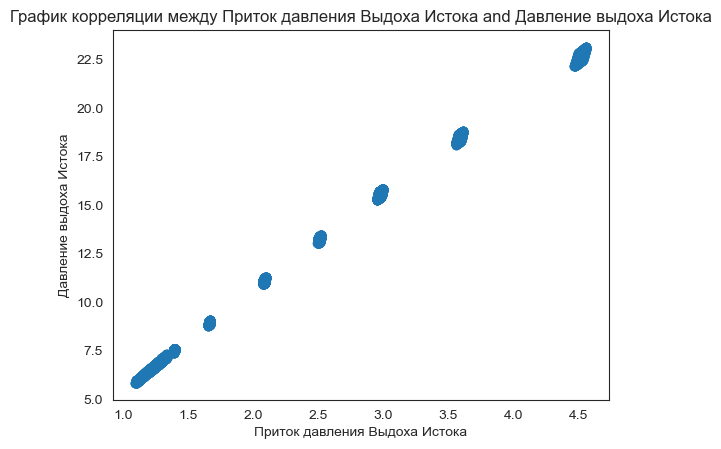

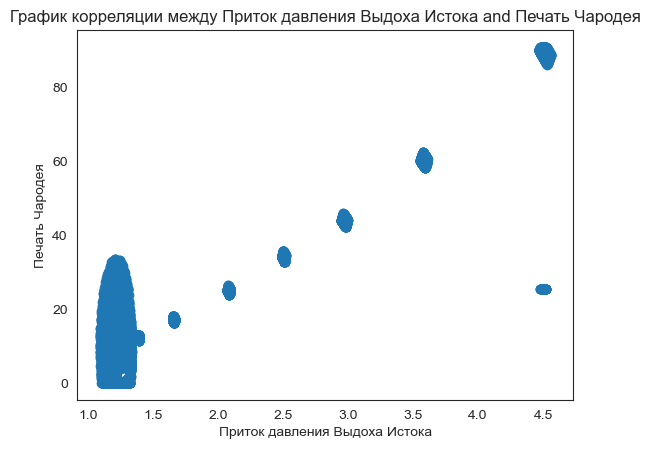

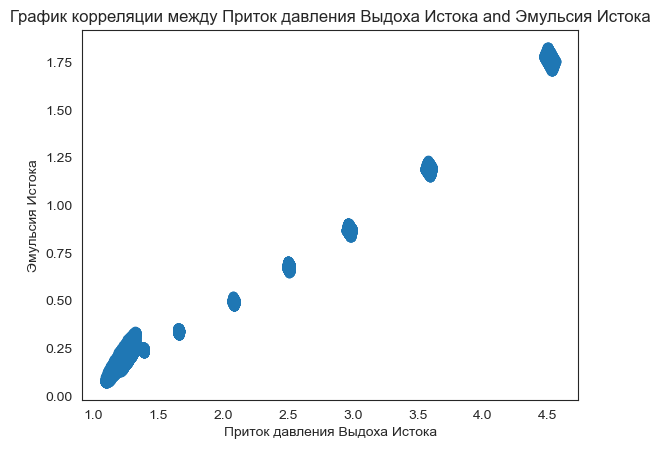

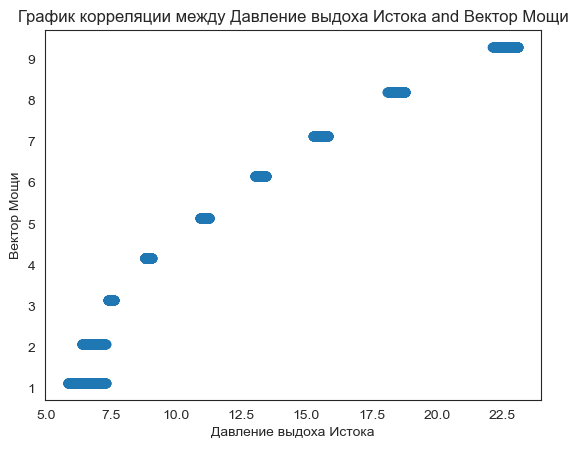

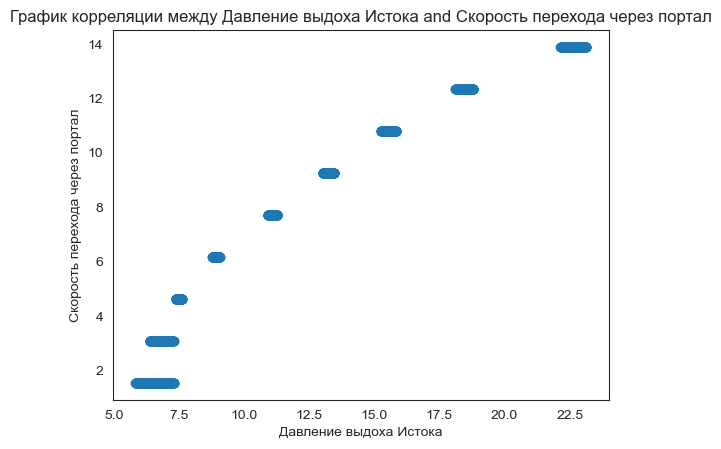

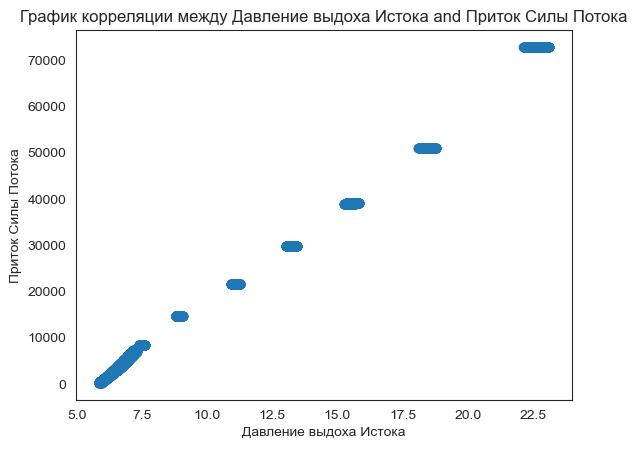

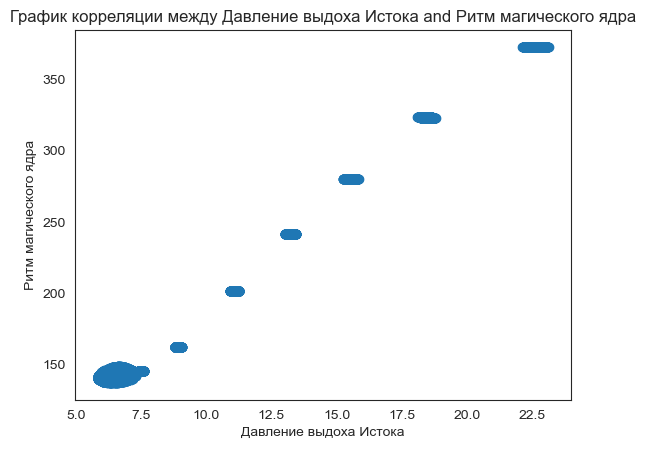

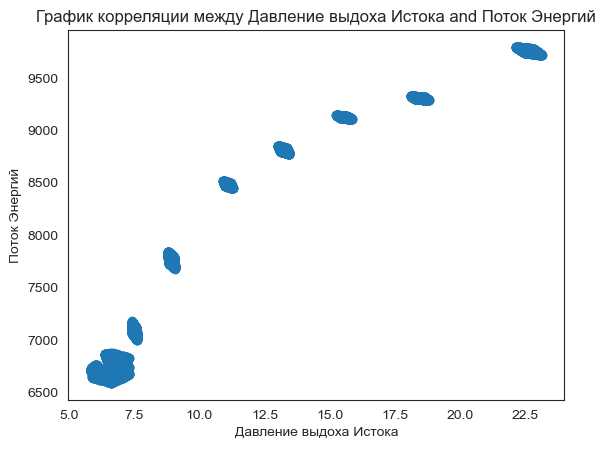

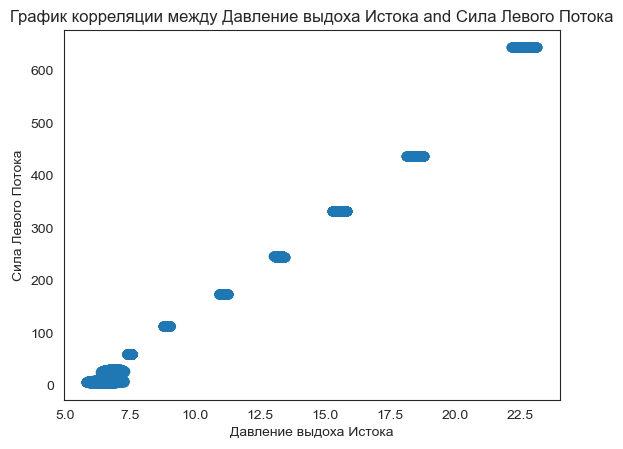

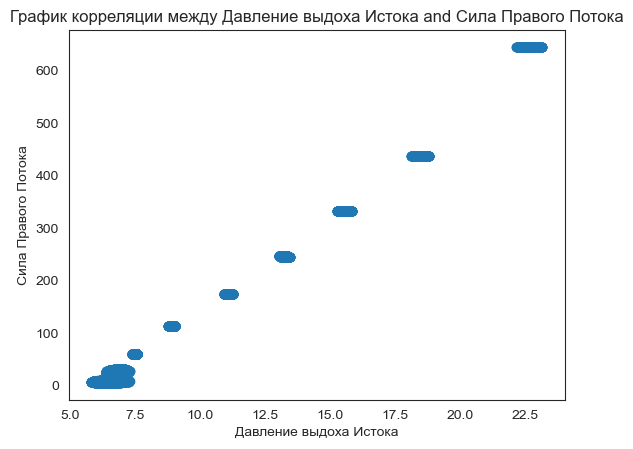

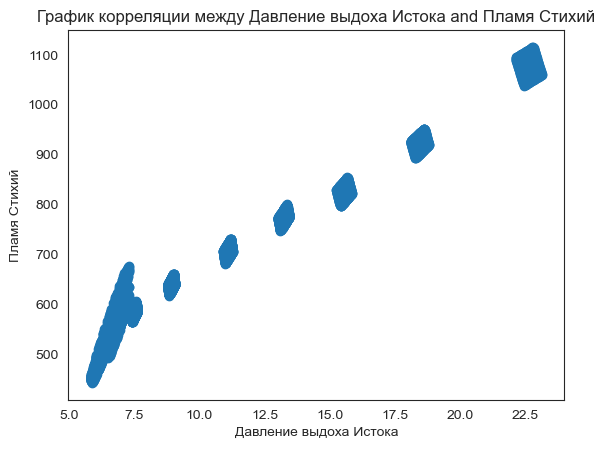

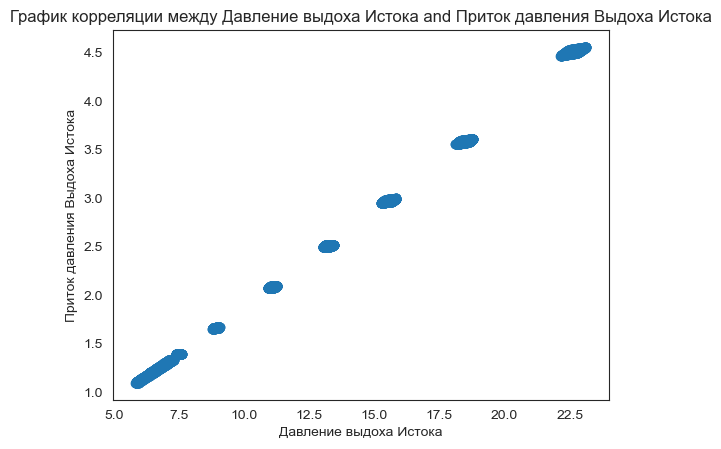

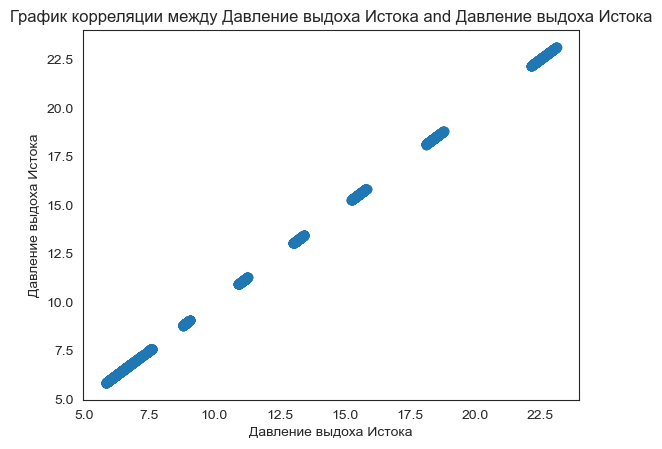

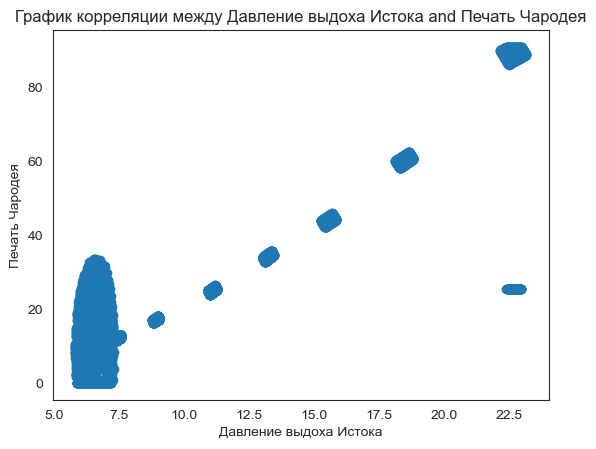

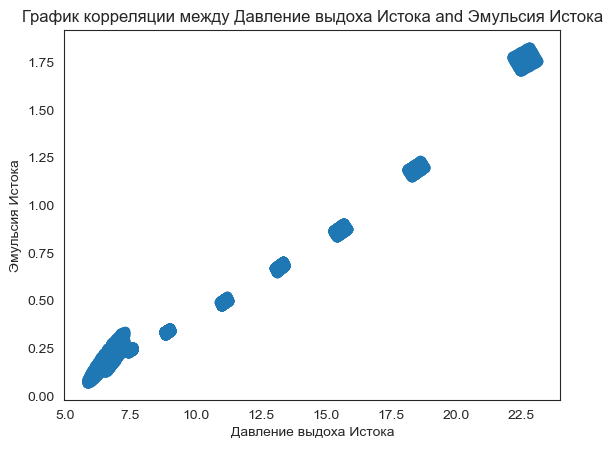

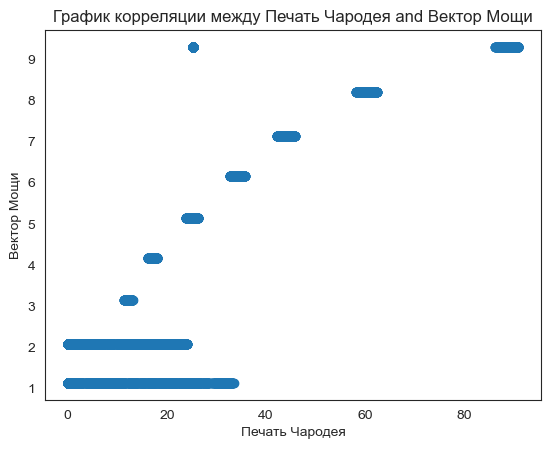

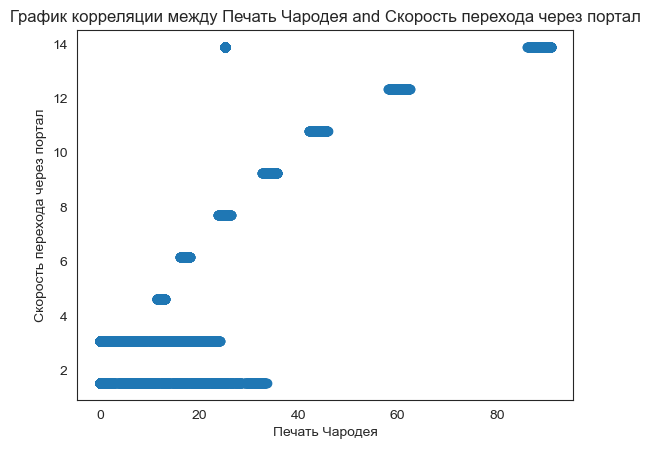

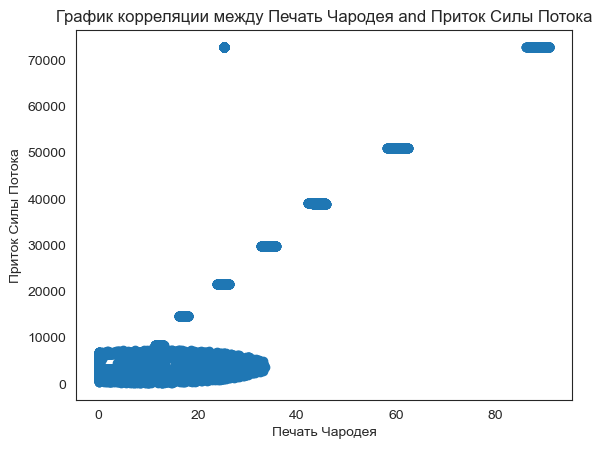

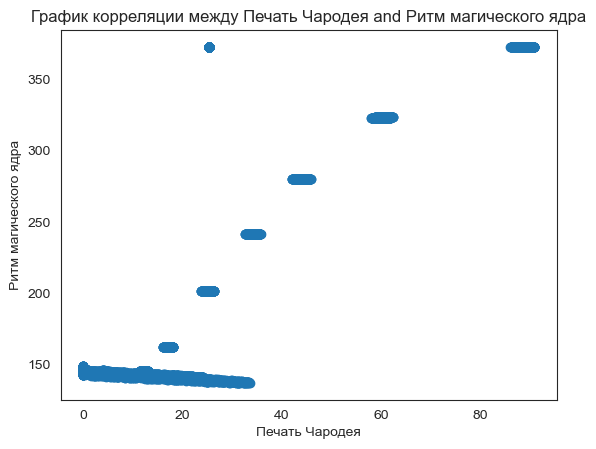

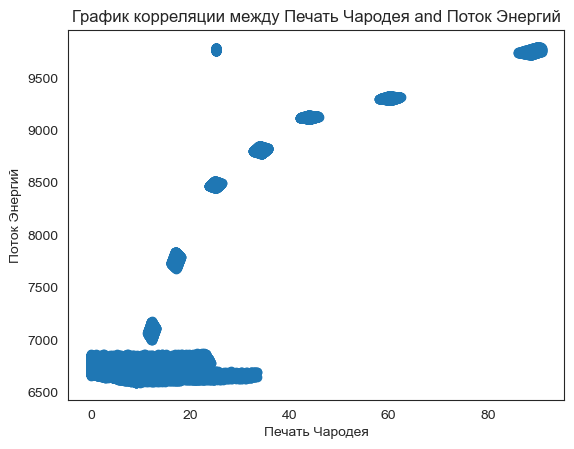

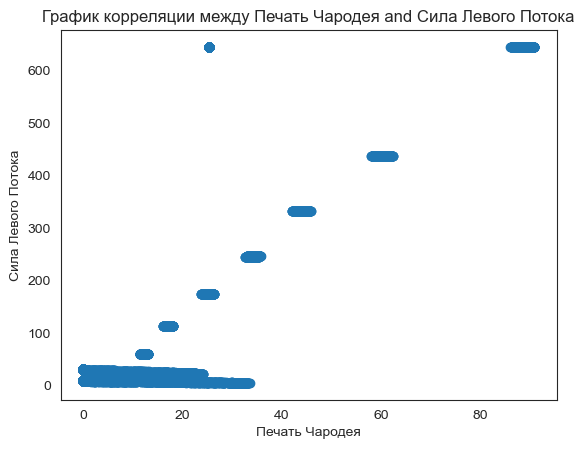

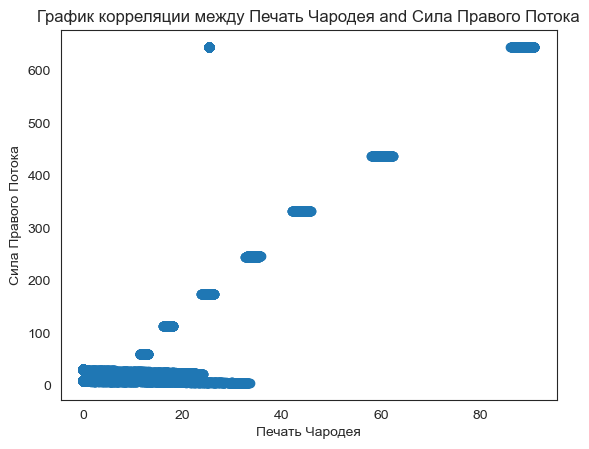

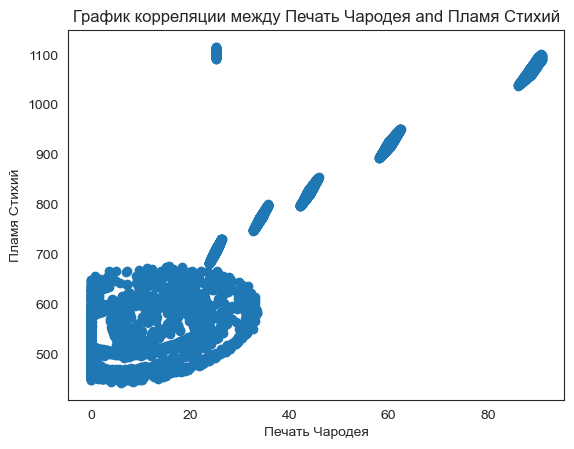

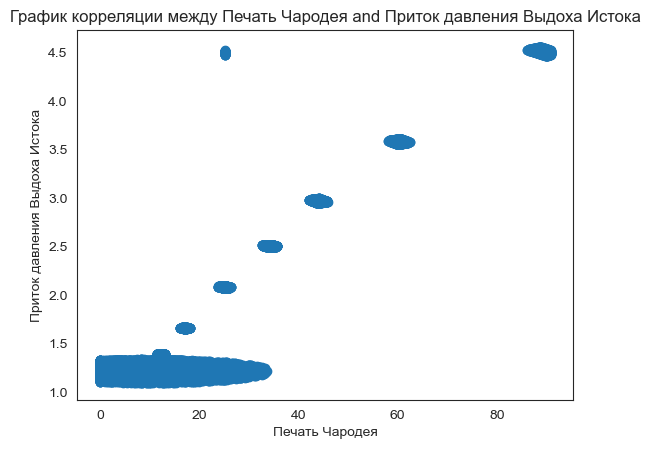

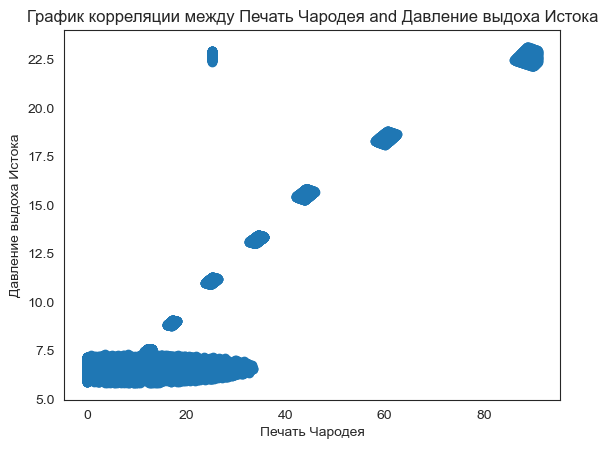

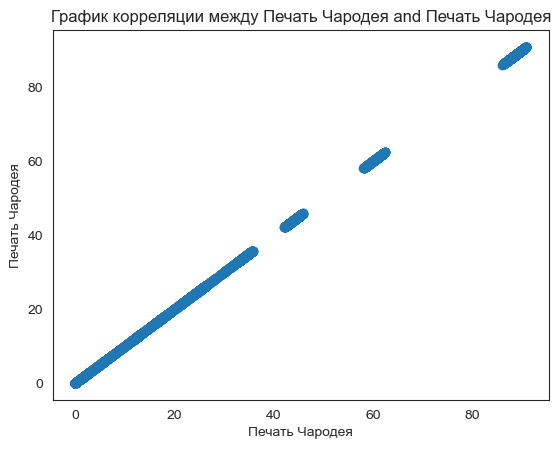

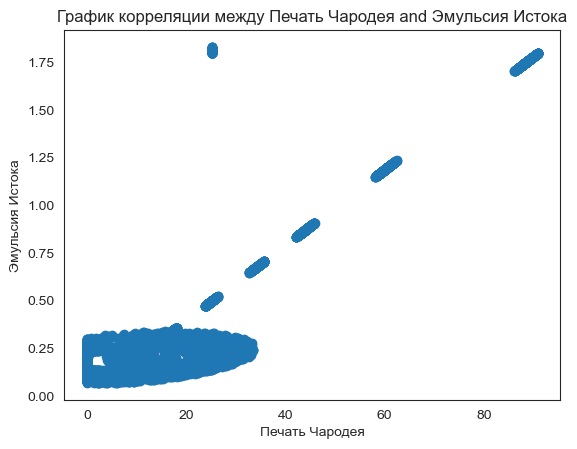

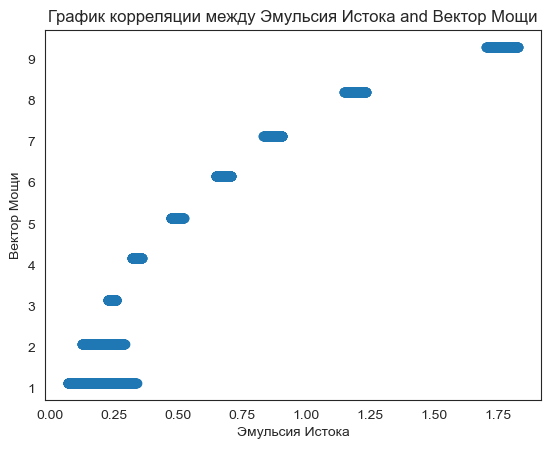

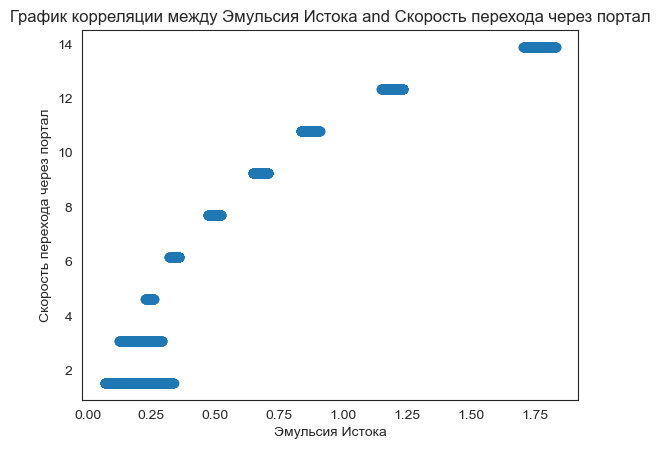

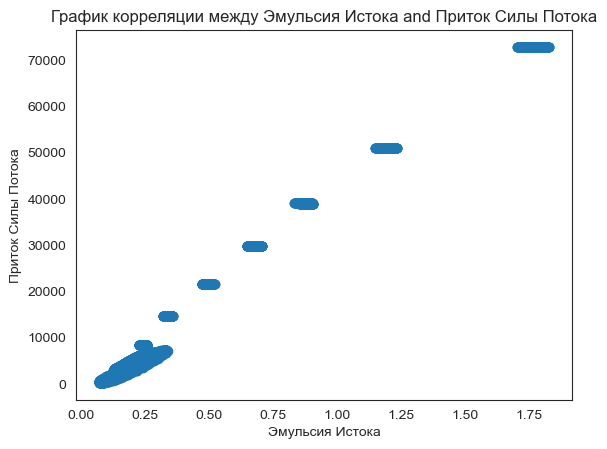

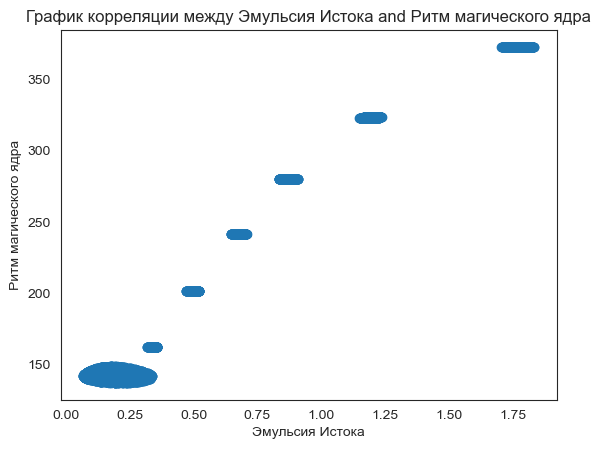

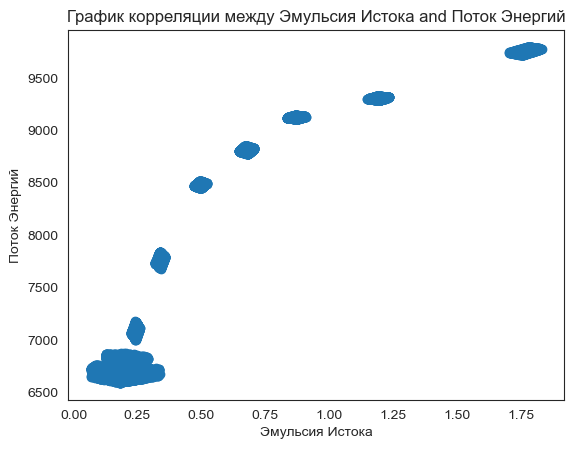

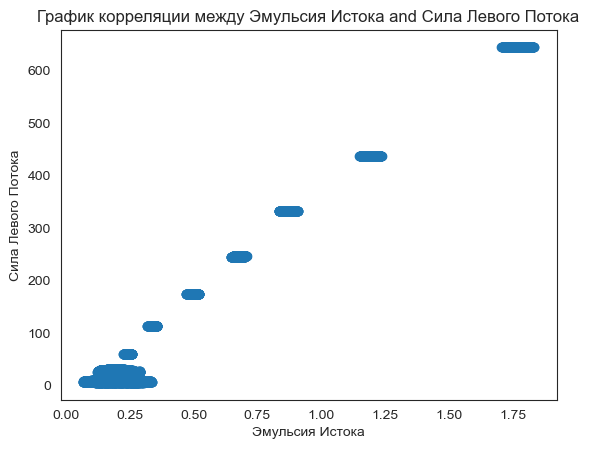

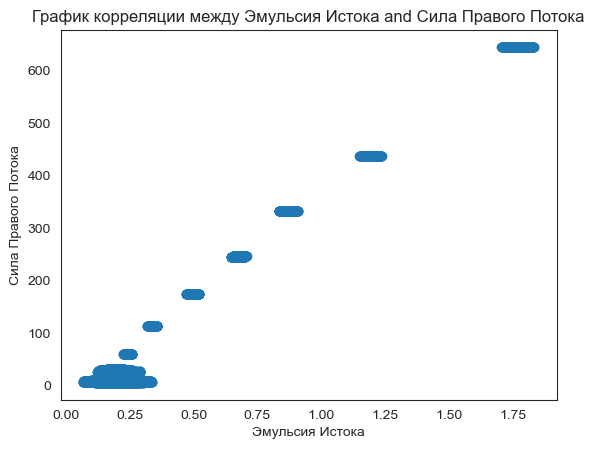

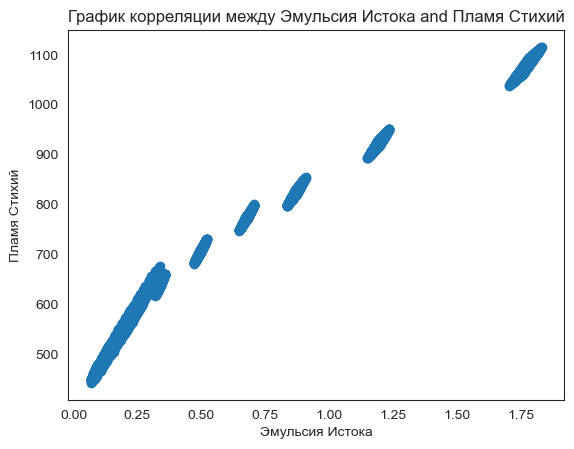

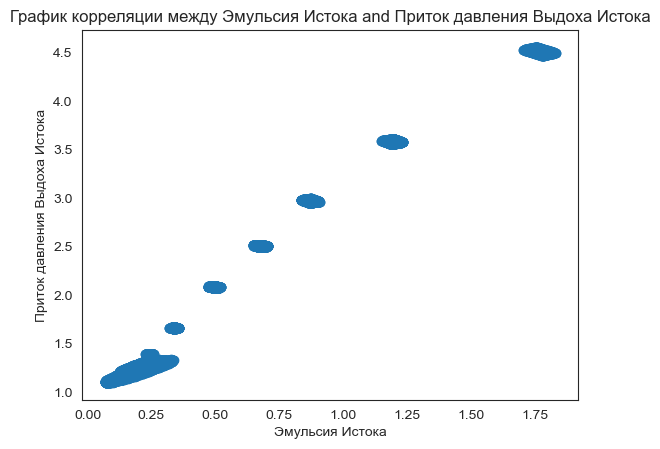

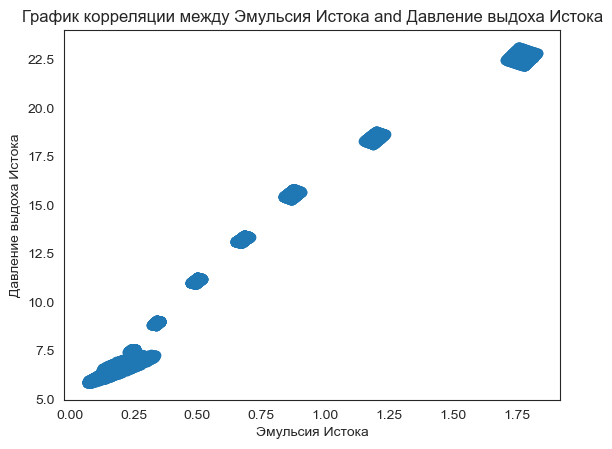

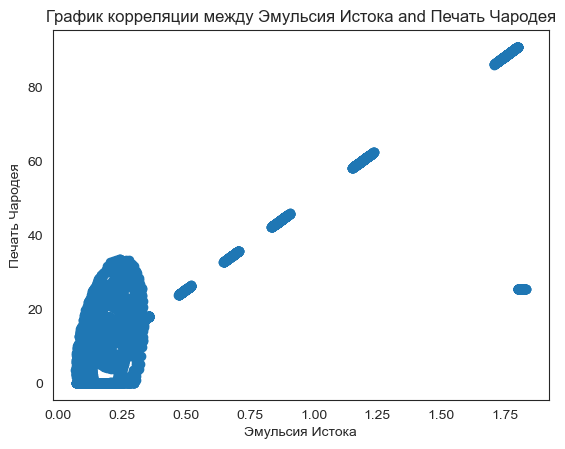

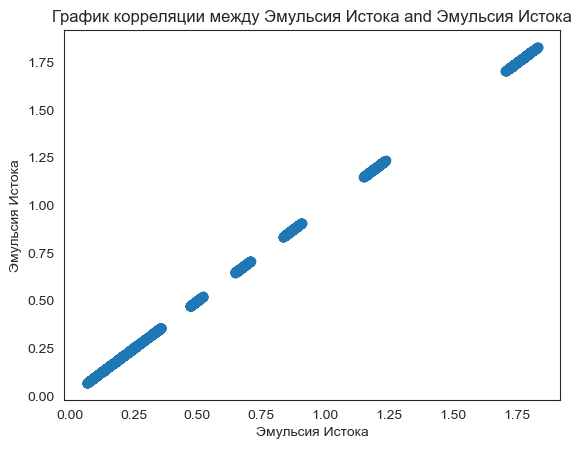

In [17]:
df_for_corr = df.drop(columns=["Температура вдоха Истока", "Давление вдоха Истока", "Гармония Бессмертия", "Дыхание Истока"])
plt.figure(figsize=(7, 7))
sns.set_style("white")
for i in df_for_corr.columns:
    for j in df_for_corr.columns:
        plt.scatter(df[i], df[j])

        plt.title(f"График корреляции между {i} and {j}")
        plt.xlabel(i)
        plt.ylabel(j)
        plt.show()

Построили графики зависимостей между признаками и выяснили, что все признаки имеют линейную зависимость

In [18]:
#feature engineering
#Найдём общую силу потока
df["Общая Сила Потока"] = df["Сила Левого Потока"] + df["Сила Правого Потока"] + df["Приток Силы Потока"]

#Найдём общую силу ядра
df["Общая сила ядра"] = df["Ритм магического ядра"] * df["Приток Силы Потока"]

#Найдём общее давление на выходе
df["Общее давление на выходе"] = df["Давление выдоха Истока"] + df["Приток давления Выдоха Истока"]

#Найдём магическую производительность
df["Магическая производительность"] = df["Скорость перехода через портал"] / df["Эмульсия Истока"]

#Найдём эффективность ядра
df["Эффективность ядра"] = df["Общая сила ядра"] / df["Эмульсия Истока"]

#Найдём магическую мощность
df["Магическая мощность"] = df["Эмульсия Истока"] * (abs(df["Пламя Стихий"] - df["Температура вдоха Истока"])) * df["Ритм магического ядра"]

#Найдём степень ихноса магических источников
df["Степень износа магических источников"] = df["Дыхание Истока"] / df["Гармония Бессмертия"]

#Найдём расхождение в стабильности магии
df["Расхождение в стабильности магии"] = df["Дыхание Истока"] - df["Гармония Бессмертия"]

#Найдём баланс угасания
df["Баланс угасания"] =  (df["Дыхание Истока"] - df["Гармония Бессмертия"]) / df["Скорость перехода через портал"]


In [19]:
df2 = df.drop(columns=["Сила Левого Потока", "Сила Правого Потока", "Приток Силы Потока", "Ритм магического ядра", "Давление выдоха Истока",
                      "Приток давления Выдоха Истока", "Скорость перехода через портал", "Эмульсия Истока", "Пламя Стихий","Температура вдоха Истока",
                       "Дыхание Истока", 
                      ])
df2

Вектор Мощи  Поток Энергий  Давление вдоха Истока  Печать Чародея  \
0            1.138       6677.380               1.394603           7.137   
1            2.088       6828.469               1.394603          10.655   
2            3.144       7111.811               1.394603          13.086   
3            4.161       7792.630               1.394603          18.109   
4            5.140       8494.777               1.394603          26.373   
...            ...            ...                    ...             ...   
11929        5.140       8470.013               1.394603          23.803   
11930        6.175       8800.352               1.394603          32.671   
11931        7.148       9120.889               1.394603          42.104   
11932        8.206       9300.274               1.394603          58.064   
11933        9.300       9742.950               1.394603          86.067   

       Гармония Бессмертия  Общая Сила Потока  Общая сила ядра  \
0                    0.975            305.132     4.097718e+04   
1                    0.975           7016.588     1.003044e+06   
2                    0.975           8499.945     1.216839e+06   
3                    0.975          14951.943     2.386091e+06   
4                    0.975          21987.044     4.360035e+06   
...                    ...                ...              ...   
11929                1.000          21975.412     4.357784e+06   
11930                1.000          30255.121     7.189654e+06   
11931                1.000          39668.645     1.093844e+07   
11932                1.000          51868.627     1.648668e+07   
11933                1.000          74064.890     2.713379e+07   

       Общее давление на выходе  Магическая производительность  \
0                         7.043                      18.820976   
1                         8.613                      10.754843   
2                         8.963                      17.876293   
3                        10.665                      17.243799   
4                        13.275                      14.782759   
...                         ...                            ...   
11929                    13.077                      16.383439   
11930                    15.621                      14.312087   
11931                    18.402                      12.953525   
11932                    21.887                      10.745483   
11933                    26.995                       8.151338   

       Эффективность ядра  Магическая мощность  \
0            4.997217e+05          3151.890659   
1            3.494926e+06          4160.782385   
2            4.698219e+06          4889.510911   
3            6.665057e+06          4323.722112   
4            8.352557e+06           473.986554   
...                   ...                  ...   
11929        9.252195e+06          5157.834490   
11930        1.111229e+07          1782.492767   
11931        1.311563e+07         14140.353507   
11932        1.434872e+07         58303.390850   
11933        1.592358e+07        192129.735583   

       Степень износа магических источников  Расхождение в стабильности магии  \
0                                  0.974359                            -0.025   
1                                  0.974359                            -0.025   
2                                  0.974359                            -0.025   
3                                  0.974359                            -0.025   
4                                  0.974359                            -0.025   
...                                     ...                               ...   
11929                              1.000000                             0.000   
11930                              1.000000                             0.000   
11931                              1.000000                             0.000   
11932                              1.000000                             0.000   
11933           

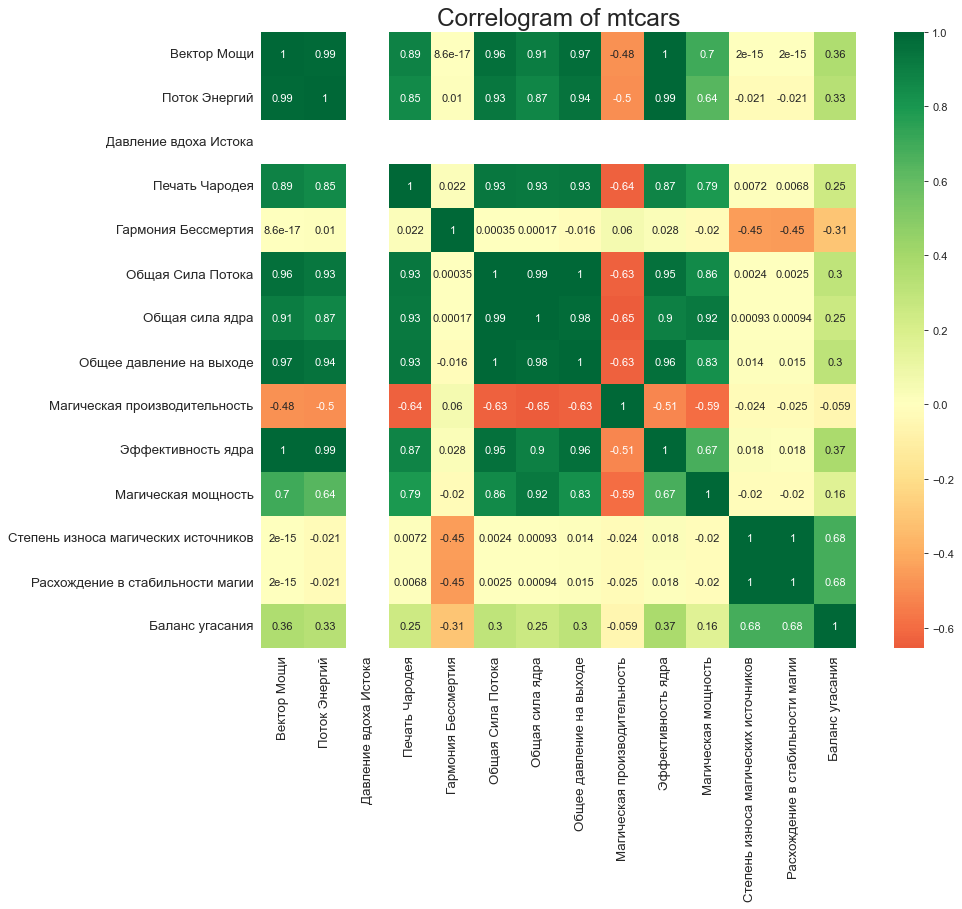

In [20]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df2.corr(), xticklabels=df2.corr().columns, yticklabels=df2.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [23]:
df2_target = df2["Гармония Бессмертия"].copy()
df2.drop(columns=["Гармония Бессмертия"], inplace=True)

In [24]:
#Нормализация данных
norm = MinMaxScaler()
data_norm = norm.fit_transform(df2)
df2[norm.get_feature_names_out()] = data_norm

In [25]:
df2

Вектор Мощи  Поток Энергий  Давление вдоха Истока  Печать Чародея  \
0         0.000000       0.027548                    0.0        0.078546   
1         0.116393       0.074644                    0.0        0.117263   
2         0.245773       0.162965                    0.0        0.144017   
3         0.370375       0.375184                    0.0        0.199298   
4         0.490321       0.594051                    0.0        0.290247   
...            ...            ...                    ...             ...   
11929     0.490321       0.586332                    0.0        0.261963   
11930     0.617128       0.689302                    0.0        0.359559   
11931     0.736339       0.789217                    0.0        0.463374   
11932     0.865964       0.845133                    0.0        0.639021   
11933     1.000000       0.983120                    0.0        0.947207   

       Общая Сила Потока  Общая сила ядра  Общее давление на выходе  \
0               0.000509         0.000200                  0.005728   
1               0.091441         0.035694                  0.081296   
2               0.111538         0.043582                  0.098142   
3               0.198955         0.086721                  0.180064   
4               0.294271         0.159548                  0.305689   
...                  ...              ...                       ...   
11929           0.294114         0.159465                  0.296159   
11930           0.406293         0.263945                  0.418608   
11931           0.533834         0.402254                  0.552464   
11932           0.699128         0.606953                  0.720206   
11933           0.999859         0.999770                  0.966067   

       Магическая производительность  Эффективность ядра  Магическая мощность  \
0                           0.694394            0.004025             0.010342   
1                           0.301472            0.197436             0.014238   
2                           0.648376            0.275137             0.017052   
3                           0.617566            0.402143             0.014867   
4                           0.497682            0.511111             0.000000   
...                              ...                 ...                  ...   
11929                       0.575656            0.569204             0.018088   
11930                       0.474755            0.689317             0.005053   
11931                       0.408576            0.818680             0.052777   
11932                       0.301017            0.898305             0.223326   
11933                       0.174649            1.000000             0.740137   

       Степень износа магических источников  Расхождение в стабильности магии  \
0                                  0.322034                          0.333333   
1                                  0.322034                          0.333333   
2                                  0.322034                          0.333333   
3                                  0.322034                          0.333333   
4                                  0.322034                          0.333333   
...                                     ...                               ...   
11929                              0.661017                          0.666667   
11930                              0.661017                          0.666667   
11931                              0.661017                          0.666667   
11932                              0.661017                          0.666667   
11933                              0.661017                          0.666667   

       Баланс угасания  
0             0.333333  
1             0.500000  
2             0.555556  
3             0.583333  
4             0.600000  
...                ...  
11929         0.666667  
11930         0.666667  
11931         0.666667  
11932         0.666667  
11933         0.6666

In [26]:
#моделинг
x_train, x_test, y_train, y_test = train_test_split(df2, df2_target, random_state = 42, test_size = 0.3)


Начнём обучение моделей. Я выбрал 3 модели: линейную, деревья решений и рандомный лес. Также мной были выбраны метрики: MAE, а не MSE
так как масштаб предсказываемых значений не велик и r2_score так как c коэффициента детерминации можно выяснить как модель объясняет данные.

In [27]:
dec = DecisionTreeRegressor(random_state = 42)

dec.fit(x_train, y_train)

dec_predict_train = dec.predict(x_train)
dec_predict_test = dec.predict(x_test)


In [28]:
dec_mist = mean_absolute_error(y_train, dec_predict_train)
dec_mist = mean_absolute_error(y_test, dec_predict_test)
print('Ошибка:', dec_mist)


Ошибка: 0.0005302987992181138


In [29]:
#Кросс-валидация деревьев решений для проверки переобучаемости
cross_decision = cross_validate(dec, df2, df2_target, cv = 5, scoring="neg_mean_absolute_error")
print('Кросс-валидация для деревьев решений:',cross_decision)
#Так как test score сильно изменяется в зависимости от фолда, можно сделать вывод, что модель переобучается

Кросс-валидация для деревьев решений: {'fit_time': array([0.11799622, 0.12559986, 0.1190002 , 0.12174129, 0.10999656]), 'score_time': array([0.00299931, 0.00200033, 0.00300145, 0.00300336, 0.00300574]), 'test_score': array([-0.0046548 , -0.0014868 , -0.00174612, -0.00139254, -0.00461819])}


In [30]:
lin = LinearRegression()
lin.fit(x_train, y_train)

lin_predict_train = lin.predict(x_train)
lin_predict_test = lin.predict(x_test)

In [31]:
lin_mist_train = mean_absolute_error(y_train, lin_predict_train)
lin_mist_test = mean_absolute_error(y_test, lin_predict_test)

print("Ошибка на тренировочной выборке для линейной модели:", lin_mist_train)
print('Ошибка на тестовой выборке для линейной модели:', lin_mist_test)

Ошибка на тренировочной выборке для линейной модели: 0.003070335660553758
Ошибка на тестовой выборке для линейной модели: 0.0031232246156719695


In [32]:
#Кросс-валидация линейной модели для проверки переобучаемости
cross_lin = cross_validate(lin, df2, df2_target, cv = 5, scoring="neg_mean_absolute_error")
print('Кросс-валидация для линейной модели:',cross_lin)


Кросс-валидация для линейной модели: {'fit_time': array([0.00999951, 0.00899959, 0.00599384, 0.00757241, 0.006001  ]), 'score_time': array([0.00399542, 0.00300169, 0.00299859, 0.00199795, 0.00300407]), 'test_score': array([-0.00382992, -0.00253487, -0.00265162, -0.00359673, -0.00544552])}


In [33]:
randF = RandomForestRegressor()
randF.fit(x_train, y_train)
randF_p_train = randF.predict(x_train) 
randF_p_test = randF.predict(x_test)

In [34]:
randF_mist_train = mean_absolute_error(y_train, randF_p_train)
randF_mist_test = mean_absolute_error(y_test, randF_p_test)

print("Ошибка на тренировочной выборке:", randF_mist_train)
print('Ошибка на испытательной выборке:', randF_mist_test)

Ошибка на тренировочной выборке: 0.00013153836944808253
Ошибка на испытательной выборке: 0.00031003630270866924


Мы обучили все модели и увидели, что качество метрики MAE лучше у случайного леса, но при этом все модели переобучаются, так как
при перекрёстной проверке значение метрики сильно варьируется, следователь модели нужно регуляризовать.

fit_time  score_time  test_score   train_score
0  0.115994    0.003000   -0.000498 -3.114154e-17
1  0.109614    0.003079   -0.000522 -3.094217e-17
2  0.118000    0.003000   -0.000537 -3.252383e-17
3  0.111579    0.003000   -0.000515 -3.375992e-17
4  0.109000    0.001999   -0.000491 -3.128774e-17
5  0.107686    0.003004   -0.000519 -3.259029e-17
6  0.109995    0.003004   -0.000554 -3.162002e-17
7  0.107996    0.002005   -0.000543 -3.498272e-17
8  0.114650    0.003002   -0.000522 -3.158015e-17
9  0.109994    0.003003   -0.000510 -3.135420e-17

fit_time  score_time  test_score   train_score  test_error   train_error
0  0.115994    0.003000   -0.000498 -3.114154e-17    0.000498  3.114154e-17
1  0.109614    0.003079   -0.000522 -3.094217e-17    0.000522  3.094217e-17
2  0.118000    0.003000   -0.000537 -3.252383e-17    0.000537  3.252383e-17
3  0.111579    0.003000   -0.000515 -3.375992e-17    0.000515  3.375992e-17
4  0.109000    0.001999   -0.000491 -3.128774e-17    0.000491  3.128774e-17
5  0.107686    0.003004   -0.000519 -3.259029e-17    0.000519  3.259029e-17
6  0.109995    0.003004   -0.000554 -3.162002e-17    0.000554  3.162002e-17
7  0.107996    0.002005   -0.000543 -3.498272e-17    0.000543  3.498272e-17
8  0.114650    0.003002   -0.000522 -3.158015e-17    0.000522  3.158015e-17
9  0.109994    0.003003   -0.000510 -3.135420e-17    0.000510  3.135420e-17

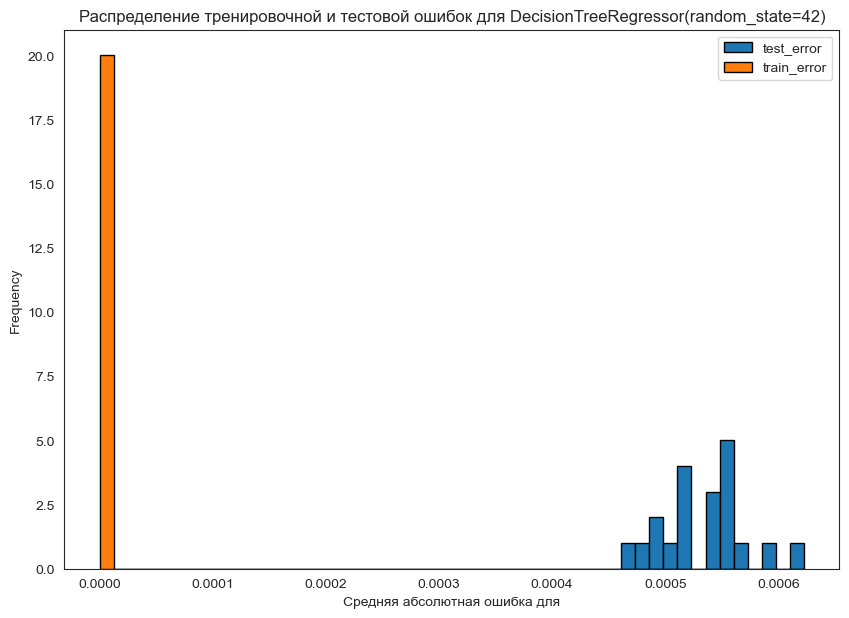

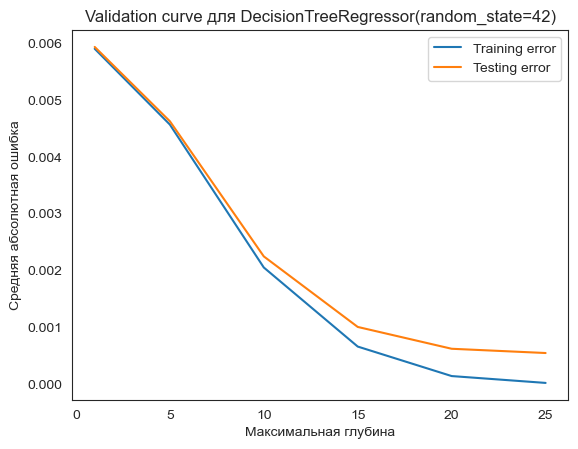

fit_time  score_time  test_score  train_score
0  14.759100    0.062438   -0.000344    -0.000127
1   7.732333    0.062596   -0.000337    -0.000132
2   7.776791    0.065630   -0.000332    -0.000131
3   7.811172    0.061589   -0.000317    -0.000128
4   7.680666    0.062577   -0.000329    -0.000131
5   8.091069    0.064000   -0.000334    -0.000131
6   7.885769    0.082027   -0.000328    -0.000130
7   8.013491    0.062052   -0.000349    -0.000129
8   7.568545    0.063990   -0.000322    -0.000130
9   7.820315    0.063000   -0.000338    -0.000130

fit_time  score_time  test_score  train_score  test_error  train_error
0  14.759100    0.062438   -0.000344    -0.000127    0.000344     0.000127
1   7.732333    0.062596   -0.000337    -0.000132    0.000337     0.000132
2   7.776791    0.065630   -0.000332    -0.000131    0.000332     0.000131
3   7.811172    0.061589   -0.000317    -0.000128    0.000317     0.000128
4   7.680666    0.062577   -0.000329    -0.000131    0.000329     0.000131
5   8.091069    0.064000   -0.000334    -0.000131    0.000334     0.000131
6   7.885769    0.082027   -0.000328    -0.000130    0.000328     0.000130
7   8.013491    0.062052   -0.000349    -0.000129    0.000349     0.000129
8   7.568545    0.063990   -0.000322    -0.000130    0.000322     0.000130
9   7.820315    0.063000   -0.000338    -0.000130    0.000338     0.000130

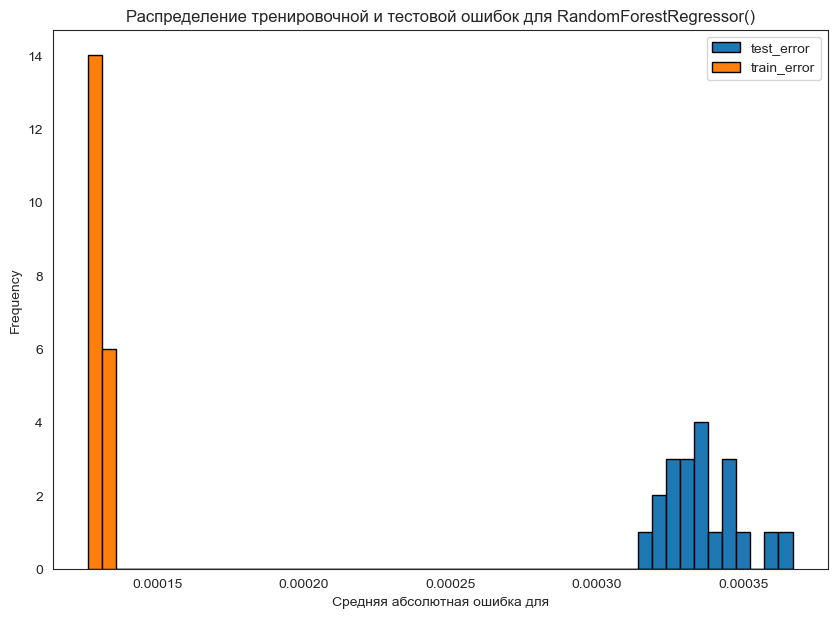

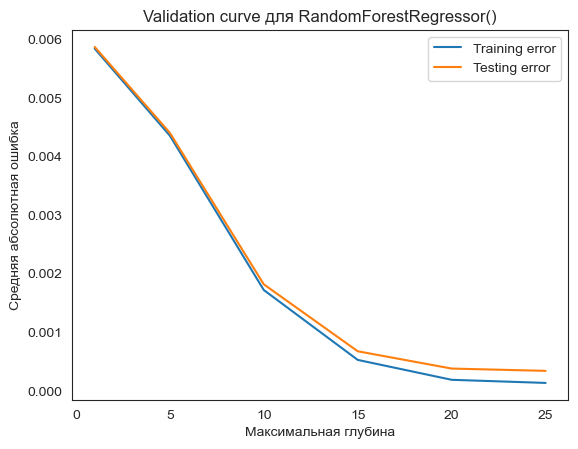

In [35]:
#Кросс-валидация модели случайного леса для проверки переобучаемости
list_model = [dec, randF]
for i in list_model:
    cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
    cross = cross_validate(i, df2, df2_target, cv = cv, scoring="neg_mean_absolute_error", return_train_score=True)

    cv_results = pd.DataFrame(cross)
    display(cv_results.head(10))
    
    cv_results["test_error"] = -cv_results["test_score"]
    cv_results["train_error"] = -cv_results["train_score"]
    display(cv_results.head(10))
    
    cv_results[["test_error", "train_error"]].plot.hist(bins=50, edgecolor="black", figsize =(10, 7))
    plt.xlabel(f"Средняя абсолютная ошибка для")
    plt.title(f"Распределение тренировочной и тестовой ошибок для {i}")
    plt.show()

    max_depth = [1, 5, 10, 15, 20, 25]
    train_scores, test_scores = validation_curve(
        i, df2, df2_target, param_name="max_depth", param_range=max_depth,
        cv=cv, scoring="neg_mean_absolute_error", n_jobs=2)
    train_errors, test_errors = -train_scores, -test_scores

    plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
    plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
    plt.legend()

    plt.xlabel("Максимальная глубина")
    plt.ylabel("Средняя абсолютная ошибка")
    plt.title(f"Validation curve для {i}")
    plt.show()

In [36]:
cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
cross = cross_validate(lin, df2, df2_target, cv = cv, scoring="neg_mean_absolute_error", return_train_score=True)

cv_results = pd.DataFrame(cross)
display(cv_results.head(10))
    
cv_results["test_error"] = -cv_results["test_score"]
cv_results["train_error"] = -cv_results["train_score"]
display(cv_results.head(10))

fit_time  score_time  test_score  train_score
0  0.012004    0.003992   -0.003124    -0.003067
1  0.008004    0.002997   -0.003120    -0.003080
2  0.008992    0.003001   -0.003093    -0.003087
3  0.011006    0.003984   -0.003014    -0.003122
4  0.009005    0.002995   -0.003066    -0.003104
5  0.014986    0.004002   -0.003102    -0.003090
6  0.011992    0.005000   -0.003100    -0.003095
7  0.009007    0.002995   -0.003135    -0.003076
8  0.008999    0.002996   -0.003044    -0.003106
9  0.008007    0.002995   -0.003143    -0.003061

fit_time  score_time  test_score  train_score  test_error  train_error
0  0.012004    0.003992   -0.003124    -0.003067    0.003124     0.003067
1  0.008004    0.002997   -0.003120    -0.003080    0.003120     0.003080
2  0.008992    0.003001   -0.003093    -0.003087    0.003093     0.003087
3  0.011006    0.003984   -0.003014    -0.003122    0.003014     0.003122
4  0.009005    0.002995   -0.003066    -0.003104    0.003066     0.003104
5  0.014986    0.004002   -0.003102    -0.003090    0.003102     0.003090
6  0.011992    0.005000   -0.003100    -0.003095    0.003100     0.003095
7  0.009007    0.002995   -0.003135    -0.003076    0.003135     0.003076
8  0.008999    0.002996   -0.003044    -0.003106    0.003044     0.003106
9  0.008007    0.002995   -0.003143    -0.003061    0.003143     0.003061

In [37]:
#Можно сделать вывод, что модель линейной ригресии не переобучается, но точность не лучшая


После регуляризации моделей, мы видим, что лучшее значение метрики у случайного леса. При max_depth=15, только начинает переобучаться, так как метрика
на тестовой и на тренировочной выборках начинает расходиться.

In [38]:
randF_model = RandomForestRegressor(random_state=42, max_depth=15)
cv = ShuffleSplit(n_splits=20, test_size=0.3, random_state=0)
cross = cross_validate(randF_model, df2, df2_target, cv = cv, scoring="neg_mean_absolute_error", return_train_score=True)

cv_results = pd.DataFrame(cross)
    
cv_results["test_error"] = -cv_results["test_score"]
cv_results["train_error"] = -cv_results["train_score"]

In [39]:
display(cv_results)
        

fit_time  score_time  test_score  train_score  test_error  train_error
0   7.808917    0.059982   -0.000663    -0.000512    0.000663     0.000512
1   8.556241    0.054999   -0.000676    -0.000536    0.000676     0.000536
2   7.943772    0.053995   -0.000639    -0.000490    0.000639     0.000490
3   7.524943    0.085998   -0.000615    -0.000511    0.000615     0.000511
4   7.472817    0.058999   -0.000674    -0.000514    0.000674     0.000514
5   7.490667    0.052001   -0.000641    -0.000531    0.000641     0.000531
6   7.355483    0.055997   -0.000676    -0.000537    0.000676     0.000537
7   8.247102    0.070012   -0.000707    -0.000545    0.000707     0.000545
8   7.556674    0.053006   -0.000675    -0.000530    0.000675     0.000530
9   7.106516    0.052000   -0.000655    -0.000529    0.000655     0.000529
10  6.842551    0.053001   -0.000725    -0.000518    0.000725     0.000518
11  7.290527    0.051000   -0.000665    -0.000543    0.000665     0.000543
12  6.887063    0.052002   -0.000686    -0.000508    0.000686     0.000508
13  7.169485    0.051000   -0.000668    -0.000487    0.000668     0.000487
14  7.996612    0.068998   -0.000702    -0.000557    0.000702     0.000557
15  8.429218    0.052006   -0.000720    -0.000525    0.000720     0.000525
16  7.617462    0.089987   -0.000661    -0.000538    0.000661     0.000538
17  8.218002    0.050996   -0.000690    -0.000548    0.000690     0.000548
18  7.916373    0.052088   -0.000680    -0.000551    0.000680     0.000551
19  7.835362    0.067008   -0.000709    -0.000563    0.000709     0.000563

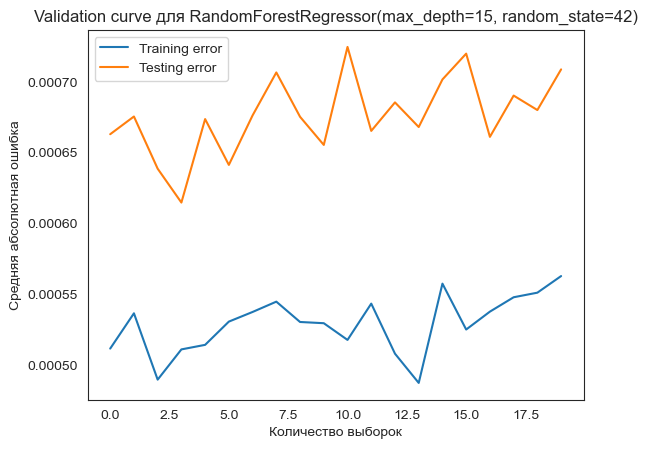

In [40]:
plt.plot(cv_results.index, cv_results["train_error"], label="Training error")
plt.plot(cv_results.index, cv_results["test_error"], label="Testing error")
plt.legend()

plt.xlabel("Количество выборок")
plt.ylabel("Средняя абсолютная ошибка")
plt.title(f"Validation curve для {randF_model}")
plt.show()

In [41]:
#Среднее значение ошибки
mean_mis_train = cv_results["train_error"].mean()
mean_mis_test = cv_results["test_error"].mean()
std_target = df2_target.std()

In [42]:
print(f"Среднее значение тестовой ошибки: {round(mean_mis_test, 6)}. Среднее значение тренировочной ошибки: {round(mean_mis_train, 6)}")
print(f"Стандартное отклонени {std_target}")

Среднее значение тестовой ошибки: 0.000676. Среднее значение тренировочной ошибки: 0.000529
Стандартное отклонени 0.007500314248004627


После того как модель регуляризована можно попробовать подобрать некоторые параметры модели для улучшения её качества

In [43]:
param_grid = [{"n_estimators":[100, 200, 300, 400], "max_features":["log2", "sqrt", 1]}]


grid_search = GridSearchCV(randF_model, cv=5, param_grid=param_grid, scoring='neg_mean_absolute_error', return_train_score=True)

grid_search.fit(df2, df2_target)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=15, random_state=42),
             param_grid=[{'max_features': ['log2', 'sqrt', 1],
                          'n_estimators': [100, 200, 300, 400]}],
             return_train_score=True, scoring='neg_mean_absolute_error')

In [44]:
grid_search.best_params_

{'max_features': 'log2', 'n_estimators': 100}

In [45]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results[["mean_train_error", "mean_test_error"]] = -cv_results[["mean_train_score", "mean_test_score"]]
cv_results[["mean_train_error", "mean_test_error"]]
#модель переобучается

mean_train_error  mean_test_error
0           0.000627         0.003004
1           0.000607         0.003008
2           0.000603         0.003018
3           0.000605         0.003025
4           0.000627         0.003004
5           0.000607         0.003008
6           0.000603         0.003018
7           0.000605         0.003025
8           0.000981         0.003188
9           0.000992         0.003219
10          0.001008         0.003234
11          0.001002         0.003233

Мы наблюдаем, что показание метрики ухудшились и модель начала переобучаться, поэтому оставим как было

In [46]:
randF_model.fit(x_train, y_train)
randF_model_predict = randF_model.predict(x_test)

In [47]:
print("Средняя абсолютная ошибка для регуляризованной модели случайного леса:", mean_absolute_error(y_test, randF_model_predict))

Средняя абсолютная ошибка для регуляризованной модели случайного леса: 0.0006552543621256282


In [48]:
print("Коэффициент детерминации для регуляризованной модели случайного леса:", r2_score(y_test, randF_model_predict))

Коэффициент детерминации для регуляризованной модели случайного леса: 0.9661934297489698


Гипотезы. Используем критерий Манна — Уитни, так как наши данные не имеют нормального распределения.
H0 - Эмульсия истока не влияет на Гармонию Бессмертия
H1 - При увеличении Эмульсии истока увеличивается Гармония Бессмертия


In [29]:
target_data = df["Гармония Бессмертия"]

data_test = df["Эмульсия Истока"]

stats.mannwhitneyu(data_test, target_data, alternative="less")

MannwhitneyuResult(statistic=31648968.0, pvalue=0.0)

Нулевую гипотезу отвергаем, и принимаем алтернативную

Подводя итоги, по данной работе, мной были обучены 3 модели и выбрана модель случайного леса по метрике MAE. После регуляризации 
данная модель дайт такие показатели: MAE =  0.000676 на тестовой выборке, r2_score = 0.9661934297489698.
